<a href="https://colab.research.google.com/github/cakenny/Proyecto_mi_cliente_ideal/blob/main/Proyecto_mi_cliente_ideal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recomendaciones ver colab con tema dark (para una mejor visualización).

# <font color='cyan'> **Proyecto Final Mi Cliente Ideal** 💪


---






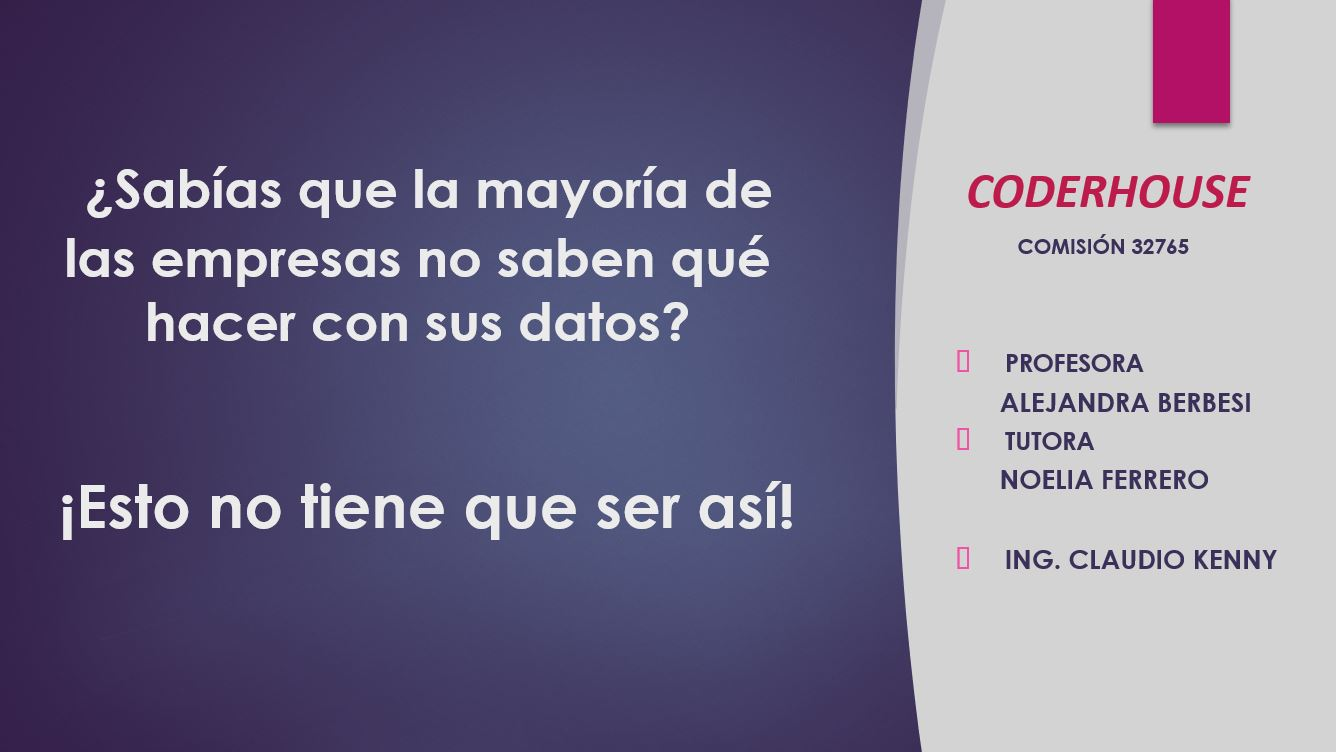

# <font color='cyan'> ***Indice:*** 📊	🐍:


><font color='green'>▶ Introducción 

><font color='green'>▶ Librerías

> <font color='green'>▶ Adquisición de datos

> <font color='green'>▶ Análisis exploratorio de datos 

> <font color='green'>▶ Variables categóricas

> <font color='green'>▶ Data Wrangling

><font color='green'>▶ Preprocesamiento de datos 

><font color='green'>▶ Selección del algoritmo apropiado: Clustering 

><font color='green'>▶ Evaluación del algoritmo: Clustering 

> <font color='green'>▶ Conexión API Generador de datos

><font color='green'>▶ Conclusión



# <font color='cyan'> **Introducción** ✋


##<font color='green'>**¿Cómo podrías utilizar los datos para mejorar tus ventas y fidelizar a tus clientes?**

La segmentación de clientes es una técnica útil para las empresas para comprender mejor a sus clientes y descubrir segmentos valiosos que les permitan obtener el máximo beneficio. Esto se logra mediante la recopilación de datos sobre el comportamiento y la personalidad de ellos, identificando sus necesidades y preferencias. Esto permite a las empresas adaptar sus productos y estrategias de marketing atendiendo los requisitos específicos de cada cliente.


<font color='green'>**Descripción de la temática de los datos:**

Para el presente trabajo se tomaron datos de clientes de una empresa no especificada en un tiempo que abarca desde 30-7-2012 a 29-6-2014.

<font color='green'>**Alcance:**

Este dashboard diseñado puede ser utilizado por mandos medios o líderes dentro de la empresa. 
Su utilización les permitirá comprender: hábitos de consumo, satisfacción de deseos, resolución de problemas, estrategias sobre fidelización de clientes, en fin, conocer su “cliente”.


<font color='green'>**Hipótesis:**

Deseamos confirmar si nuestro cliente ideal son las familias con hijos pequeños. Con estos datos lograremos conocer nuestro cliente real.

<font color='green'>**Objetivo:**

Lograr conocer a nuestro cliente ideal.

<font color='green'>**Nombre de la empresa:** 

La empresa es anónima “NN”. 

<font color='green'>**Nombre iniciativa:**
 
 Mi mejor cliente. 



##<font color='green'> Origen de los datos:
https://www.kaggle.com/datasets

Personas

**ID:** identificador único del cliente

**Fecha_Nacim:** año de nacimiento del cliente

**Educación:** nivel de educación del cliente

**Estado_Civil:** estado civil del cliente

**Ingreso_Anual:** ingresos familiares anuales del cliente

**Niños:** Número de niños en el hogar del cliente

**Adolescente:** Número de adolescentes en el hogar del cliente

**Fecha_ingreso:** Fecha de alta del cliente en la empresa

**Dias_Ulti_Comp:** Número de días desde la última compra del cliente


**Gastos_Vinos:** Cantidad gastada en vino en los últimos 2 años

**Gastos_Frutas:** Cantidad gastada en frutas en los últimos 2 años

**Gastos_Carne:** cantidad gastada en carne en los últimos 2 años

**Gastos_Pescados:** cantidad gastada en pescado en los últimos 2 años

**Gastos_Dulces:** cantidad gastada en dulces en los últimos 2 años

**Gastos_Joyas:** cantidad gastada en oro en los últimos 2 años


**Sitio**

**Cant_Comp_Web:** Número de compras realizadas a través de la web de la empresa

**Cant_catalogo_comp:** Número de compras realizadas utilizando un catálogo

**Cant_Com_Almacen:** Número de compras realizadas directamente en las tiendas

**Num_Visitas_Web:** Número de visitas al sitio web de la empresa en el último mes

# <font color='cyan'> **Librerías** 📚

In [ ]:
pip install -q hdbscan

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import numpy as np
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import datetime
from datetime import datetime
import math
import plotly.graph_objects as go
import sklearn 
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from IPython.core.display import HTML
def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")
import requests
import json  
import warnings
from sklearn.cluster import DBSCAN
from collections import Counter
import hdbscan
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans					
from sklearn.metrics import silhouette_score, calinski_harabasz_score	
from yellowbrick.cluster import SilhouetteVisualizer	
from yellowbrick.cluster import KElbowVisualizer		

# <font color='cyan'> **Adquisición de datos** ✍

<center>
<img src="http://www.tecniplanet.net/wp-content/uploads/2016/06/bases-de-datos1.jpg" height="300" />
</center>

In [ ]:
drive.mount('/content/gdrive') # me permite conectarme a mi drive verica mi cuenta"

df1 = pd.read_csv('/content/gdrive/MyDrive/Coder/Super1.csv',index_col=0, encoding='latin-1',sep=';')
df1.head()


Mounted at /content/gdrive


Fecha_Nacim  Edad      Educacion Estado_Civil  Ingreso_Anual      Niños  \
ID                                                                            
1          1970    52     Secundario       Casado          55158    Un hijo   
2          1950    72       Primario       Pareja          52203  Sin hijos   
3          1976    46  Universitario       Casado           7500    Un hijo   
4          1959    63         Master       Pareja          82576  Sin hijos   
5          1985    37       Primario       Pareja           7500    Un hijo   

    Adolescente Fecha_ingreso  Dias_Ulti_Comp  Gastos_Vinos  Gastos_Frutas  \
ID                                                                           
1             1     30/7/2012              72           293              0   
2             0     31/7/2012              36           488             21   
3             0      1/8/2012              19             7              0   
4             0      1/8/2012              66          1206             55   
5             0      1/8/2012              98             5             17   

    Gastos_Carne  Gastos_Pescados  Gastos_Dulces  Gastos_Joyas  Cant_Ofertas  \
ID                                                                             
1             87                4             11            23             4   
2            238               56            108            28             1   
3             12               13              7            32             5   
4            445              168             18            18             1   
5             17               13             14            34             4   

    Cant_Comp_Web  Cant_catalogo_comp  Cant_Com_Almacen  Num_Visitas_Web  
ID                                                                        
1               7                   2                 5                7  
2               8                   7                11                6  
3               4                   1                 2                9  
4               2                   4                12                1  
5               2                   1                 3                9

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <font color='cyan'> **Análisis exploratorio de datos** ⏰

<center>
<img src="https://datos.gob.es/sites/default/files/styles/doc_image/public/doc/image/imagenes_post_2.jpg?itok=lml60YyJ" height="300" />
</center>

**Hacemos una exploración rápida del data set, visualizando los datos en formato de tablas, para ello usamos una función llamada multi_table.**

In [ ]:
multi_table([pd.DataFrame(df1[col].value_counts()) for col in df1.columns])

 **Cantidad de valores nulos por columnas**

In [ ]:
df1.isnull().sum()

Fecha_Nacim           0
Edad                  0
Educacion             0
Estado_Civil          0
Ingreso_Anual         0
Niños                 0
Adolescente           0
Fecha_ingreso         0
Dias_Ulti_Comp        0
Gastos_Vinos          0
Gastos_Frutas         0
Gastos_Carne          0
Gastos_Pescados       0
Gastos_Dulces         0
Gastos_Joyas          0
Cant_Ofertas          0
Cant_Comp_Web         0
Cant_catalogo_comp    0
Cant_Com_Almacen      0
Num_Visitas_Web       0
dtype: int64

**Tipos de datos en mi dataframe**

In [ ]:
df1.dtypes

Fecha_Nacim            int64
Edad                   int64
Educacion             object
Estado_Civil          object
Ingreso_Anual          int64
Niños                 object
Adolescente            int64
Fecha_ingreso         object
Dias_Ulti_Comp         int64
Gastos_Vinos           int64
Gastos_Frutas          int64
Gastos_Carne           int64
Gastos_Pescados        int64
Gastos_Dulces          int64
Gastos_Joyas           int64
Cant_Ofertas           int64
Cant_Comp_Web          int64
Cant_catalogo_comp     int64
Cant_Com_Almacen       int64
Num_Visitas_Web        int64
dtype: object

**Ahora usaremos la función matrix de Missingno que permite ver de una forma visual dónde se encuentran los valores nulos dentro de nuestro conjunto de datos.**

<Axes: >

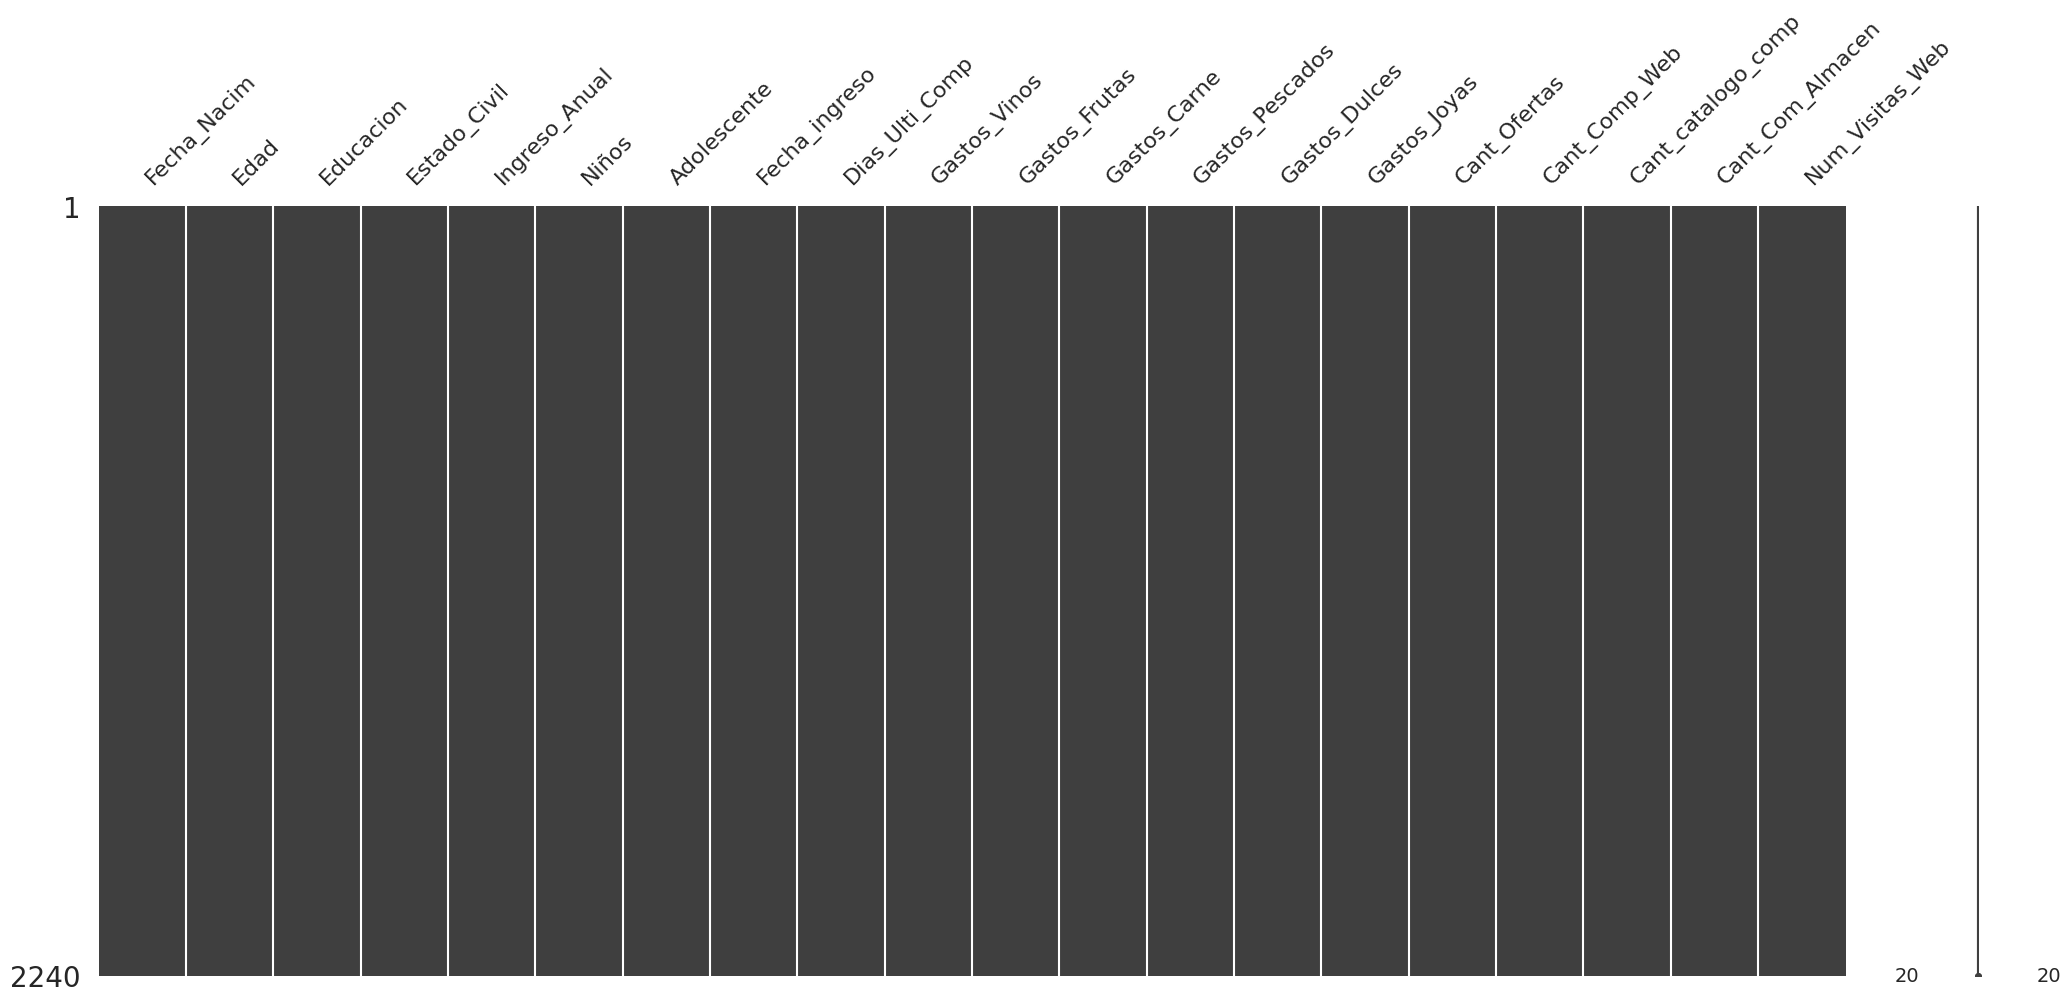

In [ ]:
#!pip install missingno
import missingno as msno
msno.matrix(df1)

**Verificamos que no hay datos nulos en el dataframe.**

---



In [ ]:
df1=df1.rename(columns={'Cant_Ofertas': "Cant_comp_Ofertas",'Cant_Com_Almacen':'Cant_comp_Almacen','Cant_catalogo_comp':'Cant_comp_Catalogo','Cant_Comp_Web':'Cant_comp_Web'})											

**Ahora analizamos la existencia de duplicados y vemos que tenemos 204 datos duplicados.**

In [ ]:
df1.duplicated().value_counts()

False    2036
True      204
dtype: int64

In [ ]:
df1 = df1.drop_duplicates().reset_index(drop=True) # eliminamos los duplicados

Verificamos la eliminación de los valores duplicados.

In [ ]:
df1.duplicated().value_counts()

False    2036
dtype: int64

In [ ]:
#len(df1) #filas totales dataframe
df1.shape

(2036, 20)

Una vez eliminadas las filas repetidas, el dataset queda con 2036 filas y 20 columnas.

## 💈# <font color='cyan'> **Variables categóricas:** 

**Cantidad de valores únicos para la variable categórica Educacion**

In [ ]:
df1['Educacion'].nunique() # Verificamos que tenemos presentes los cuatro niveles

4

In [ ]:
df1['Educacion'].value_counts()

Universitario    1024
Secundario        440
Master            337
Primario          235
Name: Educacion, dtype: int64

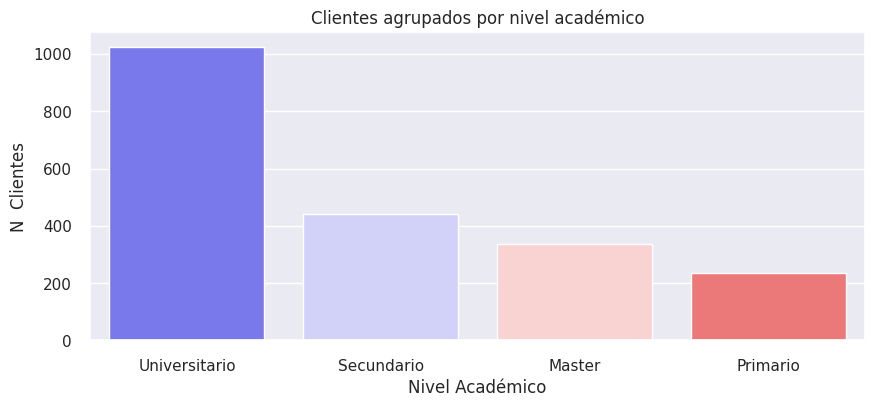

In [ ]:
Tipo_edu=df1.Educacion.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Tipo_edu.index, y=Tipo_edu.values,palette="bwr")
plt.title('Clientes agrupados por nivel académico')
plt.xlabel('Nivel Académico')
plt.ylabel('N  Clientes')
plt.show() 

Para interpretar este gráfico, vemos que la mayoría de los clientes en nuestro conjunto de datos son graduados universitarios (la primer barra de la izquierda). Nuevamente, vemos que alrededor de 500 personas en nuestro conjunto de datos tienen secundario y 380 personas tienen maestrías.

¿Podría haber una relación entre el nivel educativo y los hábitos de compra?



---

El gráfico de pares es una forma útil de visualizar las relaciones entre múltiples variables en un conjunto de datos. Cada gráfico de dispersión en la cuadrícula muestra la relación entre dos variables, y los histogramas en la diagonal muestran la distribución de cada variable. El parámetro "hue" nos permite visualizar cómo se distribuyen los diferentes grupos en los datos en las variables.

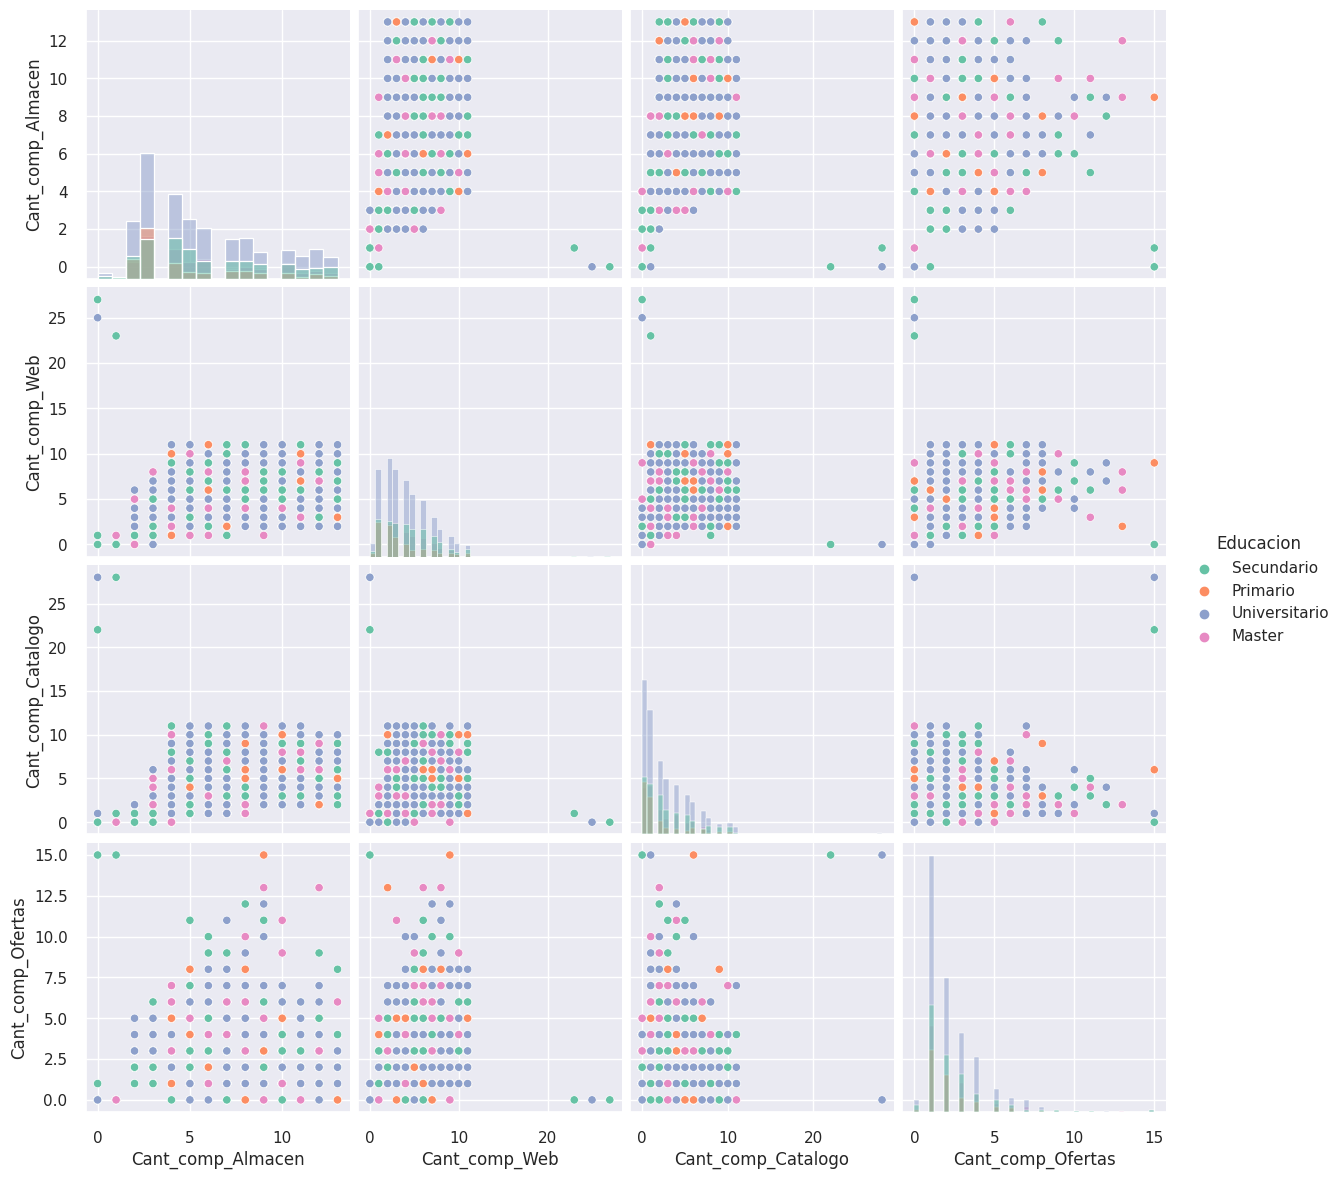

In [ ]:
#Pairplot
sns.pairplot(df1[['Cant_comp_Almacen','Cant_comp_Web','Cant_comp_Catalogo','Cant_comp_Ofertas','Educacion']],hue = 'Educacion' , height = 3 , palette = 'Set2',
             diag_kind='hist'
             )

**Cantidad de valores únicos para la variable categórica Estado Civil**

In [ ]:
df1['Estado_Civil'].nunique() # Verificamos que tenemos presentes los cinco estados 


5

In [ ]:
df1['Estado_Civil'].value_counts()

Casado        788
Pareja        517
Soltero       448
Divorciado    213
Viudo          70
Name: Estado_Civil, dtype: int64

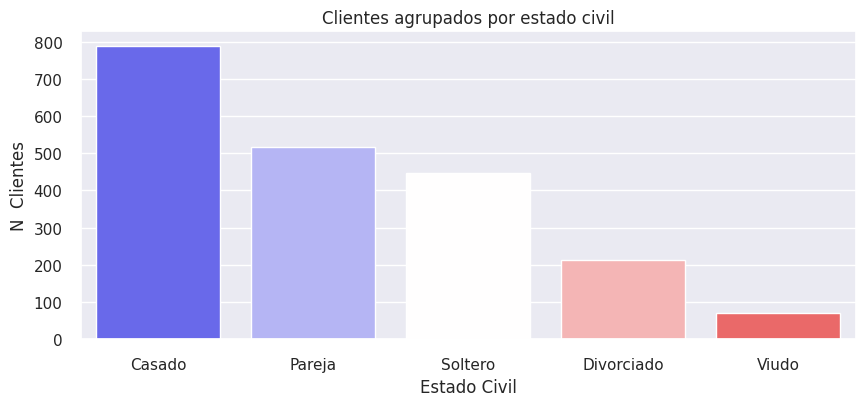

In [ ]:
Tipo_esta_cil=df1.Estado_Civil.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Tipo_esta_cil.index, y=Tipo_esta_cil.values,palette="bwr")
plt.title('Clientes agrupados por estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('N  Clientes')
plt.show() 

Para interpretar este gráfico, vemos que la mayoría de los clientes en nuestro conjunto de datos son Casados (la primer barra de la izquierda),vemos que alrededor de 580 estan en pareja y 500 personas estan solteras.

¿Podría haber una relación entre el estado Civil y los hábitos de compra?



---

El gráfico de pares es una forma útil de visualizar las relaciones entre múltiples variables en un conjunto de datos. Cada gráfico de dispersión en la cuadrícula muestra la relación entre dos variables, y los histogramas en la diagonal muestran la distribución de cada variable. El parámetro "hue" nos permite visualizar cómo se distribuyen los diferentes grupos en los datos en las variables.

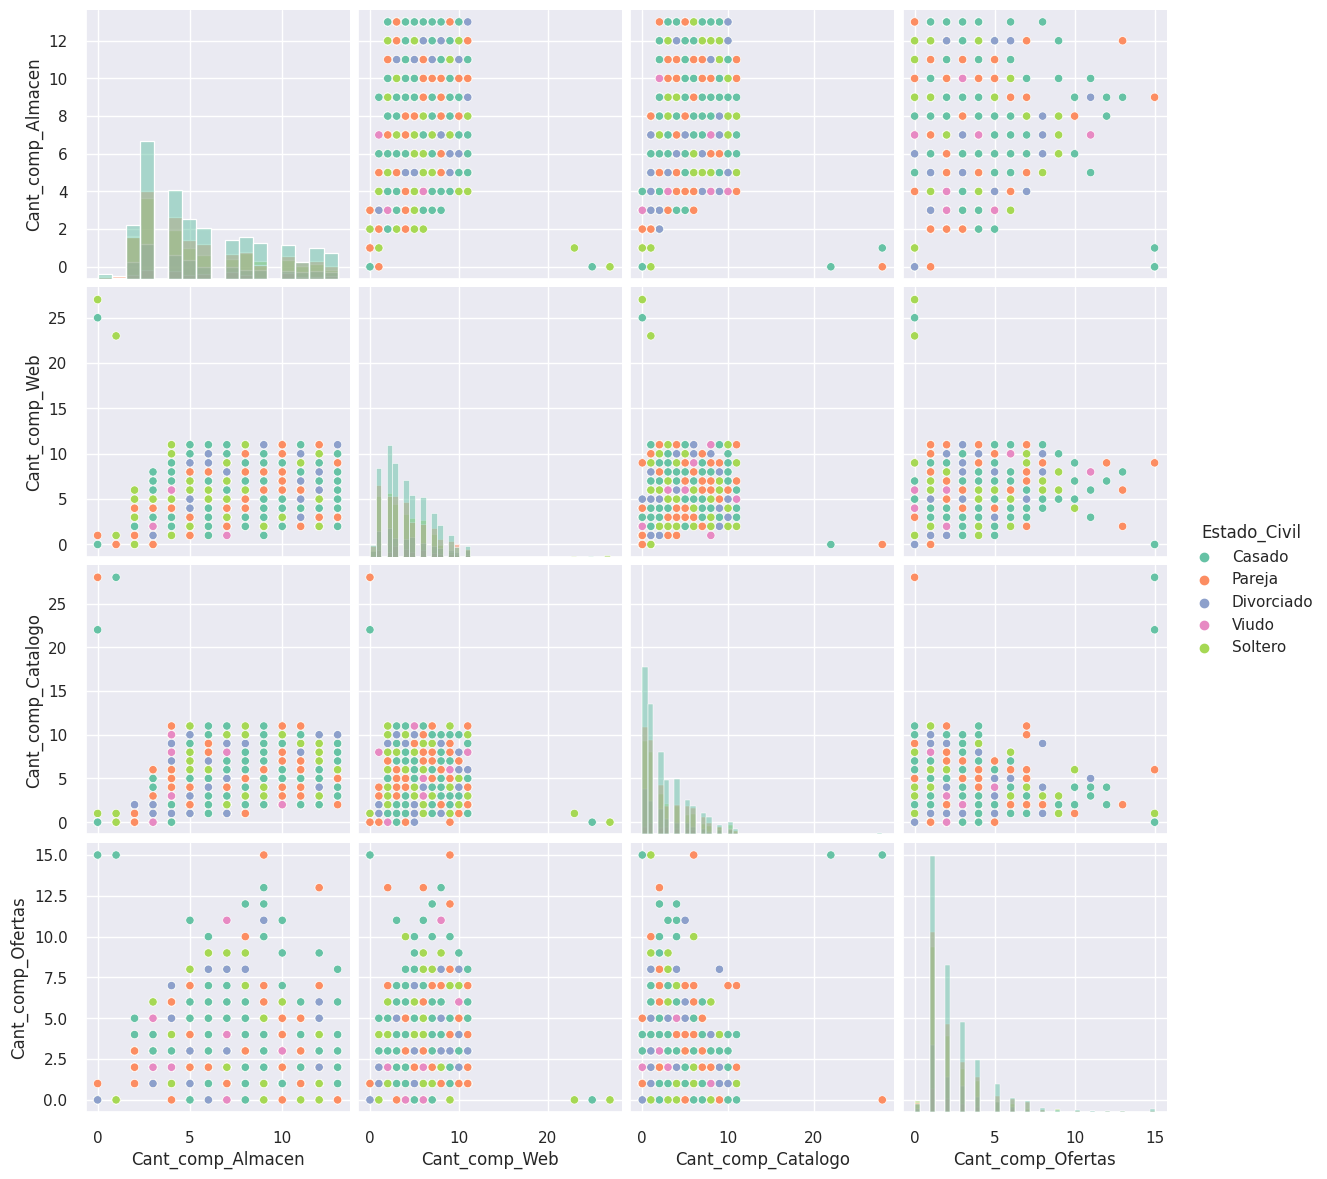

In [ ]:
#Pairplot
sns.pairplot(df1[['Cant_comp_Almacen','Cant_comp_Web','Cant_comp_Catalogo','Cant_comp_Ofertas','Estado_Civil']],hue = 'Estado_Civil' , height = 3 , palette = 'Set2',
             diag_kind='hist'
             )

**Cantidad de valores únicos para la variable categórica Niños**

In [ ]:
df1['Niños'].nunique()

3

In [ ]:
df1['Niños'].value_counts()

Sin hijos    1174
Un hijo       819
Dos hijos      43
Name: Niños, dtype: int64

In [ ]:
#ver frequencias con group by 
df1.groupby('Niños').size().sort_values(ascending=False)

Niños
Sin hijos    1174
Un hijo       819
Dos hijos      43
dtype: int64

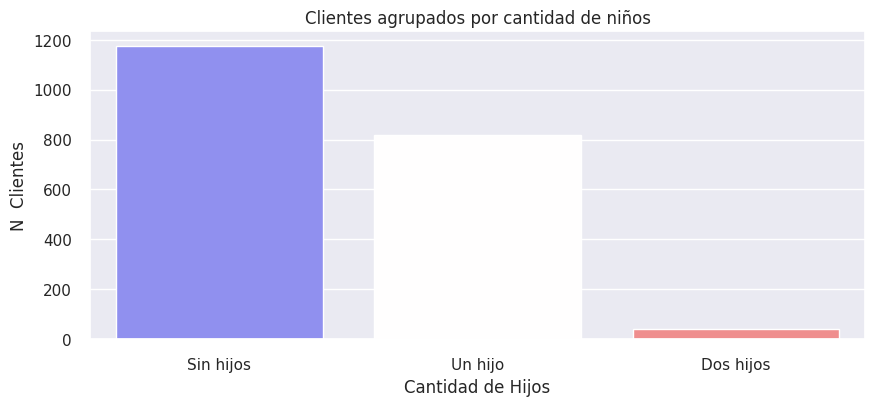

In [ ]:
Tipo_niños=df1.Niños.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Tipo_niños.index, y=Tipo_niños.values,palette="bwr")
plt.title('Clientes agrupados por cantidad de niños')
plt.xlabel('Cantidad de Hijos')
plt.ylabel('N  Clientes')
plt.show() 

Para interpretar este gráfico, vemos que la mayoría de los clientes en nuestro conjunto de datos no tienen hijos (la primer barra de la izquierda),vemos que alrededor de 900 tienen 1 hijo y 50 personas tienen 2 hijos.

¿Podría haber una relación entre la cantidad de hijos y los hábitos de compra?



---

El gráfico de pares es una forma útil de visualizar las relaciones entre múltiples variables en un conjunto de datos. Cada gráfico de dispersión en la cuadrícula muestra la relación entre dos variables, y los histogramas en la diagonal muestran la distribución de cada variable. El parámetro "hue" nos permite visualizar cómo se distribuyen los diferentes grupos en los datos en las variables.

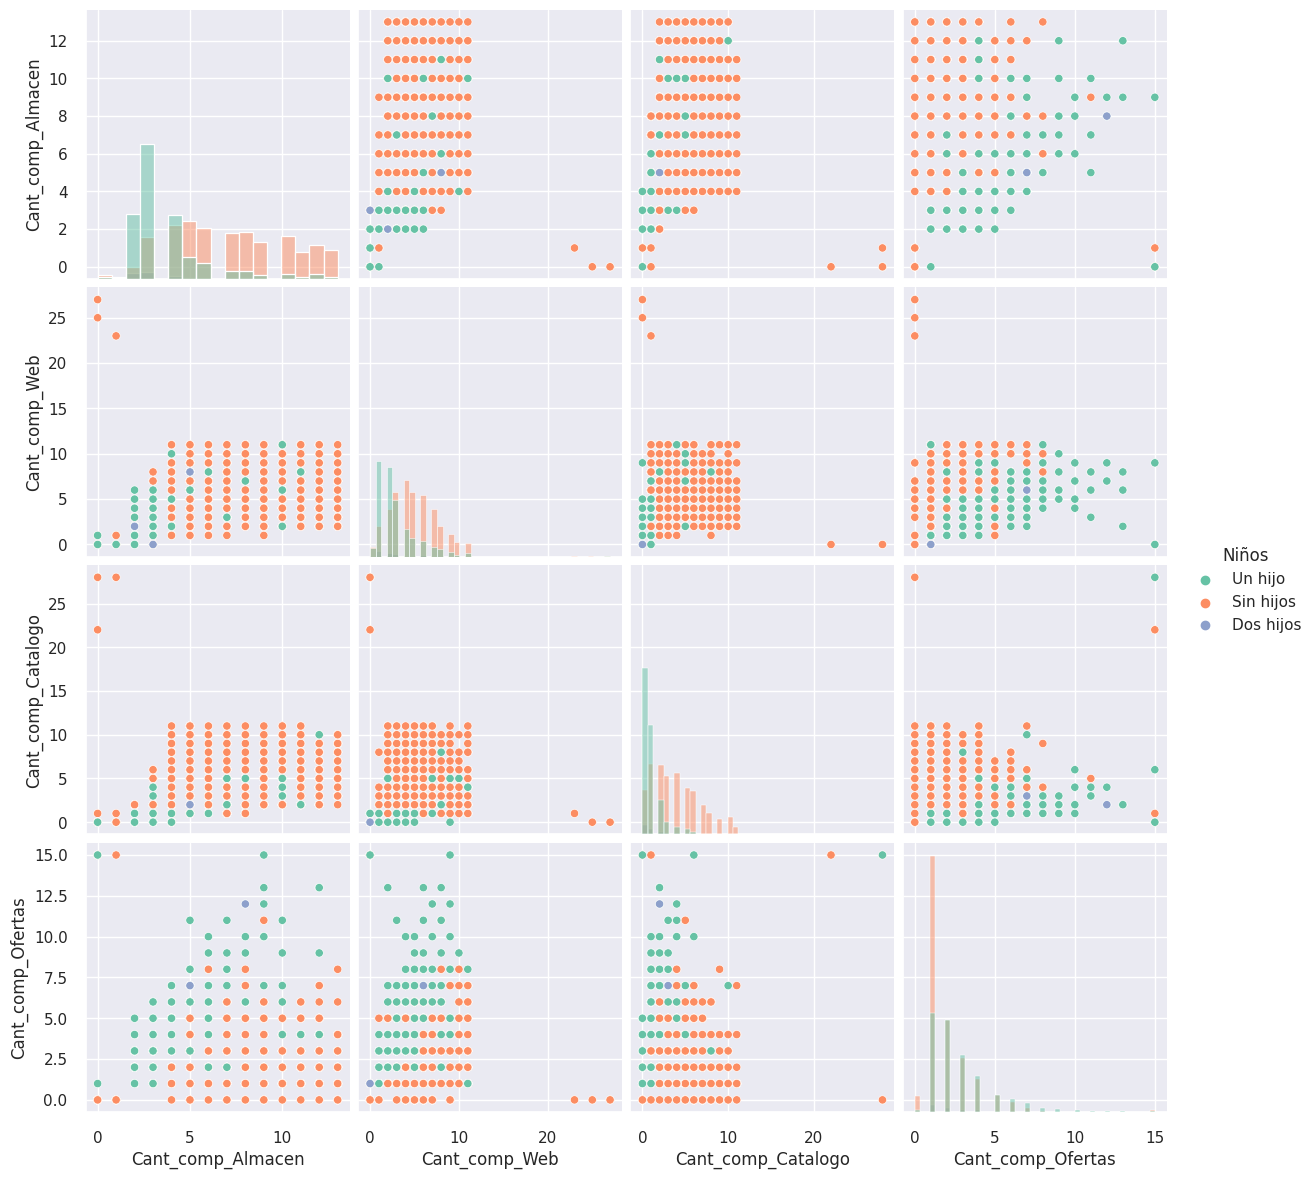

In [ ]:
#Pairplot
sns.pairplot(df1[['Cant_comp_Almacen','Cant_comp_Web','Cant_comp_Catalogo','Cant_comp_Ofertas','Niños']],hue = 'Niños' , height = 3 , palette = 'Set2',
             diag_kind='hist'
             )

**Aquí examinaremos la variable denominada Ingreso_Anual por separado.**

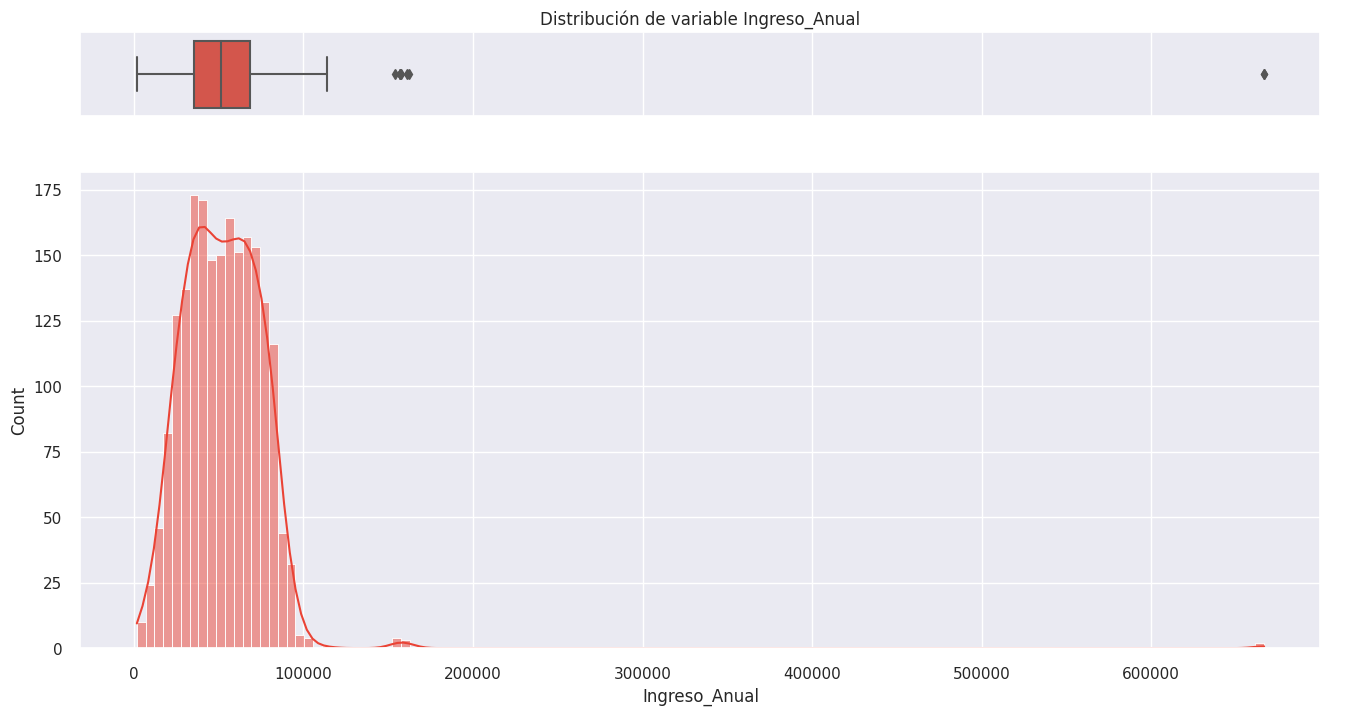

In [ ]:
# Estilo y tamano de mi grafico
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creacion de dos subplots para combinar graficos
f, (ax_box1, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
colours = ['#4285f4', '#ea4335']

# Asignar a cada variable cada grafico
sns.boxplot(x=df1["Ingreso_Anual"], ax=ax_box1, color="#ea4335").set(title='Distribución de variable Ingreso_Anual')
sns.histplot(df1, x="Ingreso_Anual", ax=ax_hist, kde=True, color="#ea4335")


# Formato al eje x y un espacio de leyenda para que se vea el espacio blanco a la derecha
ax_box1.set(xlabel='')
ax_hist.set(xlabel='Ingreso_Anual')
plt.legend(title='', loc=2, bbox_to_anchor=(1.02, 1), borderaxespad=0.)

warnings.filterwarnings("ignore")
plt.show()

- Tenemos una distribucion sesgada a la derecha 


Como podemos ver en el gráfico anterior, la mayoría de las personas en nuestro conjunto de datos tienen ingresos anuales entre 0 y 100 000 dólares. En las siguientes secciones, obtendremos gráficos más limpios y claros después de eliminar los valores atípicos en nuestro conjunto de datos.

Pero simplemente mirando este gráfico, podemos obtener los siguientes resultados.

La gran mayoría de las personas en nuestro conjunto de datos tienen ingresos entre 0 y 100,000 dólares anuales.
El ingreso promedio de las personas en nuestro conjunto de datos es de alrededor de 50,000 dólares anuales.


**Primero damos un vistazo a nuestros datos con la función describe().**

In [ ]:
df1.describe().T

count  mean   std  min   25%   50%   75%    max
Fecha_Nacim          2036  1969    12 1893  1959  1970  1977   1996
Edad                 2036    53    12   26    45    52    63    129
Ingreso_Anual        2036 52693 28937 1730 35617 51610 68685 666666
Adolescente          2036     1     1    0     0     0     1      2
Dias_Ulti_Comp       2036    49    29    0    24    49    74     99
Gastos_Vinos         2036   304   336    0    23   174   504   1493
Gastos_Frutas        2036    26    40    0     2     8    33    199
Gastos_Carne         2036   168   228    0    16    68   230   1725
Gastos_Pescados      2036    38    55    0     3    12    50    259
Gastos_Dulces        2036    27    42    0     1     8    34    263
Gastos_Joyas         2036    44    52    0     9    24    56    362
Cant_comp_Ofertas    2036     2     2    0     1     2     3     15
Cant_comp_Web        2036     4     3    0     2     4     6     27
Cant_comp_Catalogo   2036     3     3    0     0     2     4     28
Cant_comp_Almacen    2036     6     3    0     3     5     8     13
Num_Visitas_Web      2036     5     2    0     3     6     7     20

**¿ Existe una relacion entre los ingresos anuales y la edad, agrupada por el 
Estado Civil?**

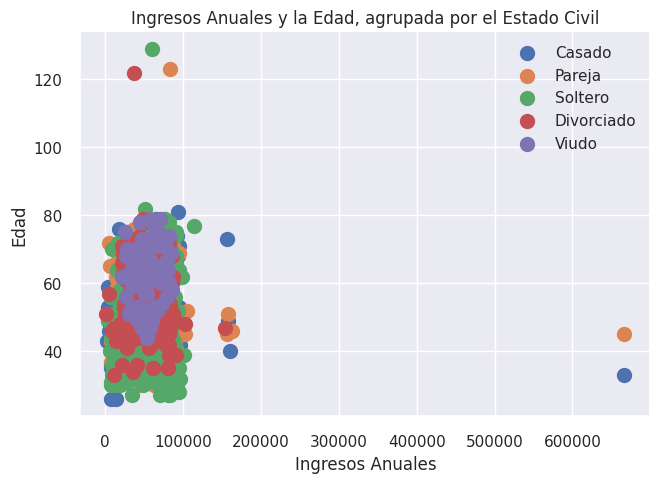

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,2)
for Tipo_edu in ['Casado' , 'Pareja', 'Soltero' , 'Divorciado','Viudo']:
    plt.scatter(x = 'Ingreso_Anual', y = 'Edad', data = df1[df1['Estado_Civil'] == Tipo_edu] ,s = 100 , label = Tipo_edu)
    plt.title('Ingresos Anuales y la Edad, agrupada por el Estado Civil')
    plt.xlabel('Ingresos Anuales')
    plt.ylabel('Edad')
plt.legend()
plt.show()

Es difícil identificar una relción clara entre los ingresos anuales y la edad,agrupados por el estado civil, por lo que se deben ralizar más pruebas. Sin embargo, parece que se forman grupos dentro de los datos.



**¿ Existe una relacion entre los ingresos anuales y la edad, agrupada por el 
Nivel Educativo?**

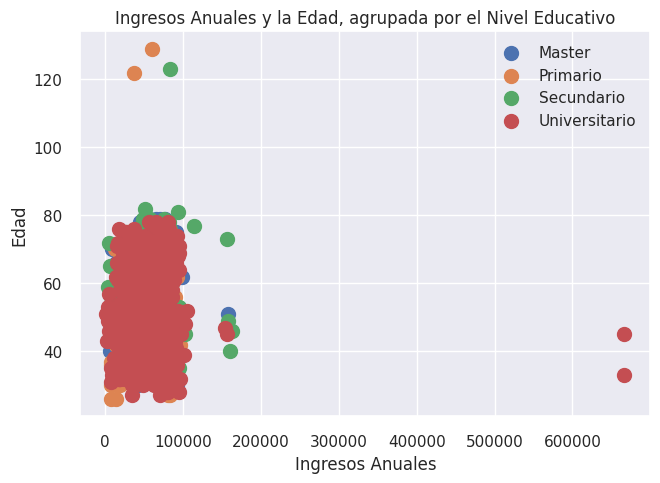

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,2)
for Tipo_edu in ['Master' , 'Primario', 'Secundario' , 'Universitario']:
    plt.scatter(x = 'Ingreso_Anual', y = 'Edad', data = df1[df1['Educacion'] == Tipo_edu] ,s = 100 , label = Tipo_edu)
    plt.title('Ingresos Anuales y la Edad, agrupada por el Nivel Educativo')
    plt.xlabel('Ingresos Anuales')
    plt.ylabel('Edad')
plt.legend()
plt.show()

Es difícil identificar una relación clara entre los ingresos anuales y la edad, agrupados por el nivel educativo, por lo que se deben realizar más pruebas. Sin embargo, parece que se forman grupos dentro de los datos.

# <font color='cyan'>**Data Wrangling** ⛳



<center>
<img src="https://vmblog.com/images/data-wrangling-2.png" height="300" />
</center>

## 💈# <font color='cyan'>**Creamos una nueva columna llamada Gastos Totales**

**Es la suma de todos los gastos en los distintos productos.**

In [ ]:
df1 = df1.assign(Gastos_Totales=df1['Gastos_Vinos']+df1['Gastos_Frutas']+df1['Gastos_Carne']+df1['Gastos_Pescados']+df1['Gastos_Dulces']+df1['Gastos_Joyas'])

**Sacamos el porcentaje de gastos de mi clientes por cada producto**

In [ ]:
gvinos = df1['Gastos_Vinos'].sum()
gfrutas = df1['Gastos_Frutas'].sum()
gcarne = df1['Gastos_Carne'].sum()
gpescados = df1['Gastos_Pescados'].sum()
gdulces = df1['Gastos_Dulces'].sum()
gjoyas = df1['Gastos_Joyas'].sum()

gtotales = df1['Gastos_Totales'].sum()

porc_vino = gvinos / gtotales * 100
porc_frutas = gfrutas / gtotales * 100
porc_carne = gcarne / gtotales * 100
porc_pescados = gpescados / gtotales * 100
porc_dulces = gdulces / gtotales * 100
porc_joyas = gjoyas / gtotales * 100
print("El porcentage de gastos de mis cliente en vino es el ", round(porc_vino), "%")
print("El porcentage de gastos de mis cliente en fruta es el ", round(porc_frutas), "%")
print("El porcentage de gastos de mis cliente en carne es el ", round(porc_carne), "%")
print("El porcentage de gastos de mis cliente en pescados es el ", round(porc_pescados), "%")
print("El porcentage de gastos de mis cliente en dulces es el ", round(porc_dulces), "%")
print("El porcentage de gastos de mis cliente en joyas es el ", round(porc_joyas), "%")

El porcentage de gastos de mis cliente en vino es el  50 %
El porcentage de gastos de mis cliente en fruta es el  4 %
El porcentage de gastos de mis cliente en carne es el  28 %
El porcentage de gastos de mis cliente en pescados es el  6 %
El porcentage de gastos de mis cliente en dulces es el  4 %
El porcentage de gastos de mis cliente en joyas es el  7 %


In [ ]:
import plotly.graph_objects as go 
colors=['blue','orange','red','gren','yellow','pink' ]
fig= go.Figure(data=[go.Pie(labels=['% en vino es el','% en fruta es el','% en carne es el','% en pescado es el','% en dulces es el','% en joyas es el'],
                            values=[50,4,28,6,4,7])])
fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                  textinfo= 'label+percent',pull=[0.1, 0.1],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF',
                                                       width=2)))


En este gráfico podemos ver el porcentaje de total de gastos por productos.

El vino es el producto más comprado con el 50% del total de compras.

La carne es el segundo producto más comprado con el 28% de las compras.


**¿ Existe una relacion entre los Gastos Totales y la Edad, agrupada por el 
Nivel Educativo?**

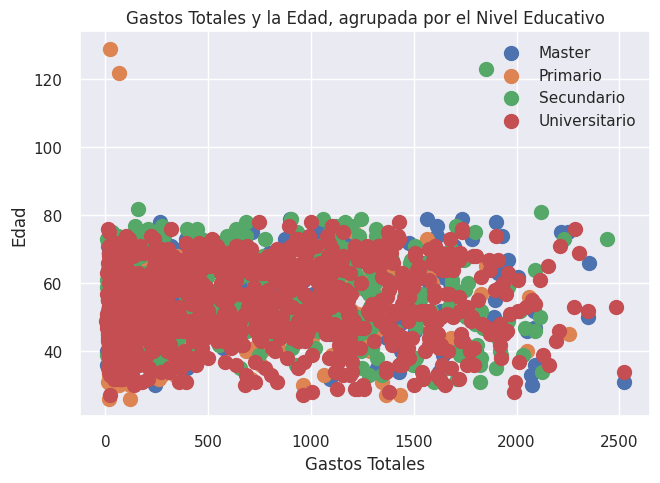

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,2)
for Tipo_edu in ['Master' , 'Primario', 'Secundario' , 'Universitario']:
    plt.scatter(x = 'Gastos_Totales', y = 'Edad', data = df1[df1['Educacion'] == Tipo_edu] ,s = 100 , label = Tipo_edu)
    plt.title('Gastos Totales y la Edad, agrupada por el Nivel Educativo')
    plt.xlabel('Gastos Totales')
    plt.ylabel('Edad')
plt.legend()
plt.show()

Es difícil identificar una relación clara entre los gastos totales y la edad,agrupados por el nivel educativo, por lo que se deben ralizar más pruebas. Sin embargo, parece que se forman grupos dentro de los datos.

¿ Existe una relacion entre los Gastos Totales y Gastos en Vinos, agrupada por el Nivel Educativo?

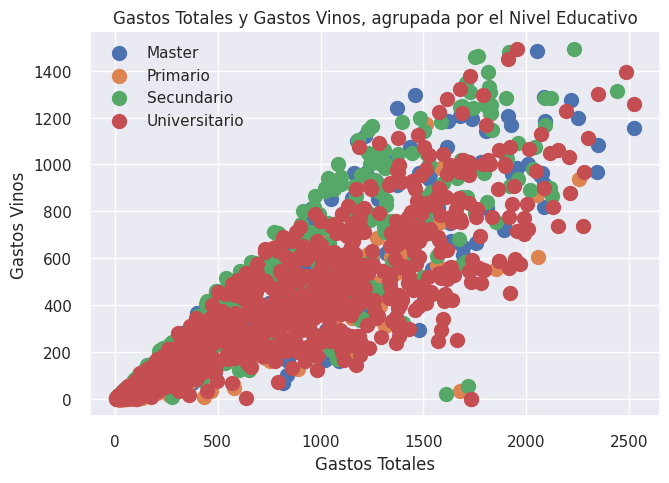

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,2)
for Tipo_edu in ['Master' , 'Primario', 'Secundario' , 'Universitario']:
    plt.scatter(x = 'Gastos_Totales', y = 'Gastos_Vinos', data = df1[df1['Educacion'] == Tipo_edu] ,s = 100 , label = Tipo_edu)
    plt.title('Gastos Totales y Gastos Vinos, agrupada por el Nivel Educativo')
    plt.xlabel('Gastos Totales')
    plt.ylabel('Gastos Vinos')
plt.legend()
plt.show()

Se puede identificar una relción clara entre los gastos totales y gastos en vino, agrupados por el nivel educativo, es positiva: a medida que aumentan los gastos totales, aumentan los gastos en vino.

In [ ]:
master= df1[df1.Educacion=='Master'].head(250)
primario= df1[df1.Educacion=='Primario'].head(250)
secundario= df1[df1.Educacion=='Secundario'].head(250)
universitario= df1[df1.Educacion=='Universitario'].head(250)
# esto lo hacemos para separar en distintos DS en funcion del nivel educativo y 
#despues vamos a tomar igual cantidad de registros para cada caso y recien ahy podemos hacer un grafico comparativo...

**¿Según la educación de mi cliente, cuáles es el que más compras hace en el almacén?**

<Axes: xlabel='Educacion', ylabel='Count'>

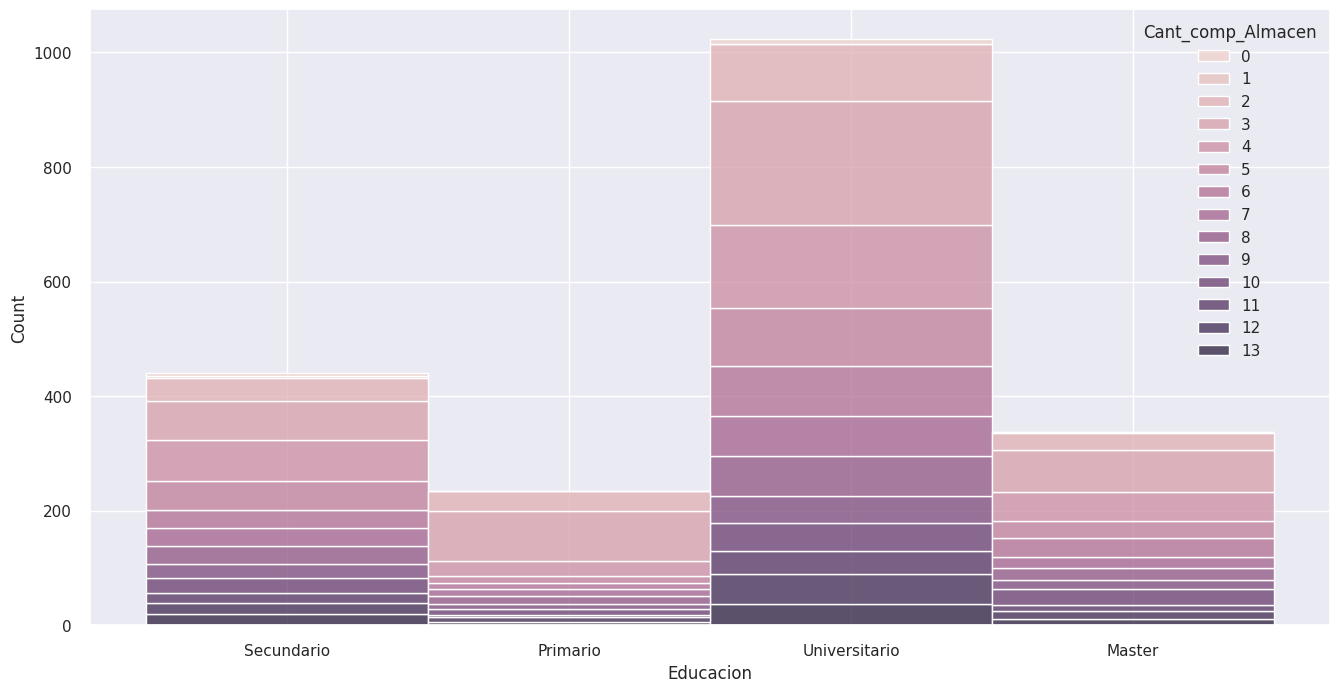

In [ ]:
sns.histplot(data=df1, x="Educacion", hue="Cant_comp_Almacen", multiple="stack")


**En esta gráfica podemos confirmar que los clientes con educación Universitaria son los que más compras hacen en el Almacén**

**¿Según el Estado Civil de mi cliente, cuáles es el que más compras hace en el almacén?**

<Axes: xlabel='Estado_Civil', ylabel='Count'>

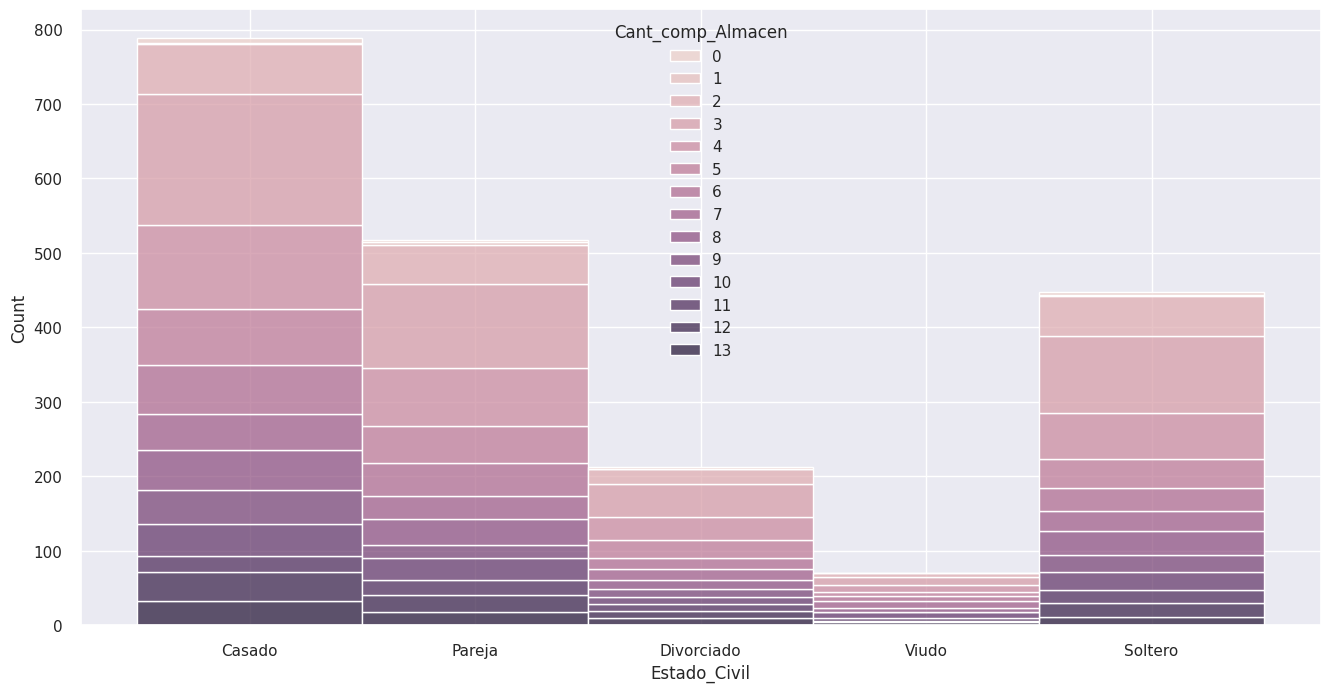

In [ ]:
sns.histplot(data=df1, x="Estado_Civil", hue="Cant_comp_Almacen", multiple="stack")

**En esta gráfica podemos confirmar que los clientes con Estado Civil, Casados son los que más compras hacen en el Almacén**

**¿Según la cantidad de niños de mi cliente, cuáles es el que más compras hace en el almacén?**

<Axes: xlabel='Niños', ylabel='Count'>

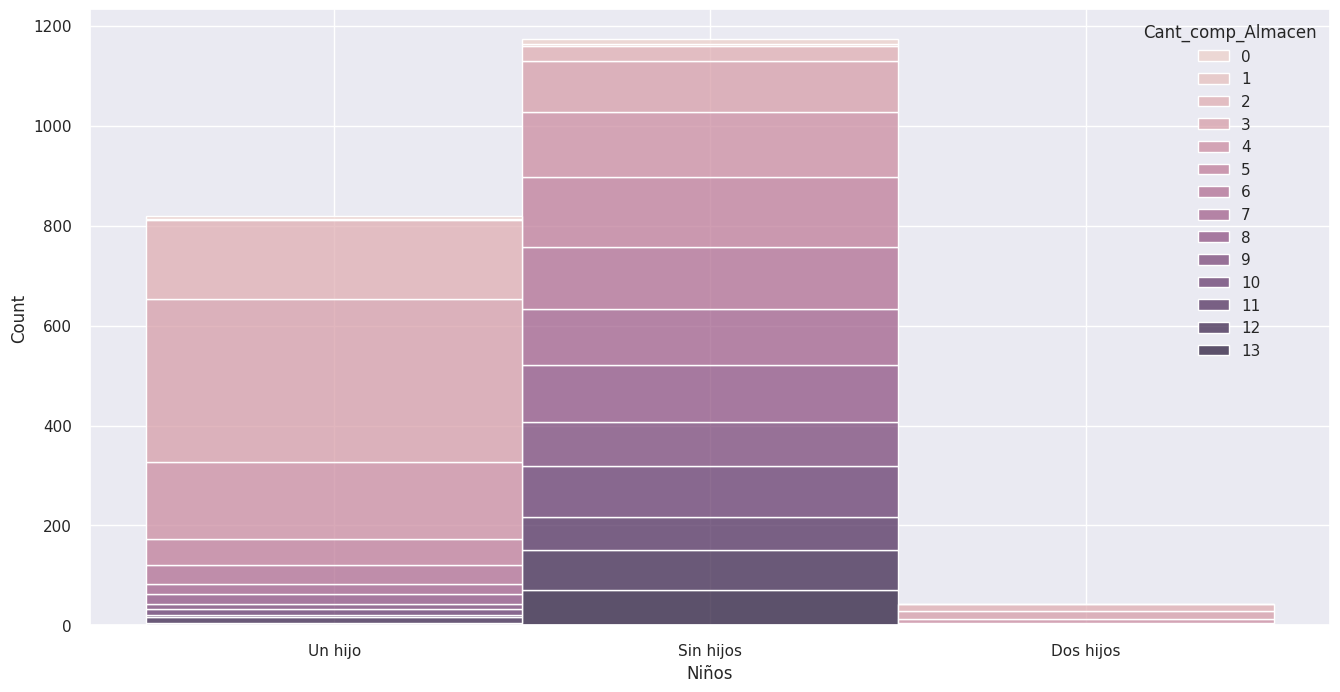

In [ ]:
sns.histplot(data=df1, x="Niños", hue="Cant_comp_Almacen", multiple="stack")

**En esta gráfica podemos confirmar que los clientes, con un hijo son los que más compras hacen en el Almacén**

**¿Cómo ha variado el número de ingresos o nuevos clientes a lo largo de los meses?**

In [ ]:
df1['Fecha_ingreso']=pd.to_datetime(df1['Fecha_ingreso'])# Convierte la columna de Fechas_ingreso a una columna de objetos tiempo
filtered=df1[df1['Fecha_ingreso'].dt.month<=12] #
filtered2=pd.DataFrame(filtered.groupby(df1['Fecha_ingreso'].dt.to_period('M')).size()) #conteo de clientes para cada mes
filtered2.rename(columns={0:'count'},inplace=True) #cambiando nombre columna
filtered2['mes']=filtered2.index.month #creando una columna donde este solo el mes


Filtro la cantidad de ingresos por mes y por años

In [ ]:
year_2012=filtered2.loc[filtered2.index.year==2012,['count','mes']].set_index("mes")
year_2013=filtered2.loc[filtered2.index.year==2013,['count','mes']].set_index("mes")
year_2014=filtered2.loc[filtered2.index.year==2014,['count','mes']].set_index("mes")
year_2014

count
mes       
1       76
2       56
3       74
4       67
5       73
6       57
7       21
8       15
9       12
10      21
11      19
12      21

Graficmos el total de nuevos clientes agrupados por meses de los distintos años

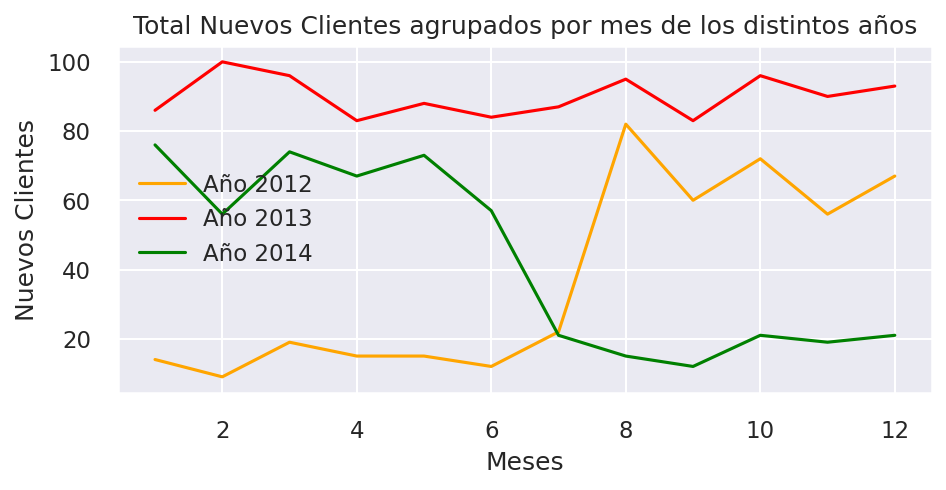

In [ ]:
plt.figure(figsize=(7, 3), dpi=150)
  
year_2012['count'].plot(label='Año 2012', color='orange')
year_2013['count'].plot(label='Año 2013', color='red')
year_2014['count'].plot(label='Año 2014', color='green')

plt.title('Total Nuevos Clientes agrupados por mes de los distintos años')
plt.xlabel('Meses')
plt.ylabel('Nuevos Clientes')
plt.legend()
plt.show()

Con esta gráfica podemos ver en que mes, tenemos mayor cantidad de nuevos 


clientes y como varía a lo largo de los años.

También notamos que en año 2012, se puede ver una suba muy interesante de nuevos clientes en los meses de julio y agosto, confirmando seguro una estrategia acertada para conseguir nuevos clientes.

Notamos que el año 2013 fue muy bueno y constante la cantidad de nuevos Clientes.


---




**Trabajamos con la columna Edad y los agrupamos por rangos de Edades**

La columna “Edad”, en este caso vamos a crear cinco rangos de edades, divididos de la siguiente forma:

El primer rango lo comprenda las personas con edades entre 0 a 18,

El segundo rango serán las personas con edades entre 19 a 35,

En el tercer rango estarán las personas entre 36 a 55 años,

En el cuarto rango estará formado por las personas con edades comprendidas entre 56 a 75 años,

El quinto y últomo lo forman las personas entre 76 a 100 años.

## 💈# <font color='cyan'>**Agrupamos los clientes por rango de edades y descartamos los mayores de 100 años.**

In [ ]:
df1=df1.loc[df1.Edad<100]  # selecciono todas las personas menores de 100 años
bins = [0, 18, 35, 55, 75, 100]  # creamos una variable llamada “bins” en donde colocaremos nuestros rangos
names = ["Desde 0-18", "Desde 19-35", "Desde 36-55", "Desde 56-75", "Desde 76-100"] # colocamos los nombres de cada rango que lo definimos en la variable “names”
df1['Edad'] = pd.cut(df1['Edad'], bins, labels = names)


**Ahora los tenemos agrupados en rangos de edades.**


In [ ]:
df1['Edad'].nunique()

4

In [ ]:
df1['Edad'].value_counts()


Desde 36-55     1081
Desde 56-75      790
Desde 19-35      128
Desde 76-100      34
Desde 0-18         0
Name: Edad, dtype: int64

Graficamos los rangos de edades 

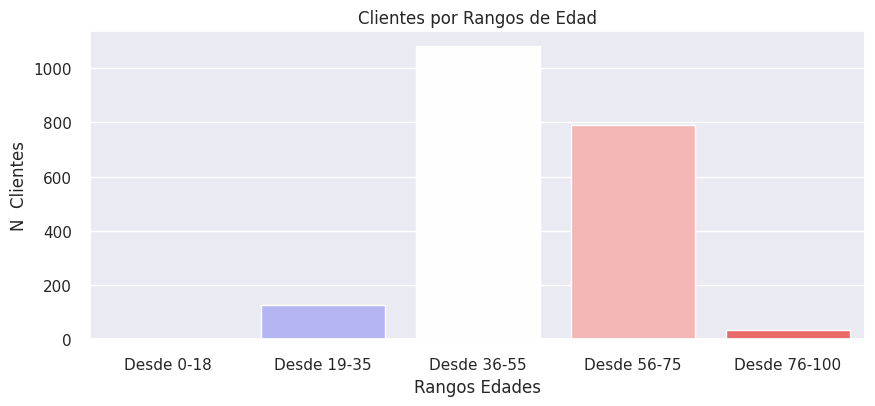

In [ ]:
plt.figure(figsize=(10,4))
Rango_edades=df1['Edad'].value_counts()
sns.set_style("darkgrid")
sns.barplot(x=Rango_edades.index, y=Rango_edades.values,palette="bwr")
plt.title('Clientes por Rangos de Edad')
plt.xlabel('Rangos Edades')
plt.ylabel('N  Clientes')
plt.show() 


El gráfico de pares es una forma útil de visualizar las relaciones entre múltiples variables en un conjunto de datos. Cada gráfico de dispersión en la cuadrícula muestra la relación entre dos variables, y los histogramas en la diagonal muestran la distribución de cada variable. El parámetro "hue" nos permite visualizar cómo se distribuyen los diferentes grupos en los datos en las variables.

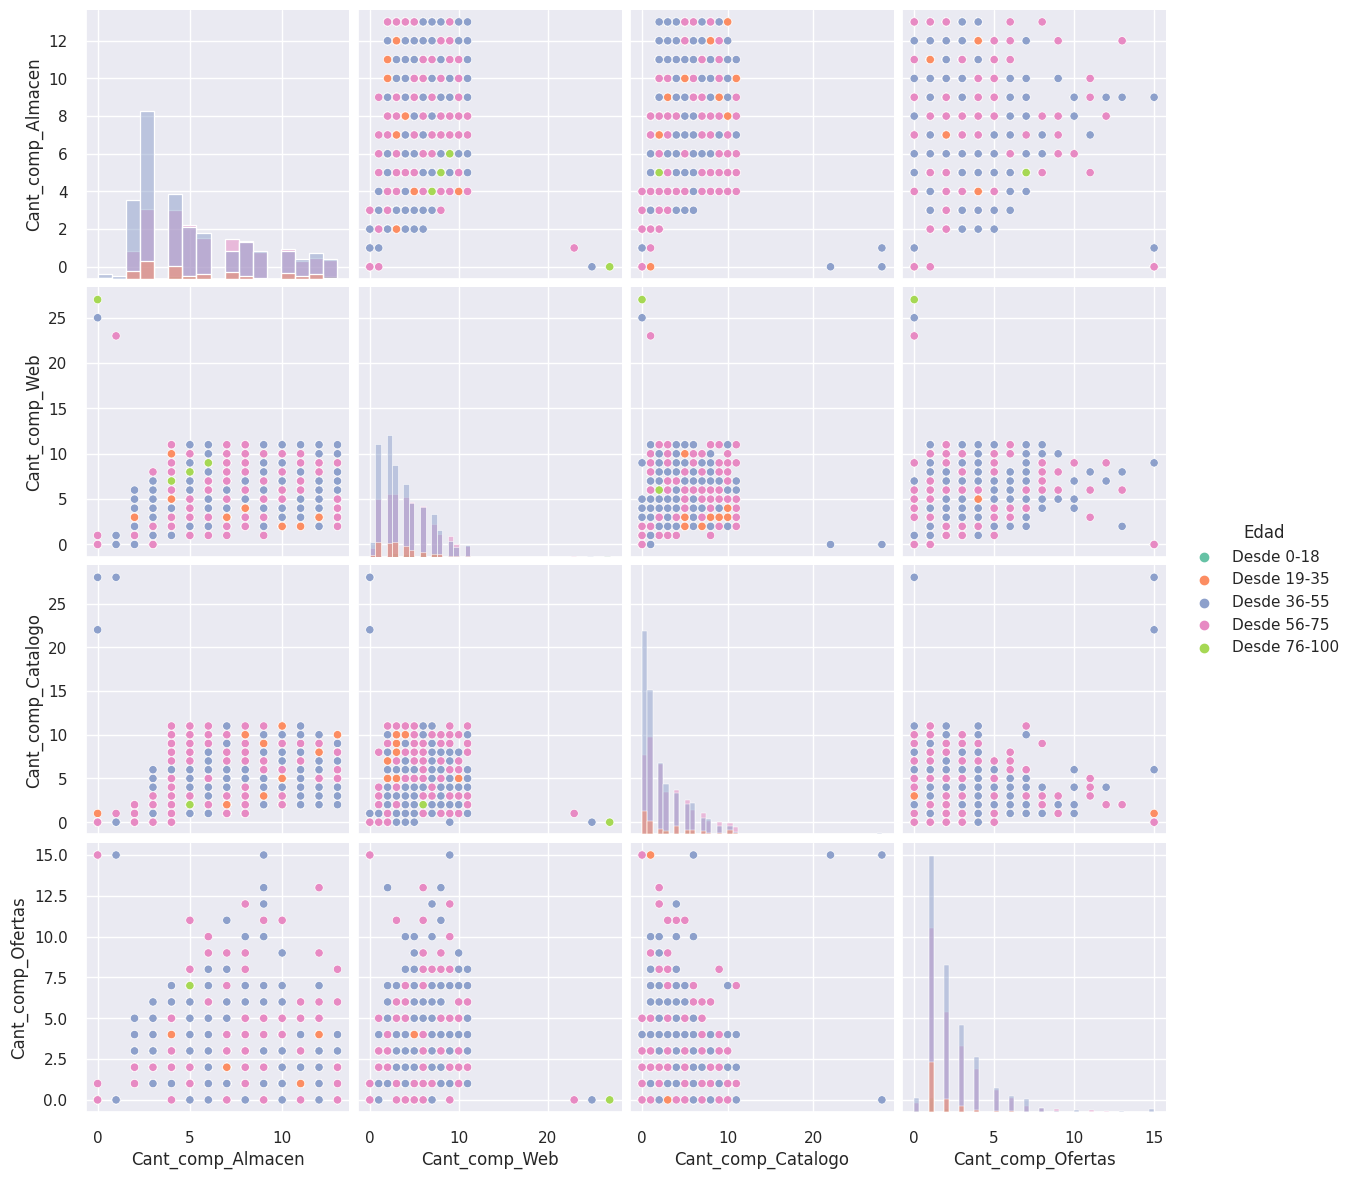

In [ ]:
#Pairplot
sns.pairplot(df1[['Cant_comp_Almacen','Cant_comp_Web','Cant_comp_Catalogo','Cant_comp_Ofertas','Edad']],hue = 'Edad' , height = 3 , palette = 'Set2',
             diag_kind='hist'
             )

**Sacamos el porcentaje de cada rango de edades de mi clientes**

In [ ]:
g_totales=df1['Edad'].value_counts().sum()
g_totales

2033

**Calculamos el porcentaje de cada rango de edad**

In [ ]:

porc_18 = 0 / g_totales * 100
porc_35 = 128 / g_totales * 100
porc_55 = 1081 / g_totales * 100
porc_75 = 790 / g_totales * 100
porc_100 = 34 / g_totales * 100

print("El porcentage del rango 0-18 años de mis cliente es ", round(porc_18), "%")
print("El porcentage del rango 19-35 años de mis cliente es ", round(porc_35), "%")
print("El porcentage del rango 36-55 años de mis cliente es ", round(porc_55), "%")
print("El porcentage del rango 56-75 años de mis cliente es ", round(porc_75), "%")
print("El porcentage del rango 76-100 años de mis cliente es ", round(porc_100), "%")


El porcentage del rango 0-18 años de mis cliente es  0 %
El porcentage del rango 19-35 años de mis cliente es  6 %
El porcentage del rango 36-55 años de mis cliente es  53 %
El porcentage del rango 56-75 años de mis cliente es  39 %
El porcentage del rango 76-100 años de mis cliente es  2 %


Creamos un gráfico circular para ver los porcentajes.

In [ ]:
import plotly.graph_objects as go 
colors=['blue','orange','red','gren','yellow']
fig= go.Figure(data=[go.Pie(labels=['Rango 0-18 años','Rango 19-35 años','Rango 36-55 años','Rango 56-75 años','Rango 76-100 años'],
                            values=[0,128,1081,790,34])])
fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                  textinfo= 'label+percent',pull=[0.1, 0.1],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF',
                                                       width=2)))


En este gráfico podemos ver el porcentaje en función de los rangos de Edad.

El 53 % de mis clientes tiene entre 36 y 55 años de edad.

El 38.9 % de mis clientes tiene entre 56 y 100 años de edad.


No hay menores de 18 años.


---



**¿Dónde compra mi cliente? en almacén, web o ofertas de catalogos**

Ordeno y Selecciono las columnas para tener una mejor visión de los datos.

In [ ]:
dfc=df1[['Edad','Educacion','Estado_Civil','Cant_comp_Ofertas','Cant_comp_Web','Cant_comp_Catalogo','Cant_comp_Almacen','Gastos_Totales','Num_Visitas_Web']]# Ordeno y Selecciono las columnas para tener una mejor visión de los datos.
dfc.head()

Edad      Educacion Estado_Civil  Cant_comp_Ofertas  Cant_comp_Web  \
0  Desde 36-55     Secundario       Casado                  4              7   
1  Desde 56-75       Primario       Pareja                  1              8   
2  Desde 36-55  Universitario       Casado                  5              4   
3  Desde 56-75         Master       Pareja                  1              2   
4  Desde 36-55       Primario       Pareja                  4              2   

   Cant_comp_Catalogo  Cant_comp_Almacen  Gastos_Totales  Num_Visitas_Web  
0                   2                  5             418                7  
1                   7                 11             939                6  
2                   1                  2              71                9  
3                   4                 12            1910                1  
4                   1                  3             100                9

## 💈# <font color='cyan'>**Cantidad de compras en función de la Educación**

In [ ]:
# Agrupar los datos por nivel de educación y sumar la cantidad de compras
agrupados_Edu = dfc.groupby('Educacion')['Cant_comp_Ofertas','Cant_comp_Web','Cant_comp_Catalogo','Cant_comp_Almacen'].sum().reset_index()
# Ordenar los datos de mayor a menor
agrupados_Edu = agrupados_Edu.sort_values('Cant_comp_Ofertas', ascending=False)
warnings.filterwarnings("ignore")
agrupados_Edu

Educacion  Cant_comp_Ofertas  Cant_comp_Web  Cant_comp_Catalogo  \
3  Universitario               2361           4257                2804   
2     Secundario               1052           1942                1289   
0         Master                810           1356                 877   
1       Primario                512            782                 443   

   Cant_comp_Almacen  
3               5968  
2               2644  
0               1980  
1               1157

**Graficamos la cantidad de compras en función de la Educación**

<Figure size 1000x400 with 0 Axes>

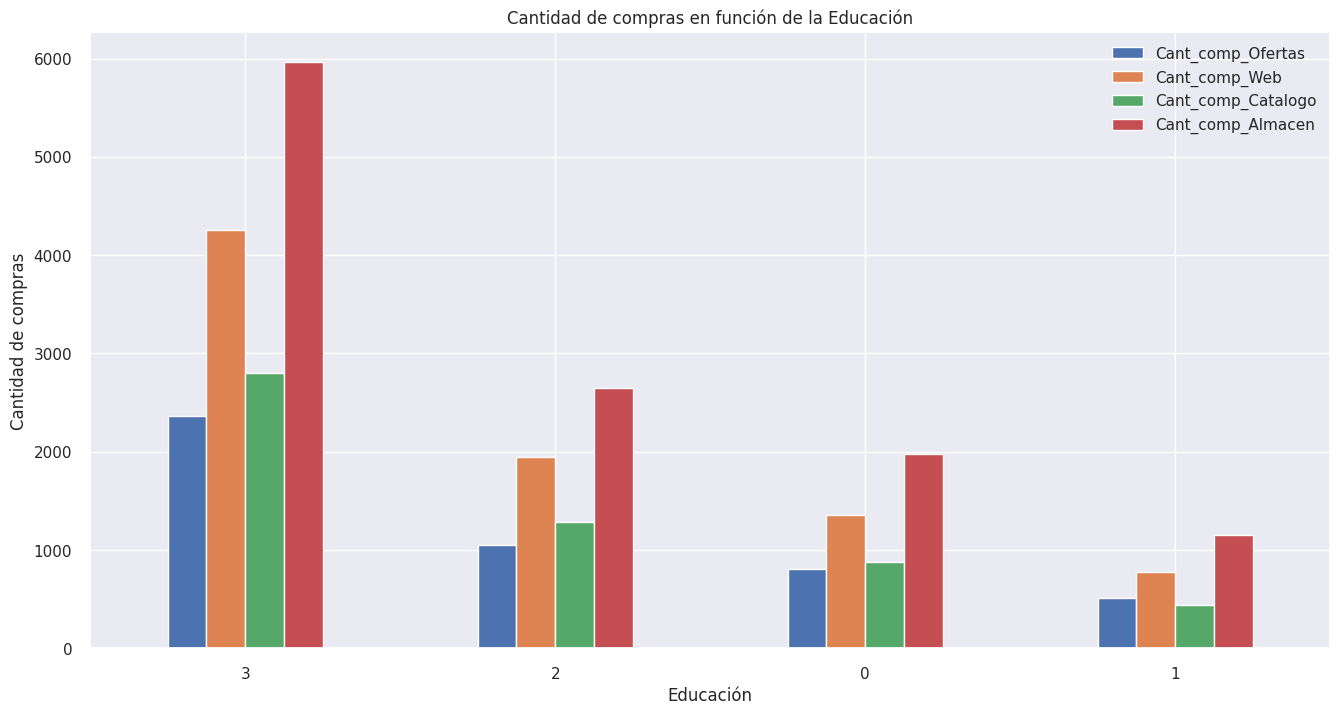

In [ ]:
# Generar el gráfico de barras
plt.figure(figsize=(10,4))
agrupados_Edu.plot.bar()
plt.xlabel('Educación')
plt.ylabel('Cantidad de compras')
plt.title('Cantidad de compras en función de la Educación')
# Girar 0 grados el label del eje x
plt.xticks(rotation=0)
plt.show()

Para interpretar este gráfico, los clientes en nuestro conjunto de datos, los universitarios (la primera barra de la izquierda), son los que más compran en general, prácticamente duplicando al que le sigue, que son los que tiene nivel secundario.
Los universitarios compran mayormente en almacén y en menor medida por la web.
Notamos que en todos los niveles se compra más en almacén que es el primer lugar, sigue las compras web, luego las compras por catálogo y por último las ofertas.

## 💈# <font color='cyan'>**Cantidad de compras en función de la Edad**

In [ ]:
# Agrupar los datos por edad y sumar la cantidad de compras
agrupados_Edad = dfc.groupby('Edad')['Cant_comp_Ofertas','Cant_comp_Web','Cant_comp_Catalogo','Cant_comp_Almacen'].sum().reset_index()
# Ordenar los datos de mayor a menor
agrupados_Edad = agrupados_Edad.sort_values('Cant_comp_Ofertas', ascending=False)
warnings.filterwarnings("ignore")
agrupados_Edad

Edad  Cant_comp_Ofertas  Cant_comp_Web  Cant_comp_Catalogo  \
2   Desde 36-55               2555           4160                2456   
3   Desde 56-75               1924           3534                2441   
1   Desde 19-35                210            436                 378   
4  Desde 76-100                 46            207                 138   
0    Desde 0-18                  0              0                   0   

   Cant_comp_Almacen  
2               5803  
3               4962  
1                727  
4                257  
0                  0

**Graficamos la cantidad de compras en función de la edad**

<Figure size 1000x400 with 0 Axes>

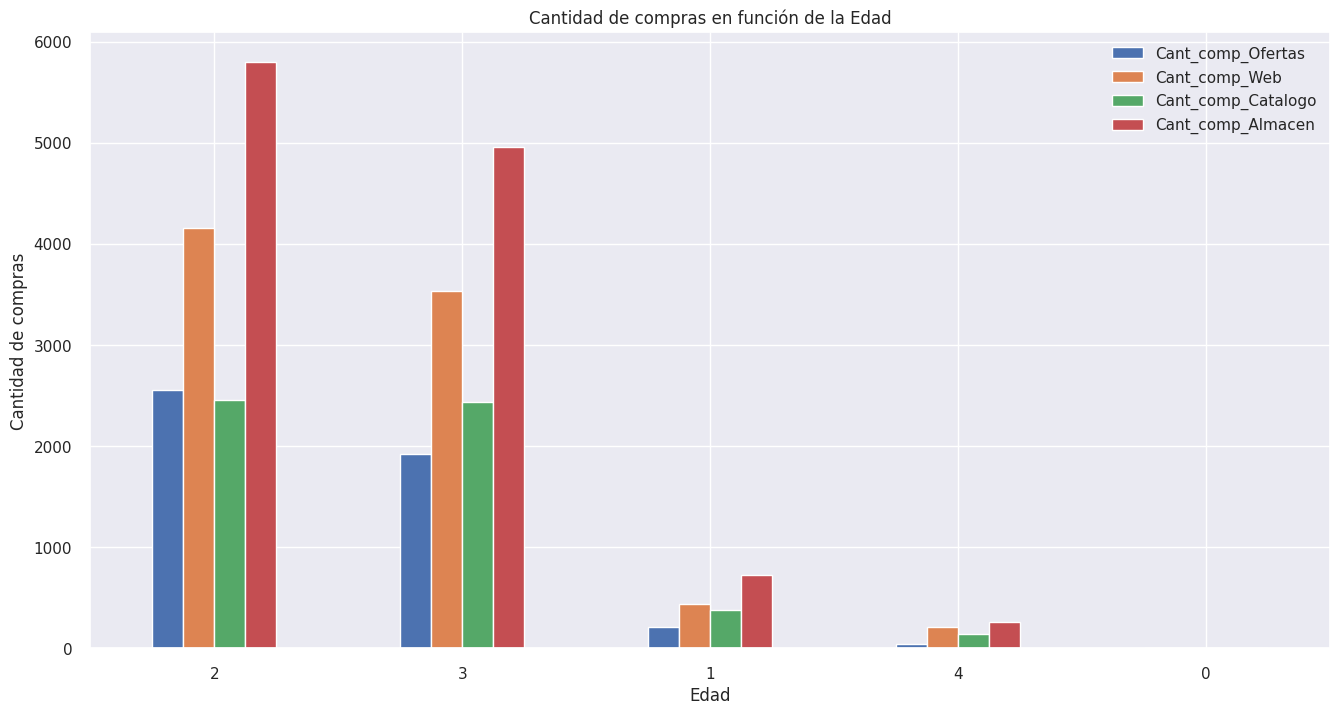

In [ ]:
# Generar el gráfico de barras
plt.figure(figsize=(10,4))
agrupados_Edad.plot.bar()
plt.xlabel('Edad')
plt.ylabel('Cantidad de compras')
plt.title('Cantidad de compras en función de la Edad')
# Girar 0 grados el label del eje x
plt.xticks(rotation=0)
plt.show()

Para interpretar este gráfico, los clientes en nuestro conjunto de datos del rango de edad desde 36 a 55 años (la primera barra de la izquierda), son los que más compran en general, compran mayormente en almacén y en menor medida por la web.
El rango que va de los 56 a 75 años lo sigue con menos cantidad de compras. Los demás rangos de edades tienen muy pocas compras en comparación a los anteriores rangos.

## 💈# <font color='cyan'>#**Cantidad de compras en función del Estado Civil**

In [ ]:
# Agrupar los datos por Estado Civil y sumar la cantidad de compras
agrupados_ecivil = dfc.groupby('Estado_Civil')['Cant_comp_Ofertas','Cant_comp_Web','Cant_comp_Catalogo','Cant_comp_Almacen'].sum().reset_index()
# Ordenar los datos de mayor a menor
agrupados_ecivil = agrupados_ecivil.sort_values('Cant_comp_Ofertas', ascending=False)
warnings.filterwarnings("ignore")
agrupados_ecivil

Estado_Civil  Cant_comp_Ofertas  Cant_comp_Web  Cant_comp_Catalogo  \
0       Casado               1900           3239                2086   
2       Pareja               1194           2100                1369   
3      Soltero                956           1758                1174   
1   Divorciado                525            912                 549   
4        Viudo                160            328                 235   

   Cant_comp_Almacen  
0               4623  
2               2944  
3               2497  
1               1234  
4                451

**Graficamos la cantidad de compras en función del estado civil**

<Figure size 1000x400 with 0 Axes>

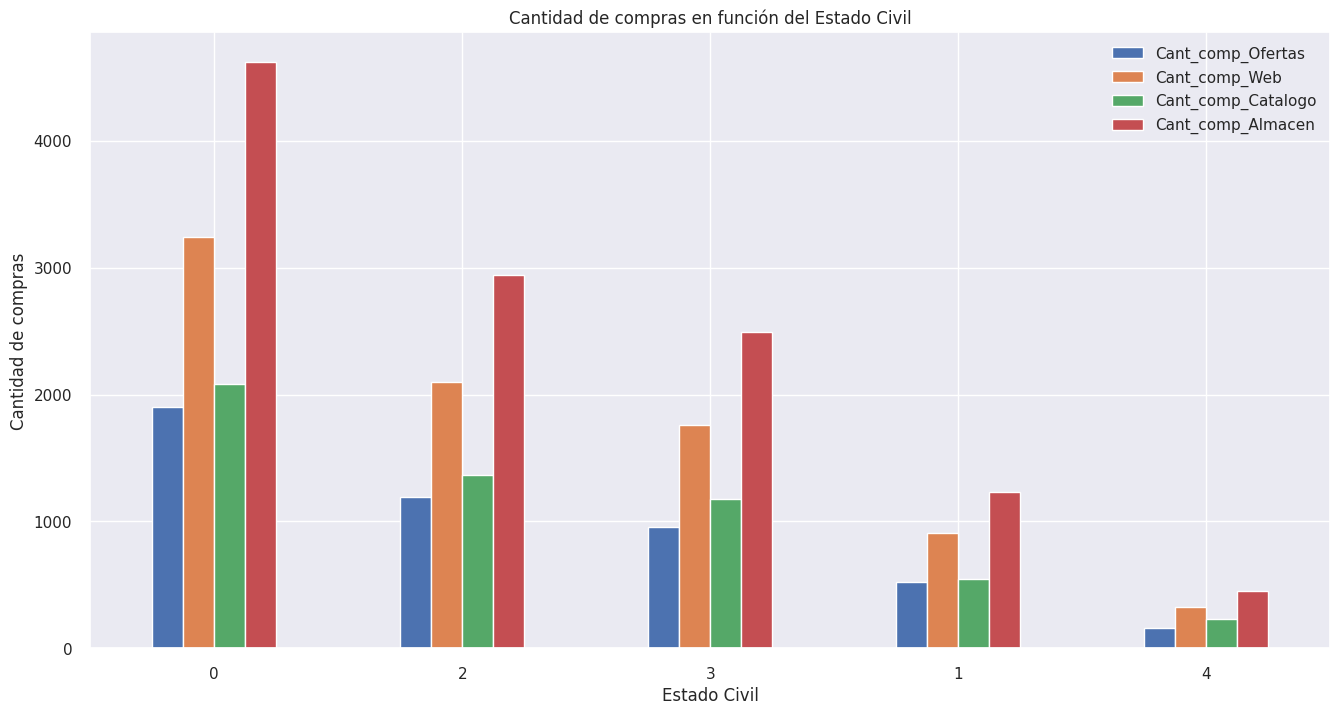

In [ ]:
# Generar el gráfico de barras
plt.figure(figsize=(10,4))
agrupados_ecivil.plot.bar()
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de compras')
plt.title('Cantidad de compras en función del Estado Civil')
# Girar 0 grados el label del eje x
plt.xticks(rotation=0)
plt.show()

Para interpretar este gráfico, las cantidades de compras de los clientes en función de su estado civil, la mayoría de los clientes casados (la primera barra de la izquierda), son los que más compran en general.
Notamos que en todos los estados civiles se compra más en almacén que es el primer lugar, sigue las compras web, luego las compras por catálogo y por último las ofertas.



---



## 💈# <font color='cyan'>**Se crea una columna llamada Antigüedad**

**Este código creará una nueva columna en el dataDataFrame llamada "Antigúedad", que contiene la antigüedad de cada cliente en meses, calculada como la cantidad de meses entre la fecha de registro del cliente y la columna creada "Fecha_ultima_compra" el 29 de junio de 2014.**

In [ ]:
#import datetime
df1['Fecha_ingreso']=pd.to_datetime(df1['Fecha_ingreso'])# Convierte la columna de Fechas_ingreso a una columna de objetos tiempo
df1=df1.assign(Antigüedad=pd.datetime.strptime('2014-06-29', '%Y-%m-%d')) # creamos la columna nueva Antigúedad con la misma fecha 2014-06-29 que es la ultima fecha de ingreso
df1=df1.assign(Fecha_ultima_compra=pd.datetime.strptime('2014-06-29', '%Y-%m-%d'))# creamos la columna nueva Fecha_ultima_compra con la misma fecha 2014-06-29 que es la ultima fecha de ingreso
df1['Antigüedad'] = df1['Fecha_ultima_compra']-df1['Fecha_ingreso'] # Hacemos la diferencia , me indica en días la antigúedad de mi cliente
warnings.filterwarnings("ignore")
df1.head()

Fecha_Nacim         Edad      Educacion Estado_Civil  Ingreso_Anual  \
0         1970  Desde 36-55     Secundario       Casado          55158   
1         1950  Desde 56-75       Primario       Pareja          52203   
2         1976  Desde 36-55  Universitario       Casado           7500   
3         1959  Desde 56-75         Master       Pareja          82576   
4         1985  Desde 36-55       Primario       Pareja           7500   

       Niños  Adolescente Fecha_ingreso  Dias_Ulti_Comp  Gastos_Vinos  ...  \
0    Un hijo            1    2012-07-30              72           293  ...   
1  Sin hijos            0    2012-07-31              36           488  ...   
2    Un hijo            0    2012-01-08              19             7  ...   
3  Sin hijos            0    2012-01-08              66          1206  ...   
4    Un hijo            0    2012-01-08              98             5  ...   

   Gastos_Dulces  Gastos_Joyas  Cant_comp_Ofertas  Cant_comp_Web  \
0             11            23                  4              7   
1            108            28                  1              8   
2              7            32                  5              4   
3             18            18                  1              2   
4             14            34                  4              2   

   Cant_comp_Catalogo  Cant_comp_Almacen  Num_Visitas_Web  Gastos_Totales  \
0                   2                  5                7             418   
1                   7                 11                6             939   
2                   1                  2                9              71   
3                   4                 12                1            1910   
4                   1                  3                9             100   

   Antigüedad  Fecha_ultima_compra  
0    699 days           2014-06-29  
1    698 days           2014-06-29  
2    903 days           2014-06-29  
3    903 days           2014-06-29  
4    903 days           2014-06-29  

[5 rows x 23 columns]

En esta tabla ya podemos ver la Antigúedad de mi cliente en días

In [ ]:
df1.dtypes

Fecha_Nacim                      int64
Edad                          category
Educacion                       object
Estado_Civil                    object
Ingreso_Anual                    int64
Niños                           object
Adolescente                      int64
Fecha_ingreso           datetime64[ns]
Dias_Ulti_Comp                   int64
Gastos_Vinos                     int64
Gastos_Frutas                    int64
Gastos_Carne                     int64
Gastos_Pescados                  int64
Gastos_Dulces                    int64
Gastos_Joyas                     int64
Cant_comp_Ofertas                int64
Cant_comp_Web                    int64
Cant_comp_Catalogo               int64
Cant_comp_Almacen                int64
Num_Visitas_Web                  int64
Gastos_Totales                   int64
Antigüedad             timedelta64[ns]
Fecha_ultima_compra     datetime64[ns]
dtype: object

Convierto del formato timedelta64[ns] a formato float64

In [ ]:
df1['Antigüedad']=df1['Antigüedad'] / np.timedelta64(1, "D") 

Con esto transformo la antigüedad de días a meses, creo la columna Antigüedad_mes

In [ ]:
df1['Antigüedad_mes']=df1['Antigüedad'] /30 
df1.head()


Fecha_Nacim         Edad      Educacion Estado_Civil  Ingreso_Anual  \
0         1970  Desde 36-55     Secundario       Casado          55158   
1         1950  Desde 56-75       Primario       Pareja          52203   
2         1976  Desde 36-55  Universitario       Casado           7500   
3         1959  Desde 56-75         Master       Pareja          82576   
4         1985  Desde 36-55       Primario       Pareja           7500   

       Niños  Adolescente Fecha_ingreso  Dias_Ulti_Comp  Gastos_Vinos  ...  \
0    Un hijo            1    2012-07-30              72           293  ...   
1  Sin hijos            0    2012-07-31              36           488  ...   
2    Un hijo            0    2012-01-08              19             7  ...   
3  Sin hijos            0    2012-01-08              66          1206  ...   
4    Un hijo            0    2012-01-08              98             5  ...   

   Gastos_Joyas  Cant_comp_Ofertas  Cant_comp_Web  Cant_comp_Catalogo  \
0            23                  4              7                   2   
1            28                  1              8                   7   
2            32                  5              4                   1   
3            18                  1              2                   4   
4            34                  4              2                   1   

   Cant_comp_Almacen  Num_Visitas_Web  Gastos_Totales  Antigüedad  \
0                  5                7             418         699   
1                 11                6             939         698   
2                  2                9              71         903   
3                 12                1            1910         903   
4                  3                9             100         903   

   Fecha_ultima_compra  Antigüedad_mes  
0           2014-06-29              23  
1           2014-06-29              23  
2           2014-06-29              30  
3           2014-06-29              30  
4           2014-06-29              30  

[5 rows x 24 columns]

In [ ]:
df1.dtypes

Fecha_Nacim                     int64
Edad                         category
Educacion                      object
Estado_Civil                   object
Ingreso_Anual                   int64
Niños                          object
Adolescente                     int64
Fecha_ingreso          datetime64[ns]
Dias_Ulti_Comp                  int64
Gastos_Vinos                    int64
Gastos_Frutas                   int64
Gastos_Carne                    int64
Gastos_Pescados                 int64
Gastos_Dulces                   int64
Gastos_Joyas                    int64
Cant_comp_Ofertas               int64
Cant_comp_Web                   int64
Cant_comp_Catalogo              int64
Cant_comp_Almacen               int64
Num_Visitas_Web                 int64
Gastos_Totales                  int64
Antigüedad                    float64
Fecha_ultima_compra    datetime64[ns]
Antigüedad_mes                float64
dtype: object

In [ ]:

Antigüeda_1 = [-5, 6, 12, 18, 24, 35]  # creamos una variable llamada “Antigüedad” en donde colocaremos nuestros rangos
names_1 = ["De 0 a 6", "De 7 a 12", "De 13 a 15", "De 16 a 24", "Más de 25"] # colocamos los nombres de cada rango que lo definimos en la variable “names_1”
df1['Antigüedad_mes'] = pd.cut(df1['Antigüedad_mes'], Antigüeda_1, labels = names_1)
df1.head()

Fecha_Nacim         Edad      Educacion Estado_Civil  Ingreso_Anual  \
0         1970  Desde 36-55     Secundario       Casado          55158   
1         1950  Desde 56-75       Primario       Pareja          52203   
2         1976  Desde 36-55  Universitario       Casado           7500   
3         1959  Desde 56-75         Master       Pareja          82576   
4         1985  Desde 36-55       Primario       Pareja           7500   

       Niños  Adolescente Fecha_ingreso  Dias_Ulti_Comp  Gastos_Vinos  ...  \
0    Un hijo            1    2012-07-30              72           293  ...   
1  Sin hijos            0    2012-07-31              36           488  ...   
2    Un hijo            0    2012-01-08              19             7  ...   
3  Sin hijos            0    2012-01-08              66          1206  ...   
4    Un hijo            0    2012-01-08              98             5  ...   

   Gastos_Joyas  Cant_comp_Ofertas  Cant_comp_Web  Cant_comp_Catalogo  \
0            23                  4              7                   2   
1            28                  1              8                   7   
2            32                  5              4                   1   
3            18                  1              2                   4   
4            34                  4              2                   1   

   Cant_comp_Almacen  Num_Visitas_Web  Gastos_Totales  Antigüedad  \
0                  5                7             418         699   
1                 11                6             939         698   
2                  2                9              71         903   
3                 12                1            1910         903   
4                  3                9             100         903   

   Fecha_ultima_compra  Antigüedad_mes  
0           2014-06-29      De 16 a 24  
1           2014-06-29      De 16 a 24  
2           2014-06-29       Más de 25  
3           2014-06-29       Más de 25  
4           2014-06-29       Más de 25  

[5 rows x 24 columns]

In [ ]:
df1['Antigüedad_mes'].nunique()

5

In [ ]:
df1['Antigüedad_mes'].value_counts()

De 13 a 15    533
De 7 a 12     531
De 0 a 6      493
De 16 a 24    367
Más de 25      88
Name: Antigüedad_mes, dtype: int64

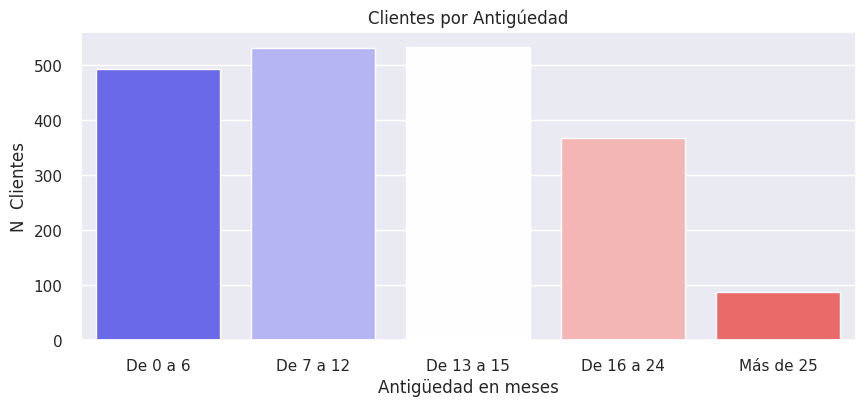

In [ ]:
Rango_Antigúedad=df1['Antigüedad_mes'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Rango_Antigúedad.index, y=Rango_Antigúedad.values,palette="bwr")
plt.title('Clientes por Antigúedad')
plt.xlabel('Antigüedad en meses')
plt.ylabel('N  Clientes')
plt.show() 

**Según Antigúedad son:**

De 0 hasta 6 meses de antigúdad.

De 7 hasta 12 meses de antigúdad.

De 13 hasta 15 meses de antigúdad.

De 16 hasta 24 meses de antigúdad.

Más de 25 meses de antigúdad.


In [ ]:
df1.describe().T

count  mean   std  min   25%   50%   75%    max
Fecha_Nacim          2033  1969    12 1940  1959  1970  1977   1996
Ingreso_Anual        2033 52682 28948 1730 35544 51569 68682 666666
Adolescente          2033     1     1    0     0     0     1      2
Dias_Ulti_Comp       2033    49    29    0    24    49    74     99
Gastos_Vinos         2033   304   336    0    23   175   504   1493
Gastos_Frutas        2033    26    40    0     2     8    33    199
Gastos_Carne         2033   168   228    0    16    68   230   1725
Gastos_Pescados      2033    37    55    0     3    12    50    259
Gastos_Dulces        2033    27    42    0     1     8    34    263
Gastos_Joyas         2033    44    52    0     9    24    56    362
Cant_comp_Ofertas    2033     2     2    0     1     2     3     15
Cant_comp_Web        2033     4     3    0     2     4     6     27
Cant_comp_Catalogo   2033     3     3    0     0     2     4     28
Cant_comp_Almacen    2033     6     3    0     3     5     8     13
Num_Visitas_Web      2033     5     2    0     3     6     7     20
Gastos_Totales       2033   606   602    5    69   396  1045   2525
Antigüedad           2033   351   232 -160   179   351   523    903

In [ ]:
dfa1=df1[['Fecha_ultima_compra','Edad','Educacion','Estado_Civil','Antigüedad_mes','Cant_comp_Ofertas','Cant_comp_Web','Cant_comp_Catalogo','Cant_comp_Almacen','Gastos_Totales','Num_Visitas_Web']]# Ordeno y Selecciono las columnas para tener una mejor visión de los datos.
dfa1.head()

Fecha_ultima_compra         Edad      Educacion Estado_Civil Antigüedad_mes  \
0          2014-06-29  Desde 36-55     Secundario       Casado     De 16 a 24   
1          2014-06-29  Desde 56-75       Primario       Pareja     De 16 a 24   
2          2014-06-29  Desde 36-55  Universitario       Casado      Más de 25   
3          2014-06-29  Desde 56-75         Master       Pareja      Más de 25   
4          2014-06-29  Desde 36-55       Primario       Pareja      Más de 25   

   Cant_comp_Ofertas  Cant_comp_Web  Cant_comp_Catalogo  Cant_comp_Almacen  \
0                  4              7                   2                  5   
1                  1              8                   7                 11   
2                  5              4                   1                  2   
3                  1              2                   4                 12   
4                  4              2                   1                  3   

   Gastos_Totales  Num_Visitas_Web  
0             418                7  
1             939                6  
2              71                9  
3            1910                1  
4             100                9

## 💈# <font color='cyan'>**Cantidad de compras en función de la Antigüedad**

In [ ]:
# Agrupar los datos por Antigüedad en meses y sumar la cantidad de compras
agrupados_anti = dfa1.groupby('Antigüedad_mes')['Cant_comp_Ofertas','Cant_comp_Web','Cant_comp_Catalogo','Cant_comp_Almacen'].sum()
# Ordenar los datos de mayor a menor
agrupados_anti = agrupados_anti.sort_values('Cant_comp_Ofertas', ascending=False)
warnings.filterwarnings("ignore")
agrupados_anti

Cant_comp_Ofertas  Cant_comp_Web  Cant_comp_Catalogo  \
Antigüedad_mes                                                         
De 13 a 15                   1307           2329                1528   
De 7 a 12                    1131           2101                1339   
De 16 a 24                   1053           1768                1101   
De 0 a 6                      937           1661                1117   
Más de 25                     273            401                 271   

                Cant_comp_Almacen  
Antigüedad_mes                     
De 13 a 15                   3224  
De 7 a 12                    3028  
De 16 a 24                   2286  
De 0 a 6                     2572  
Más de 25                     506

<Figure size 1000x400 with 0 Axes>

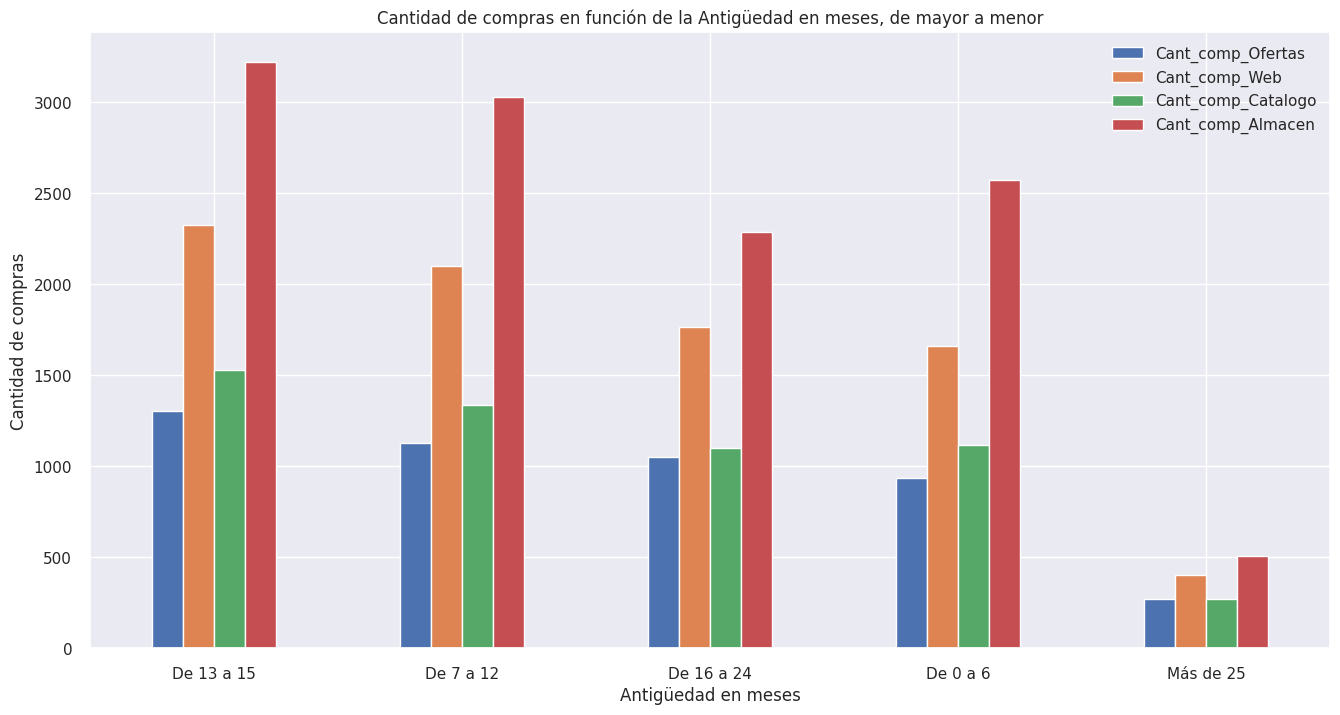

In [ ]:
# Generar el gráfico de barras
plt.figure(figsize=(10,4))
agrupados_anti.plot.bar()
plt.xlabel('Antigüedad en meses')
plt.ylabel('Cantidad de compras')
plt.title('Cantidad de compras en función de la Antigüedad en meses, de mayor a menor')
# Girar 0 grados el label del eje x
plt.xticks(rotation=0)
plt.show()

Para interpretar este gráfico, vemos las cantidades de compras de los clientes en función de su antigüedad, los clientes de 13 a 15 meses de antigüedad (la primera barra de la izquierda), son los que más compran en general.
Notamos que en todos los rangos se compra más en almacén que es el primer lugar, sigue las compras web, luego las compras por catálogo y por último las ofertas.

---



In [ ]:
# Agrupar los datos por Antigüedad en meses y sumar la cantidad de compras
agrupados_anti1 = dfa1.groupby('Antigüedad_mes')['Cant_comp_Ofertas','Cant_comp_Web','Cant_comp_Catalogo','Cant_comp_Almacen'].sum().reset_index()
warnings.filterwarnings("ignore")
agrupados_anti1

Antigüedad_mes  Cant_comp_Ofertas  Cant_comp_Web  Cant_comp_Catalogo  \
0       De 0 a 6                937           1661                1117   
1      De 7 a 12               1131           2101                1339   
2     De 13 a 15               1307           2329                1528   
3     De 16 a 24               1053           1768                1101   
4      Más de 25                273            401                 271   

   Cant_comp_Almacen  
0               2572  
1               3028  
2               3224  
3               2286  
4                506

<Figure size 1000x400 with 0 Axes>

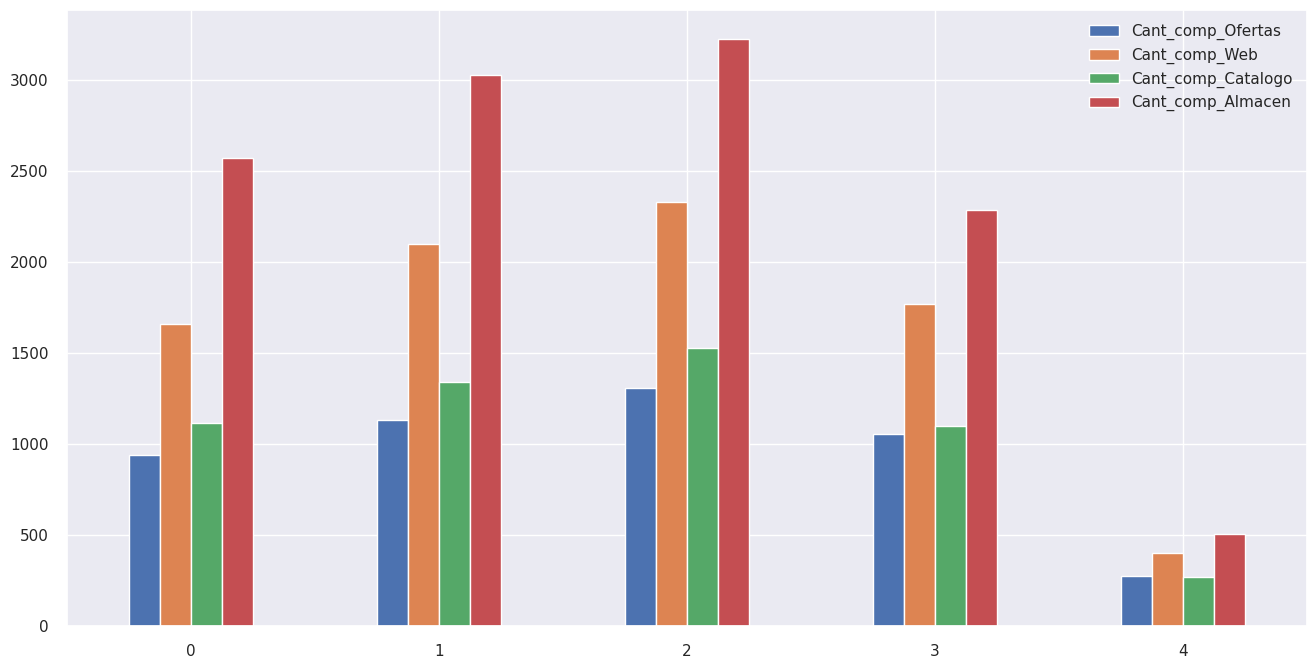

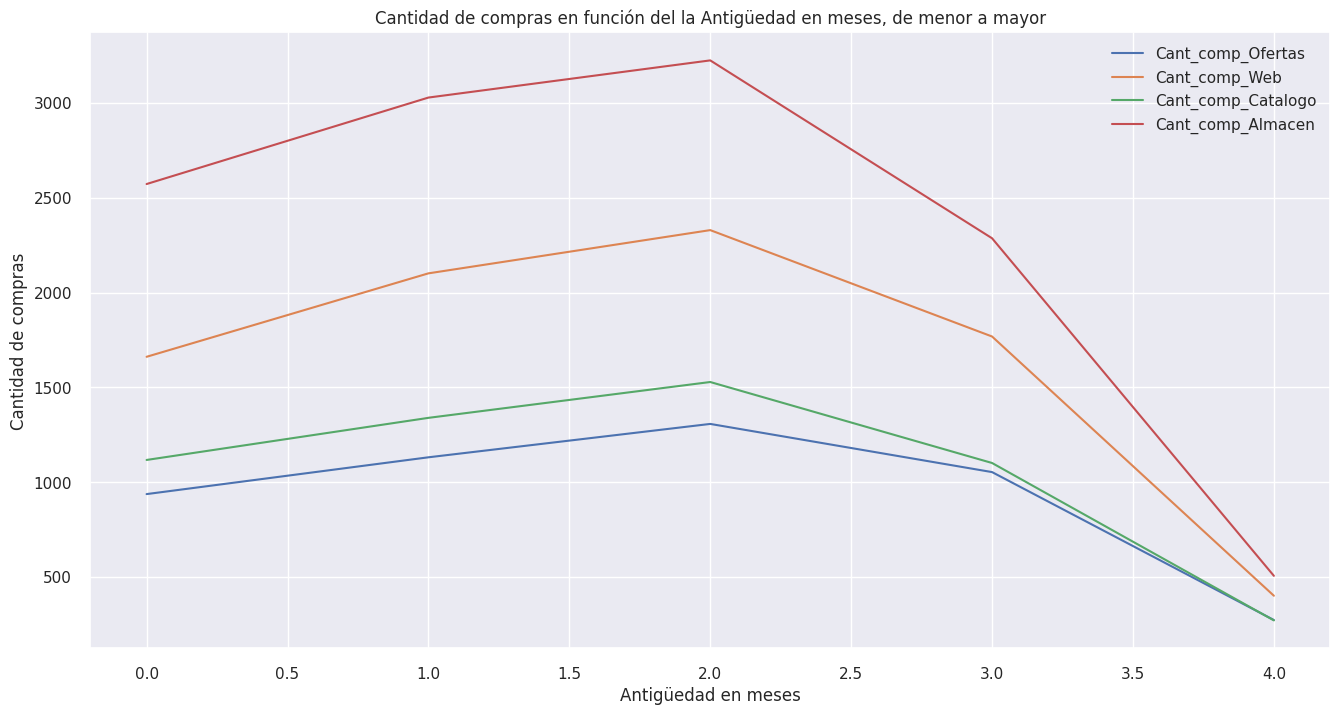

In [ ]:
# Generar el gráfico de barras
plt.figure(figsize=(10,4))
agrupados_anti1.plot.bar()
# Girar 0 grados el label del eje x
plt.xticks(rotation=0)
agrupados_anti1.plot.line()
plt.xlabel('Antigüedad en meses')
plt.ylabel('Cantidad de compras')
plt.title('Cantidad de compras en función del la Antigüedad en meses, de menor a mayor')
# Girar 0 grados el label del eje x
plt.xticks(rotation=0)
plt.show()

Para interpretar este gráfico, vemos las cantidades de compras de los clientes en función de su antigüedad, notamos que a medida que aumenta su antigüedad aumentas sus compras, pero al llegar al rango de los 13 a 15 meses de antigüedad, disminuyen las cantidades de compras.

## 💈# <font color='cyan'>**Total de compras en función del lugar donde se realiza**

In [ ]:
# Agrupar los datos por Fecha y sumar la cantidad de compras
agrupados_fecha = dfa1.groupby('Fecha_ultima_compra')['Cant_comp_Almacen','Cant_comp_Web','Cant_comp_Catalogo','Cant_comp_Ofertas'].sum()
# Ordenar los datos de mayor a menor
agrupados_fecha = agrupados_fecha.sort_values('Cant_comp_Almacen', ascending=True)
agrupados_fecha=agrupados_fecha.T
warnings.filterwarnings("ignore")
agrupados_fecha

Fecha_ultima_compra  2014-06-29
Cant_comp_Almacen         11749
Cant_comp_Web              8337
Cant_comp_Catalogo         5413
Cant_comp_Ofertas          4735

<Figure size 1000x400 with 0 Axes>

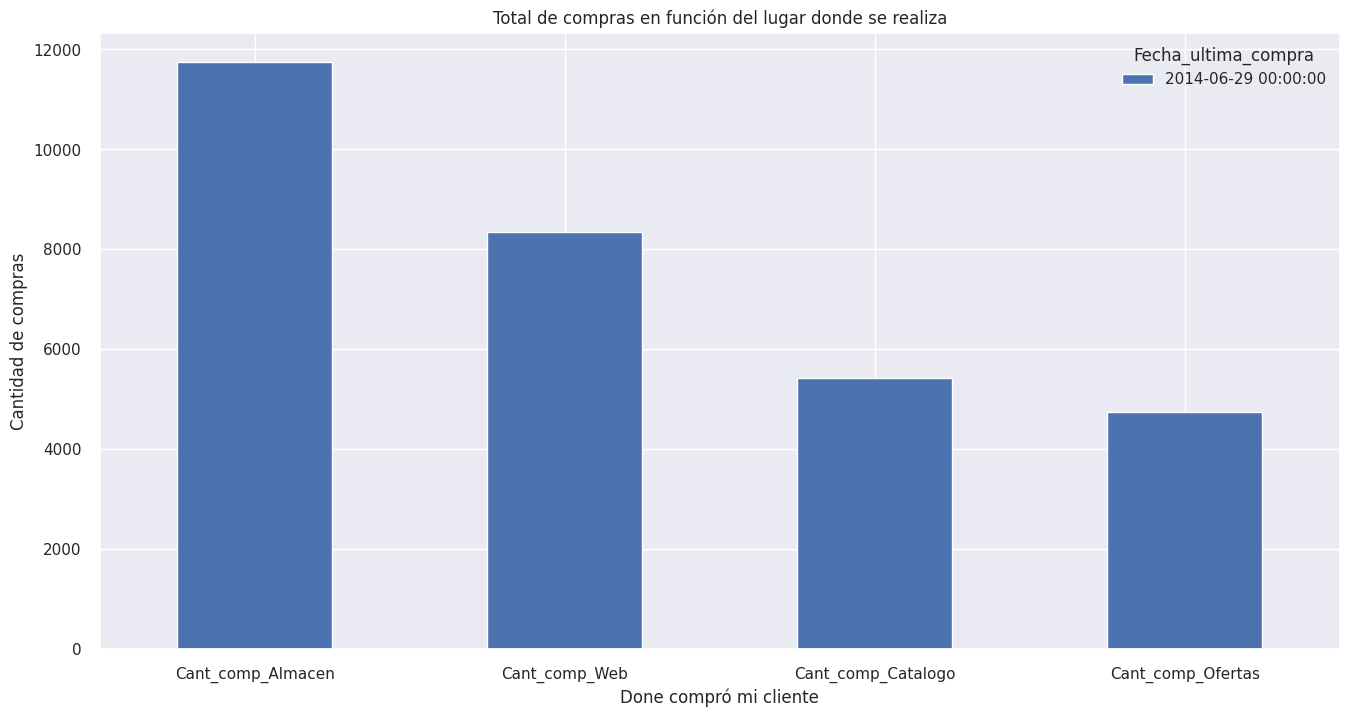

In [ ]:
# Generar el gráfico de barras
plt.figure(figsize=(10,4))
agrupados_fecha.plot.bar()
plt.xlabel('Done compró mi cliente')
plt.ylabel('Cantidad de compras')
plt.title('Total de compras en función del lugar donde se realiza')
# Girar 0 grados el label del eje x
plt.xticks(rotation=0)
plt.show()

Podemos ver en esta gráfica el total de compras en función del lugar donde se realizó, la mayoría de los clientes compran en almacén, luego sigue las compras web, después por catálogo y por último las compras de ofertas.

In [ ]:
df1.mean(numeric_only=True).round(2) #promedio

Fecha_Nacim           1969
Ingreso_Anual        52682
Adolescente              1
Dias_Ulti_Comp          49
Gastos_Vinos           304
Gastos_Frutas           26
Gastos_Carne           168
Gastos_Pescados         38
Gastos_Dulces           27
Gastos_Joyas            44
Cant_comp_Ofertas        2
Cant_comp_Web            4
Cant_comp_Catalogo       3
Cant_comp_Almacen        6
Num_Visitas_Web          5
Gastos_Totales         606
Antigüedad             351
dtype: float64

In [ ]:
df1.std(numeric_only=True).round(2)  #desviacion estandar

Fecha_Nacim             12
Ingreso_Anual        28948
Adolescente              1
Dias_Ulti_Comp          29
Gastos_Vinos           336
Gastos_Frutas           40
Gastos_Carne           228
Gastos_Pescados         55
Gastos_Dulces           42
Gastos_Joyas            52
Cant_comp_Ofertas        2
Cant_comp_Web            3
Cant_comp_Catalogo       3
Cant_comp_Almacen        3
Num_Visitas_Web          2
Gastos_Totales         602
Antigüedad             232
dtype: float64

Cuando la mediana y la media son bastante diferentes una de la otra, es probable que existan outliers que modificaron la media.

Observando los resultados del método .describe() la variable "Ingreso_anual" tienen diferencias de más de una unidad entre la media y la mediana, lo cual puede sugerir outliers. 

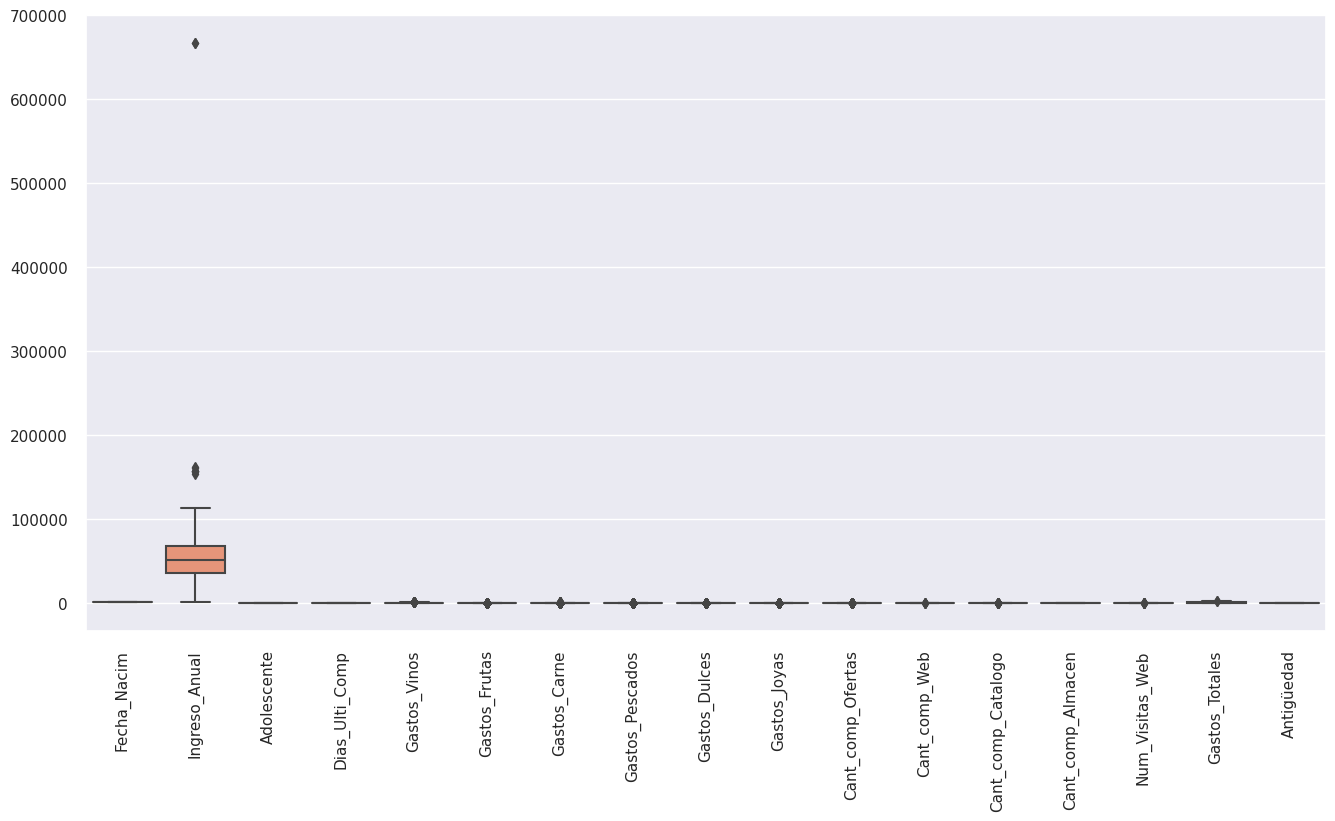

In [ ]:
ax=sns.boxplot(data=df1.loc[:,df1.dtypes!='object'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Observando los resultados en el anterior diagrama de caja y bigotes podemos ver que la variable "Ingreso_anual" tiene varios Outliers.


Seleccionamos los ingresoa menores a 80.000  Esto es muy importante, porque al hacer foco específicamente en la variable 'ingreso_anual', nos deja un aporte muy util para el momento de tener que ingresar esos datos al modelado. 


## 💈# <font color='cyan'>#**Eliminamos los valores atípicos superiores a 80.000**

In [ ]:
df2=df1.loc[df1.Ingreso_Anual>80000]
df2.head()

Fecha_Nacim         Edad      Educacion Estado_Civil  Ingreso_Anual  \
3          1959  Desde 56-75         Master       Pareja          82576   
14         1982  Desde 36-55     Secundario       Casado         160803   
28         1966  Desde 56-75  Universitario      Soltero          86358   
59         1978  Desde 36-55         Master       Casado          88097   
64         1961  Desde 56-75  Universitario      Soltero          82014   

        Niños  Adolescente Fecha_ingreso  Dias_Ulti_Comp  Gastos_Vinos  ...  \
3   Sin hijos            0    2012-01-08              66          1206  ...   
14  Sin hijos            0    2012-04-08              21            55  ...   
28    Un hijo            1    2012-08-08              78           957  ...   
59    Un hijo            0    2012-08-18              24           163  ...   
64  Sin hijos            0    2012-08-20              48           980  ...   

    Gastos_Joyas  Cant_comp_Ofertas  Cant_comp_Web  Cant_comp_Catalogo  \
3             18                  1              2                   4   
14             4                 15              0                  28   
28            95                  4              5                   3   
59            75                  1              6                   5   
64            31                  1              3                   6   

    Cant_comp_Almacen  Num_Visitas_Web  Gastos_Totales  Antigüedad  \
3                  12                1            1910         903   
14                  1                0            1717         812   
28                  6                8            1722         690   
59                  8                9             844         680   
64                 12                6            1511         678   

    Fecha_ultima_compra  Antigüedad_mes  
3            2014-06-29       Más de 25  
14           2014-06-29       Más de 25  
28           2014-06-29      De 16 a 24  
59           2014-06-29      De 16 a 24  
64           2014-06-29      De 16 a 24  

[5 rows x 24 columns]

Tenemos alrededor de 199 valores atípicos, podemos eliminar estos valores atípicos directamente de nuestro conjunto de datos si queremos, o completar estos valores atípicos con otros valores. Estos 199 valores atípicos corresponden al 9,86 % de nuestro conjunto de datos. Teniendo en cuenta esto eliminaré estos valores atípicos de nuestros datos.

In [ ]:
df3=df1.loc[df1.Ingreso_Anual<80000] 

Verificamos con este gráfico que no tenemos ahora valores atípicos.

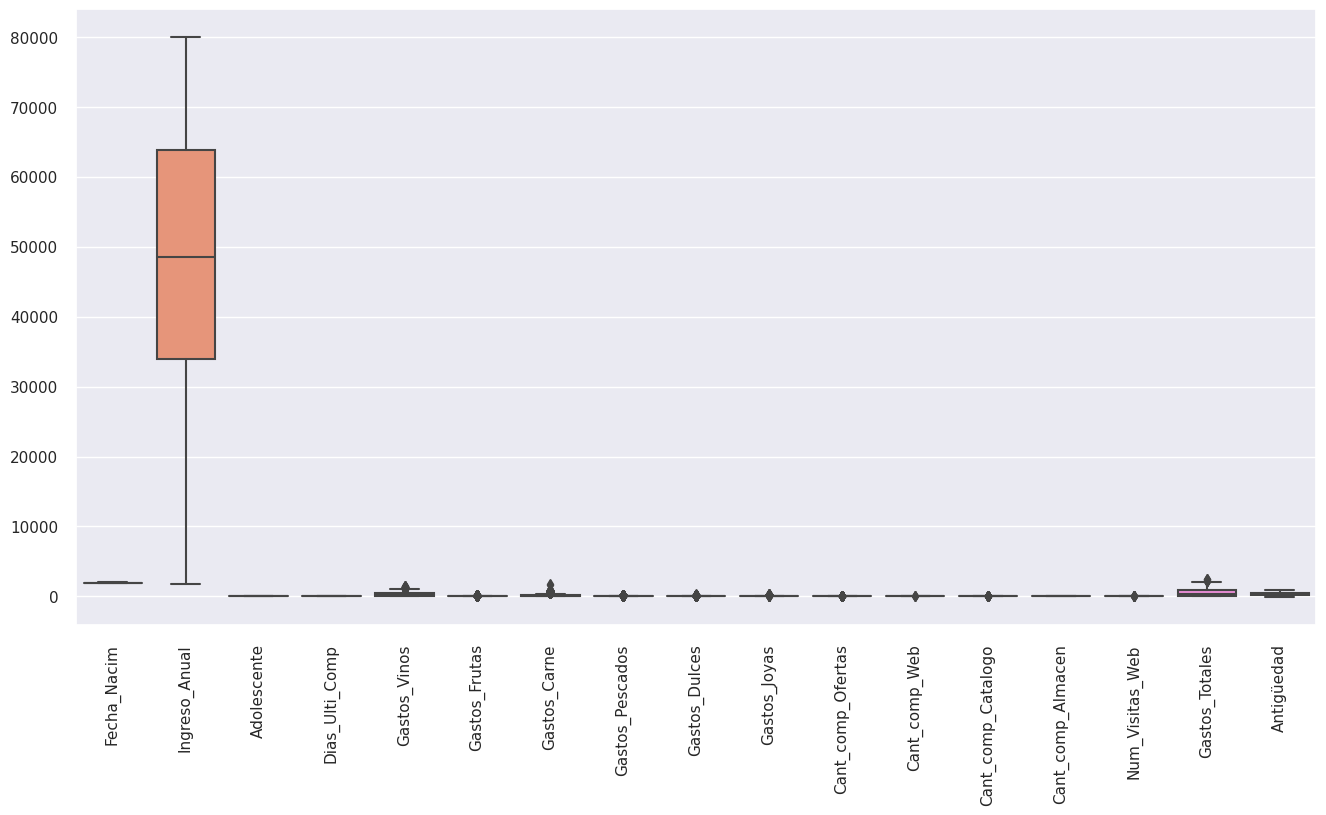

In [ ]:
ax=sns.boxplot(data=df3.loc[:,df3.dtypes!='object'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

En esta gráfica vemos un distribución de los ingresos anuales sin los valores atípicos

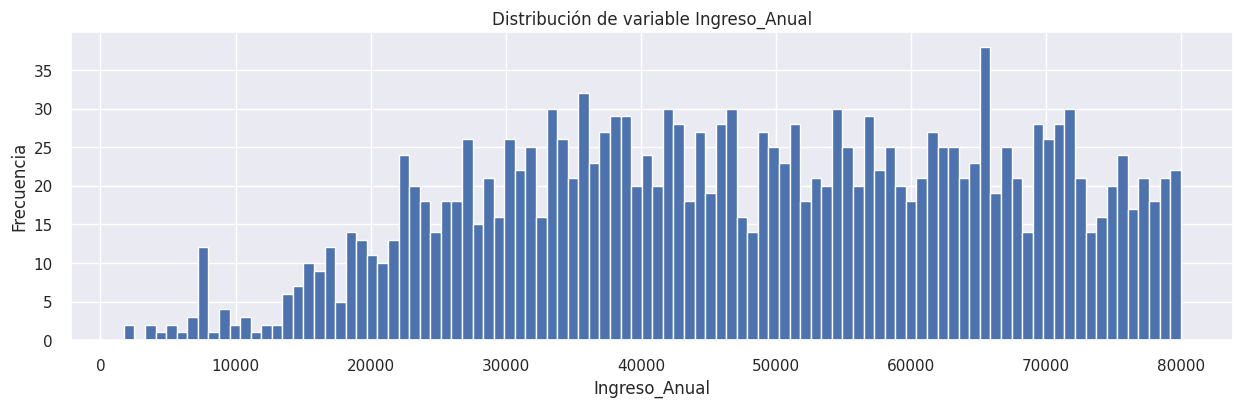

In [ ]:
plt.figure(figsize = (15,4))
plt.hist(df3["Ingreso_Anual"], bins = 100)
plt.xlabel("Ingreso_Anual")
plt.ylabel("Frecuencia")
plt.title("Distribución de variable Ingreso_Anual")
plt.show()

Vamos a estimar el ingreso anual promedio de los clientes

**Estas líneas de código calculan el intervalo de confianza del 95% para la media de la variable 'Ingreso_Anual' en el DataFrame df3.**

In [ ]:
len(df3.Ingreso_Anual)
m = df3.Ingreso_Anual.mean() #promedio
s = df3.Ingreso_Anual.std() #desviacion estandar 
n=len(df3.Ingreso_Anual) #tamaño de la muestra

valor_critico=-1.96

(m-1.96*s/np.sqrt(n), m+1.96*s/np.sqrt(n)) # Intervalo

(47329.06966784189, 49010.37198973718)

Queremos estimar el ingreso anual promedio de los clientes, con un 95% de confianza, es decir, quiero ver los rangos entre donde se mueven los saldos promedios de los clientes con un 95% de probabilidad.

Entonces con un 95% de probabilidad los ingresos anuales promedio de los clientes estarán entre 47266.77 y 48865.01 USD.

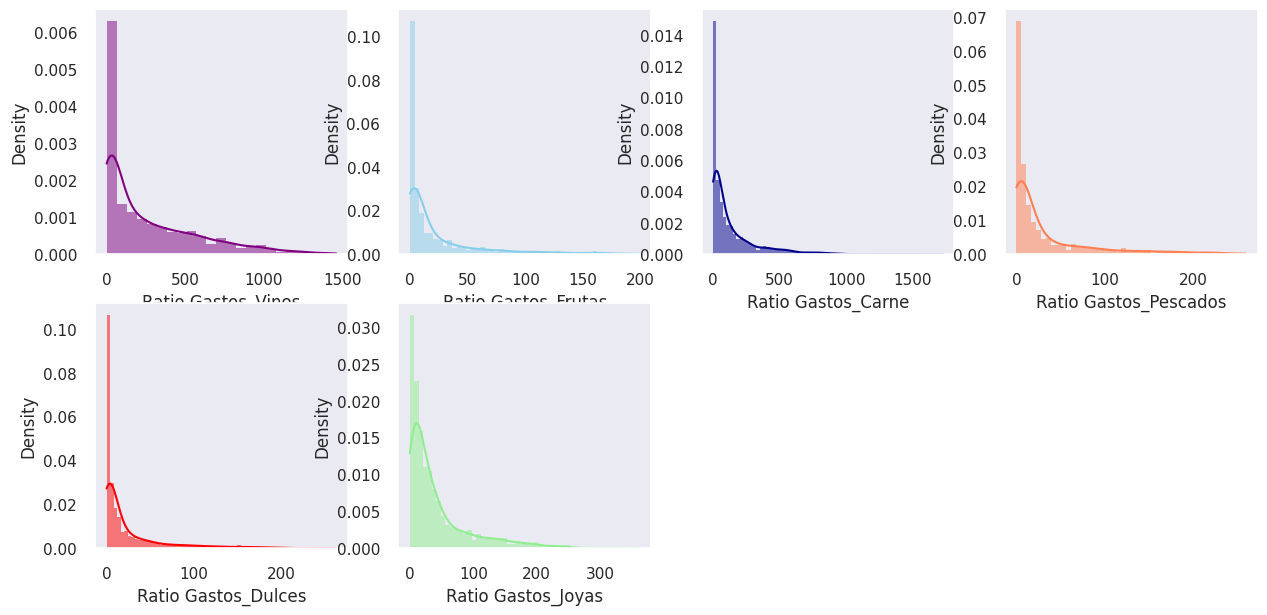

In [ ]:
# Veamos la distribución de los gastos de mi clientes ~ Entendiendo al Ratio como la relacion (ó proporcion)

plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.histplot(df3['Gastos_Vinos'], color = "purple", kde=True, stat="density", linewidth=0)
plt.xlabel('Ratio Gastos_Vinos', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 2)
sns.histplot(df3['Gastos_Frutas'], color = "skyblue", kde=True, stat="density", linewidth=0)
plt.xlabel('Ratio Gastos_Frutas', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.histplot(df3['Gastos_Carne'], color = "darkblue", kde=True, stat="density", linewidth=0)
plt.xlabel('Ratio Gastos_Carne', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.histplot(df3['Gastos_Pescados'], color = "coral", kde=True, stat="density", linewidth=0)
plt.xlabel('Ratio Gastos_Pescados', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.histplot(df3['Gastos_Dulces'], color = "red", kde=True, stat="density", linewidth=0)
plt.xlabel('Ratio Gastos_Dulces', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.histplot(df3['Gastos_Joyas'], color = "lightgreen", kde=True, stat="density", linewidth=0)
plt.xlabel('Ratio Gastos_Joyas', fontsize = 12)    
plt.grid()

## 💈# <font color='cyan'>Vemos la correlacion de las columnas de mi dataframe en un gráfico

El mapa de calor permite visualizar las correlaciones entre las variables del DataFrame de forma rápida y sencilla, facilitando la identificación de patrones y relaciones entre las variables.

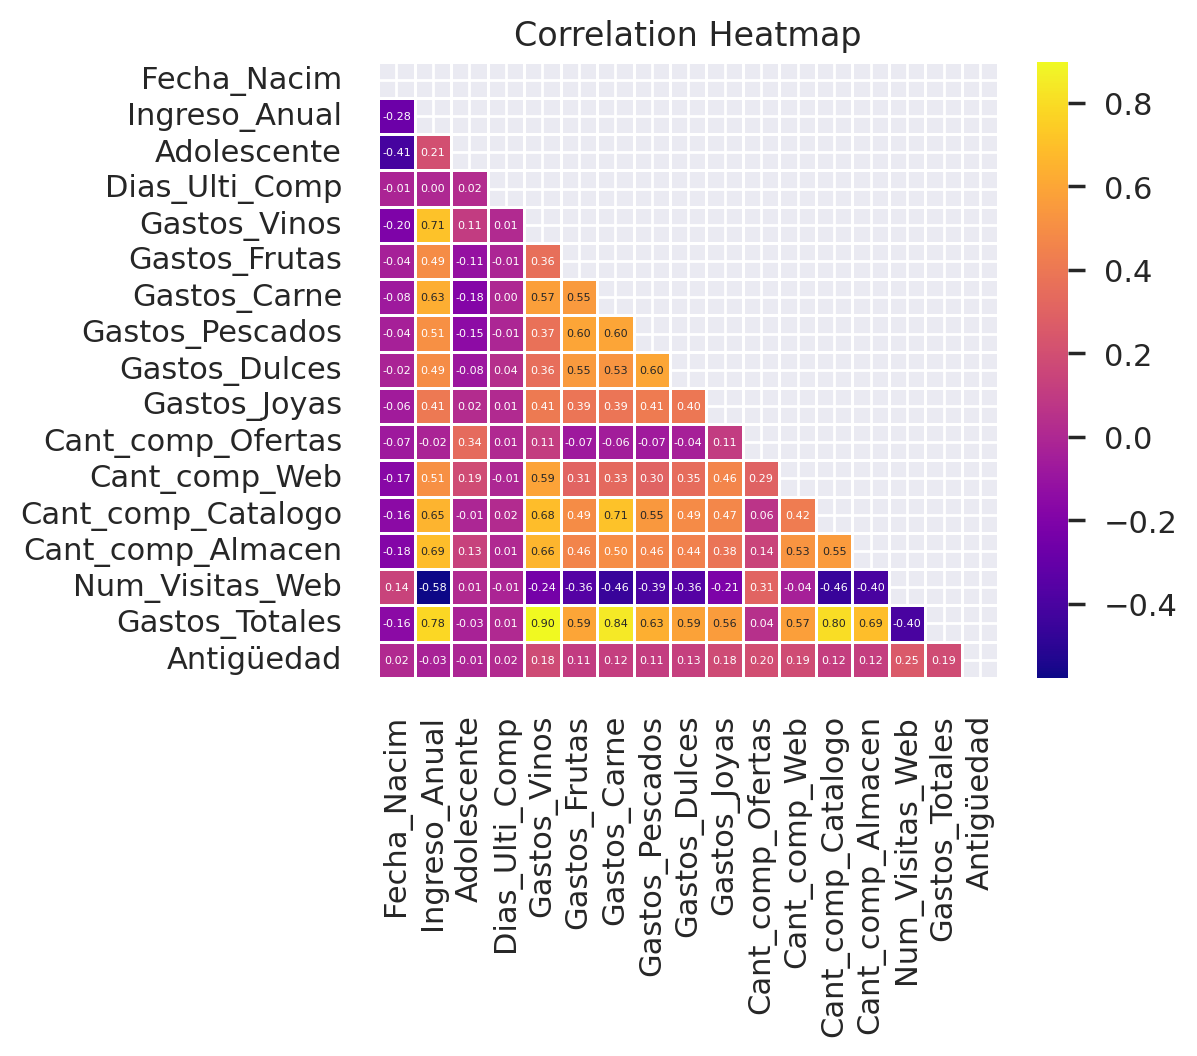

In [ ]:
#Correlaciones
plt.figure(dpi = 200,figsize= (5,4))
mask = np.triu(np.ones_like(df3.corr(),dtype = bool))
sns.heatmap(df3.corr(),mask = mask, fmt = ".2f",annot=True,lw=0.5,cmap = 'plasma',annot_kws={'fontsize': 4})
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Con esta gráfica puedo ver si hay una correlacion entre columnas tomadas como numericas por Python, podemos ver que hay una correlacion alta en las columnas Gastos_vinos, Gastos_Carne, Cant_catalogo_comp y Ingreso_anual 

# <font color='cyan'>**Preprocesamiento de Datos** ⏳

<font color='magenta'> **Feature Engineering: Escalamiento** </font>
****

**En esta etapa, prepararemos los datos para que podamos usarlos en nuestro algoritmo de aprendizaje No Supervisado.**

<font color='magenta'> **Método de Standard Scaler** </font>

A cada dato se le resta la media de la variable y el resultado se divide entre la desviacion estandar de la variable.

Formula: 
 $ \displaystyle\frac{X - media}{desviacionEstandar}$

Al final, la idea es que la media de la distribucion escalada de cada variable quede alrededor de 0 y la desviacion estandar alrededor de 1.

In [ ]:
#from sklearn.preprocessing import StandardScaler

scaler2=StandardScaler()

ej_data_escalada=scaler2.fit_transform(df3[['Gastos_Carne', 'Cant_comp_Almacen', 'Gastos_Vinos']])

df3_scaled=pd.DataFrame(ej_data_escalada,columns=['Gastos_Carne', 'Cant_comp_Almacen', 'Gastos_Vinos'],index=df3.index)
df3_scaled.head()

Gastos_Carne  Cant_comp_Almacen  Gastos_Vinos
0            -0                 -0             0
1             1                  2             1
2            -1                 -1            -1
4            -1                 -1            -1
5             1                  0             2

In [ ]:
#antes de standard scaler
df3[['Gastos_Carne', 'Cant_comp_Almacen', 'Gastos_Vinos']].describe().round(2)

Gastos_Carne  Cant_comp_Almacen  Gastos_Vinos
count          1834               1834          1834
mean            130                  6           264
std             182                  3           308
min               0                  0             0
25%              14                  3            20
50%              52                  4           138
75%             169                  8           425
max            1725                 13          1462

In [ ]:
#despues de standard scaler
df3_scaled.describe().round(2)

Gastos_Carne  Cant_comp_Almacen  Gastos_Vinos
count          1834               1834          1834
mean             -0                 -0            -0
std               1                  1             1
min              -1                 -2            -1
25%              -1                 -1            -1
50%              -0                 -0            -0
75%               0                  1             1
max               9                  2             4

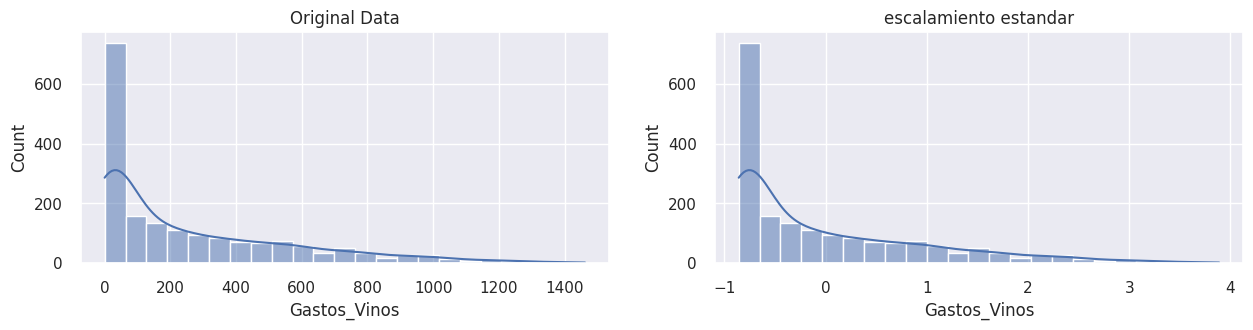

In [ ]:
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df3['Gastos_Vinos'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(df3_scaled['Gastos_Vinos'], ax=ax[1], kde=True, legend=False)
ax[1].set_title("escalamiento estandar")
plt.show()

**<font color='magenta'>Método de escalado mínimo-máximo:</font>**

* X es un dato puntual de la variable.
* Xmin: valor minimo de toda la variable.
* Xmax: valor maximo de toda la variable

Formula: 
 $ \displaystyle\frac{X - Xmin}{Xmax-Xmin}$

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()

df_minmax=scaler.fit_transform(df3[['Gastos_Carne', 'Cant_comp_Almacen', 'Gastos_Vinos']])
df_minmax=pd.DataFrame(df_minmax, columns=['Gastos_Carne', 'Cant_comp_Almacen', 'Gastos_Vinos'],index=df3.index)
df_minmax.describe()

Gastos_Carne  Cant_comp_Almacen  Gastos_Vinos
count          1834               1834          1834
mean              0                  0             0
std               0                  0             0
min               0                  0             0
25%               0                  0             0
50%               0                  0             0
75%               0                  1             0
max               1                  1             1

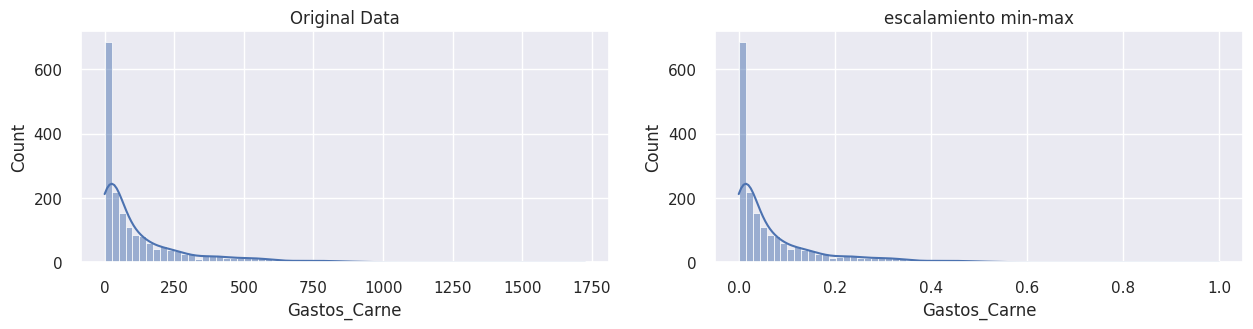

In [ ]:
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df3['Gastos_Carne'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(df_minmax['Gastos_Carne'], ax=ax[1], kde=True, legend=False)
ax[1].set_title("escalamiento min-max")
plt.show()

# <font color='cyan'><font color='cyan'> **Selección del algoritmo apropiado: Clustering** ⛵

###⚡<font color='cyan'>GMM (Modelo de Mezcla Gaussiana) 

Es un modelo probabilístico que supone que todos los puntos de datos se generan a partir de una mezcla de un número finito de distribuciones gaussianas con parámetros desconocidos.

 En otras palabras, representa una distribución compuesta en la que se extraen puntos de una de varias distribuciones gaussianas, cada una con su propia probabilidad.

Para echar un vistazo a la agrupación de clientes en el conjunto de datos, definiré los segmentos de los clientes. Aquí usaremos 4 segmentos de clientes igualmente ponderados:



**Excelentes:**
                      Clientes antiguos con altos ingresos y naturaleza de alto gasto.


**Nuevos:** 
                  Nuevos clientes con ingresos por debajo del promedio y naturaleza de bajo gasto. 


**Potencial:**
                  Nuevos clientes con altos ingresos y alto nivel de gasto.

**Buenos:** 
                  clientes antiguos con ingresos por debajo del promedio y una naturaleza de bajo gasto.

En la siguiente sección de código, primero normalizaré los datos y luego crearé una agrupación de clientes de acuerdo con las métricas definidas anteriormente:

In [ ]:
scaler=StandardScaler()
dataset_temp=df3[['Ingreso_Anual','Cant_comp_Almacen','Gastos_Totales']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')

gmm=GaussianMixture(n_components=4, covariance_type='spherical',max_iter=2000, random_state=5).fit(X)
labels = gmm.predict(X)
dataset_temp['Cluster'] = labels
dataset_temp=dataset_temp.replace({0:'Excelentes',1:'Nuevos',2:'Potencial',3:'Bueno'})
df3=df3.merge(dataset_temp.Cluster, left_index=True, right_index=True)

pd.options.display.float_format = "{:.0f}".format
summary=df3[['Ingreso_Anual','Cant_comp_Almacen','Gastos_Totales','Cluster']]
summary.set_index("Cluster", inplace = True)
summary=summary.groupby('Cluster').describe().transpose()
summary.head()

Cluster              Bueno  Excelentes  Nuevos  Potencial
Ingreso_Anual count    251         468     700        415
              mean   69484       63826   29323      49413
              std     7305        8680    9055       9135
              min    48948       42000    1730       2447
              25%    64506       57262   23261      44392

In [ ]:
PLOT = go.Figure()
for C in list(df3.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = df3[df3.Cluster == C]['Ingreso_Anual'],
                                y = df3[df3.Cluster == C]['Cant_comp_Almacen'],
                                z = df3[df3.Cluster == C]['Gastos_Totales'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Ingreso_Anual: %{x} <br>Cant_Com_Almacen: %{y} <br>Gastos_Totales: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Ingreso_Anual', titlefont_color = 'black'),
                                yaxis=dict(title = 'Cant_comp_Almacen', titlefont_color = 'black'),
                                zaxis=dict(title = 'Gastos_Totales', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

**En este gráfico 3D, podemos observar los 4 clúster de clientes.**


---



**¿Segun los Cluster definidos de mi cliente, cuál es el que más compras hace en el almacén?**

A continuación tenenos dos gráficas: una que relaciona los cluster con la cantidad de compras en el almacén y la otra un histograma que relaciona las cantidad de compras con los cluster de mi clientes.

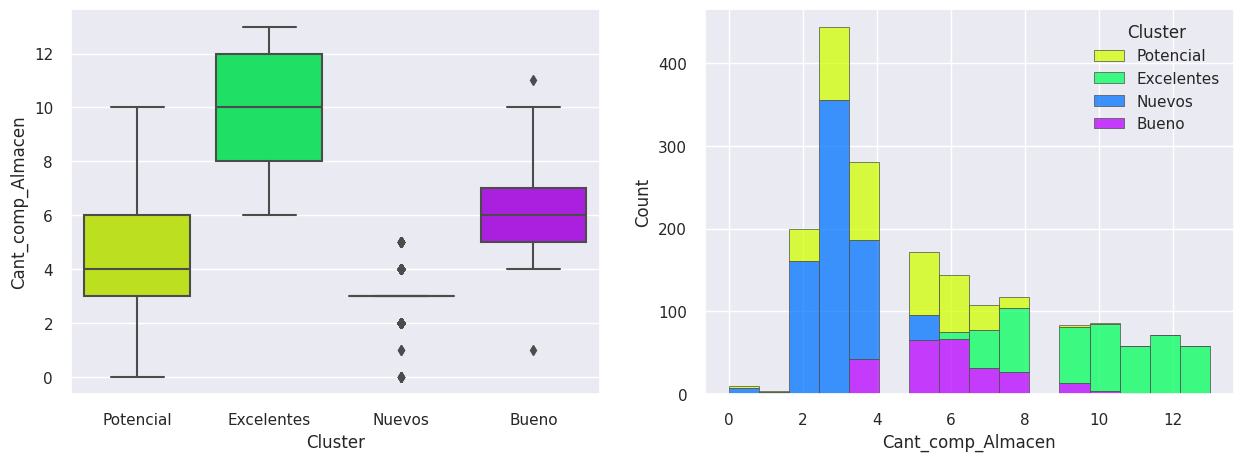

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Cluster", y = "Cant_comp_Almacen", palette = "hsv", data = df3, ax = ax[0])
sns.histplot(df3, x = "Cant_comp_Almacen", hue = "Cluster", multiple = "stack", palette = "hsv", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

**En esta gráfica podemos confirmar que los clientes del cluster Excelente, son los que más compras hacen en el Almacén**

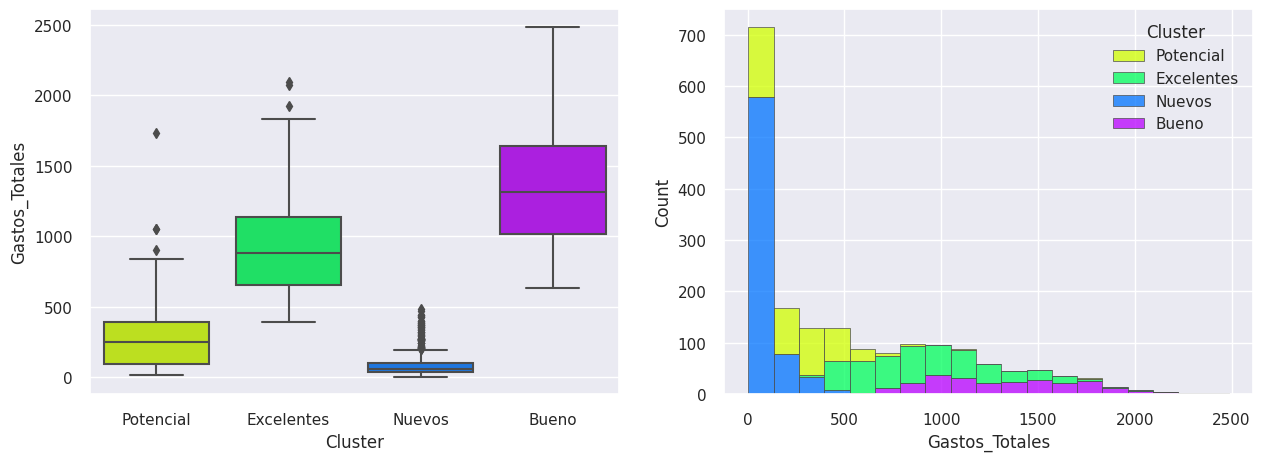

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Cluster", y = "Gastos_Totales", palette = "hsv", data = df3, ax = ax[0])
sns.histplot(df3, x = "Gastos_Totales", hue = "Cluster", multiple = "stack", palette = "hsv", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

**En esta gráfica podemos confirmar que los clientes del cluster Bueno, son los que más gastan en el Almacén**

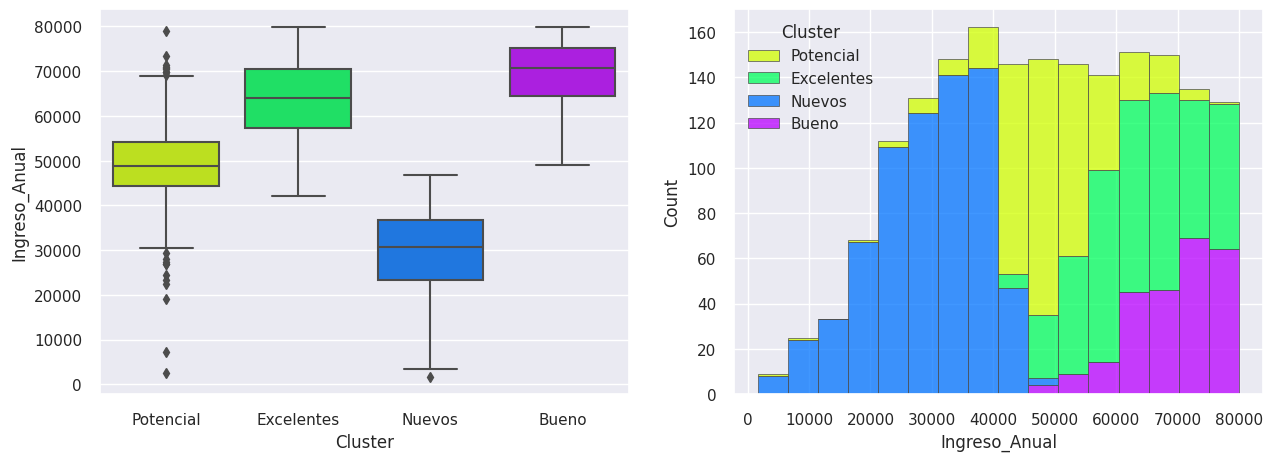

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Cluster", y = "Ingreso_Anual", palette = "hsv", data = df3, ax = ax[0])
sns.histplot(df3, x = "Ingreso_Anual", hue = "Cluster", multiple = "stack", palette = "hsv", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

**En esta gráfica podemos confirmar que los clientes del cluster Buenos y Excelente, son los que más ingresos anuales tienen**



---



###⚡<font color='cyan'>**PCA (Análisis de Componentes Principales)**

 **Aplicamos la técnica PCA a nuestro conjunto de datos y reducimos el número de dimensiones para poder visualizarlo después de entrenar nuestro conjunto de datos.** 

PCA por sus siglas en inglés (Principal Component Analysis), es una técnica de análisis de datos utilizada para reducir la dimensionalidad de un conjunto de datos complejo. El objetivo del PCA es encontrar un conjunto de nuevas variables llamadas "componentes principales" que expliquen la mayor cantidad posible de la variabilidad en los datos originales.

In [ ]:
#from sklearn.decomposition import PCA

pca = PCA(n_components = 2, whiten= True)

pca.fit(df3_scaled)

data_pca = pca.transform(df3_scaled)

print("tasa de variaciónı: ", pca.explained_variance_ratio_)

print("total: ",sum(pca.explained_variance_ratio_))

tasa de variaciónı:  [0.71831537 0.17166958]
total:  0.8899849506834746


In [ ]:
data_pca

array([[-0.11528212, -0.15774303],
       [ 1.20779186, -0.89112816],
       [-1.02698871,  0.37856998],
       ...,
       [ 0.67956831,  0.23974308],
       [ 0.23367652, -1.11767779],
       [-0.8747662 ,  0.11249695]])

### ⚡ <font color='cyan'><font color='cyan'> $k$-means 
**Es un algoritmo de clustering que particiona los datos en k grupos o clusters en función de la distancia entre los puntos y el centroide de cada grupo. Scikit-learn es una de las librerías más utilizadas para implementar K-Means en Python.**																							
###   Seleccionar el valor optimo de $k$ 

<font color='cyan'>**Utilizamos el método del codo**

<center>
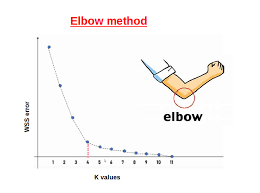
</center>


En primer lugar, en el algoritmo de Kmeans, debe haber un valor óptimo de K (cluster = cluster). Este valor K representa nuestro número de clúster. Hay diferentes métodos para encontrar este valor de K, pero intentaremos encontrar el número óptimo de grupos probando diferentes valores de K.

Para ello, primero configuramos un bucle for que toma valores entre 1 y 15. Cada valor aquí irá a su vez al parámetro ncluster en nuestro algoritmo KMeans. Luego, con la función de **inercia**, devolveremos el valor WCSS de cada valor de K y haremos una gráfica de estos valores. Luego tomaremos el punto del codo como el número óptimo de agrupaciones.

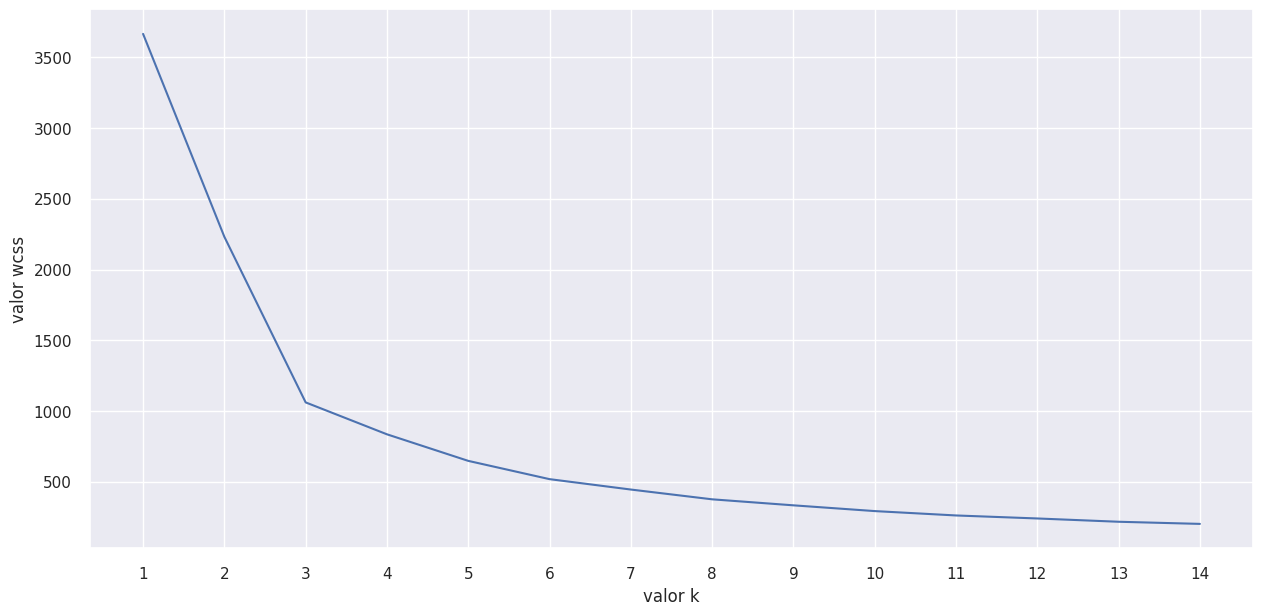

In [ ]:
#from sklearn.cluster import KMeans
warnings.filterwarnings("ignore") # uso esta linea para mostrar gráfica sin mensajes
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.xlabel("valor k")
plt.xticks(range(1,15,1))
plt.ylabel("valor wcss")
plt.show()


Como puede ver en el gráfico, sería más preciso tomar el valor K óptimo (punto del codo) como 3 para nuestro algoritmo Kmeans.

<font color='cyan'>**Otro método gráfico para guiar más nuestra decisión analizamos el Score de Silhouette**

In [ ]:
kmeans2 = KMeans(n_clusters=3)

clusters = kmeans2.fit_predict(data_pca)
clusters

array([0, 1, 0, ..., 1, 1, 0], dtype=int32)

In [ ]:
score = metrics.silhouette_score(data_pca, kmeans2.labels_, metric='euclidean')
print('Silhouette Score promedio: %.2f' % score)  #no es muy alto, como se veria en comparacion con diferentes k (numero de clusters)?

Silhouette Score promedio: 0.60


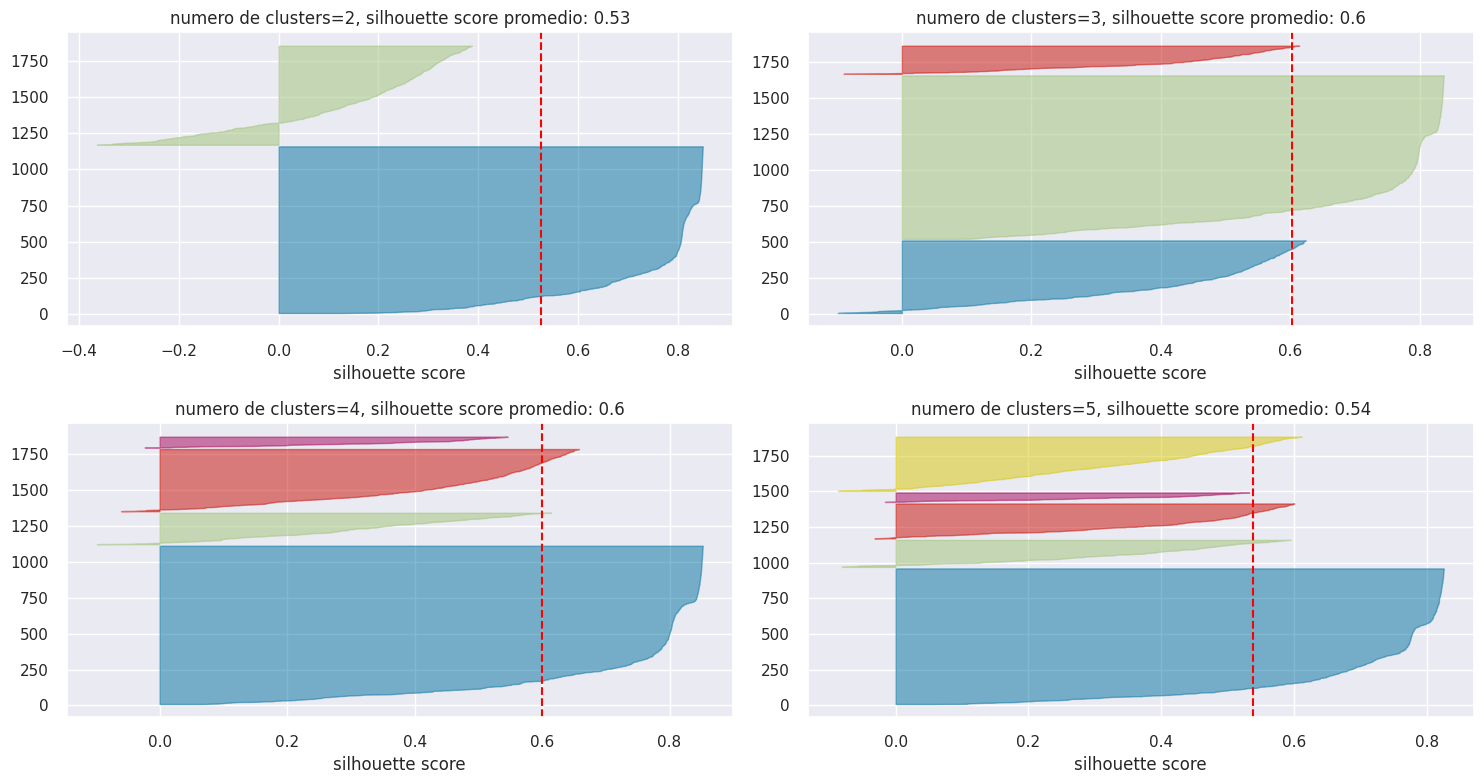

In [ ]:
#from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]: #clusters a evaluar

    km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42) #entrenamiento
    labels=km.fit_predict(data_pca)
    score=metrics.silhouette_score(data_pca, labels, metric='euclidean')

    eje1, eje2 = divmod(i, 2) #organizacion en ejes de las graficas
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[eje1-1][eje2])

    visualizer.fit(data_pca) 
    
    ax[eje1-1][eje2].set_title(f'numero de clusters={i}, silhouette score promedio: {round(score,2)}')
    ax[eje1-1][eje2].set_xlabel("silhouette score")
    plt.tight_layout()

**Analisis de los graficos:**

**Buscamos que los clusters esten por encima de la linea roja punteada. El grosor del diagrama de silueta que representa cada cluster también es un punto decisivo, cundo más parecidas mejor.**

<font color='magenta'> Teniendo en cuenta esto para el ejemplo anterior</font>

* No nos servirian los numeros de clusters de 2, 4 o 5
* Nos serviria un número de clusters de 3, el grosor es más uniforme que para los demas. 

<font color='cyan'>**Otro método gráfico para guiar más nuestra decisión analizamos el Calinski-Harabasz Index**

El índice de Calinski-Harabasz se basa en la idea de que los clusters que son: 
* muy compactos
* bien espaciados entre sí
son buenos. 

La intuicion de la formula es un poco de la siguiente manera: 

``` (a . separacion)/(b . cohesion)```

donde a y b son pesos. Es decir, qué tan similar es un objeto a su propio grupo (cohesión) en comparación con otros grupos (separación).

<font color='magenta'> Cuanto mayor sea el valor del índice de Calinski-Harabasz, mejor será el modelo de agrupamiento.</font>



Aunque no existe un valor de corte "aceptable", necesitamos elegir aquella solución que dé un pico o al menos un codo abrupto en el gráfico de líneas de los índices CH.

Por otro lado, si la línea es suave (horizontal o ascendente o descendente) entonces no hay tal razón para preferir una solución sobre otras.

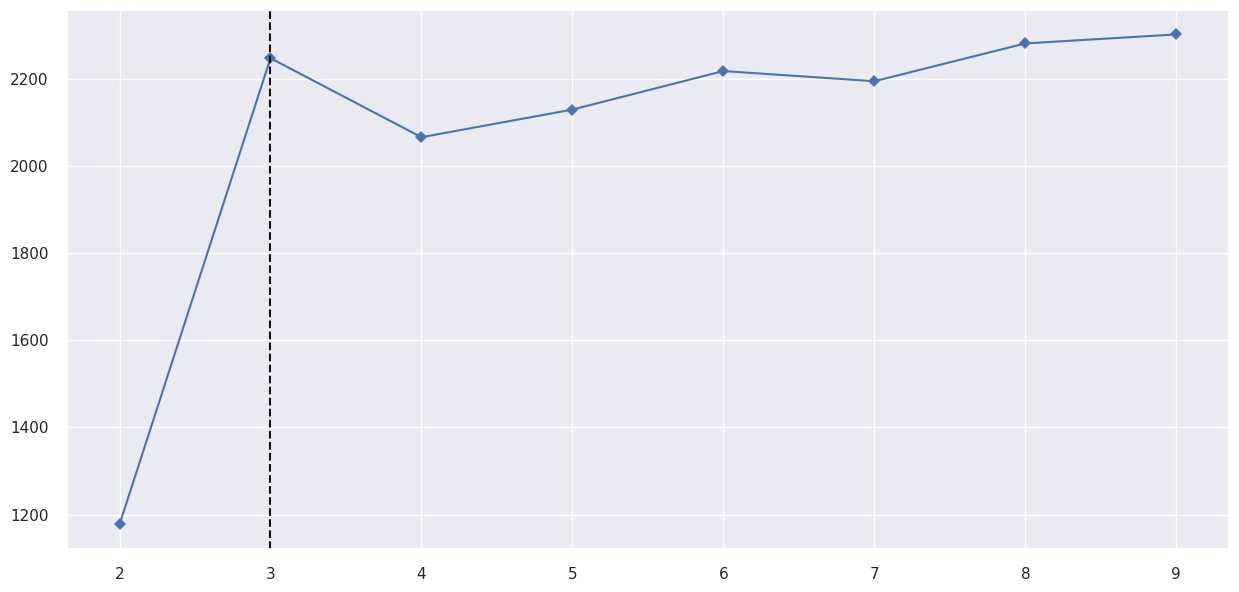

In [ ]:
#from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='calinski_harabasz',timings=False)
visualizer.fit(data_pca)        
plt.show()

Los distintos análisis coinciden que la cantidad de clúster ideal es 3 (K=3).

 Ahora ejecutemos nuestro algoritmo K-Means nuevamente con K = 3.

In [ ]:
kmeans2 = KMeans(n_clusters=3)

clusters = kmeans2.fit_predict(data_pca)
clusters

array([0, 1, 0, ..., 1, 1, 0], dtype=int32)

In [ ]:
df3['pred']=clusters
df3.head()

Fecha_Nacim         Edad      Educacion Estado_Civil  Ingreso_Anual  \
0         1970  Desde 36-55     Secundario       Casado          55158   
1         1950  Desde 56-75       Primario       Pareja          52203   
2         1976  Desde 36-55  Universitario       Casado           7500   
4         1985  Desde 36-55       Primario       Pareja           7500   
5         1957  Desde 56-75  Universitario       Casado          73803   

       Niños  Adolescente Fecha_ingreso  Dias_Ulti_Comp  Gastos_Vinos  ...  \
0    Un hijo            1    2012-07-30              72           293  ...   
1  Sin hijos            0    2012-07-31              36           488  ...   
2    Un hijo            0    2012-01-08              19             7  ...   
4    Un hijo            0    2012-01-08              98             5  ...   
5  Sin hijos            1    2012-01-08              61           833  ...   

   Cant_comp_Web  Cant_comp_Catalogo  Cant_comp_Almacen  Num_Visitas_Web  \
0              7                   2                  5                7   
1              8                   7                 11                6   
2              4                   1                  2                9   
4              2                   1                  3                9   
5              9                   5                  6                6   

   Gastos_Totales  Antigüedad  Fecha_ultima_compra  Antigüedad_mes  \
0             418         699           2014-06-29      De 16 a 24   
1             939         698           2014-06-29      De 16 a 24   
2              71         903           2014-06-29       Más de 25   
4             100         903           2014-06-29       Más de 25   
5            1528         903           2014-06-29       Más de 25   

      Cluster  pred  
0   Potencial     0  
1  Excelentes     1  
2      Nuevos     0  
4      Nuevos     0  
5       Bueno     2  

[5 rows x 26 columns]

In [ ]:
df3[['Ingreso_Anual','Gastos_Totales','pred']].groupby(['pred']).mean() #centroides

Ingreso_Anual  Gastos_Totales
pred                               
0             37761             171
1             62390             900
2             71478            1470

Ahora graficamos cómo se ven nuestros clústeres en un gráfico 2D con nuestro algoritmo Kmeans.

**Este código utiliza la librería Matplotlib para crear un gráfico de dispersión con diferentes colores para diferentes grupos/clústeres.**

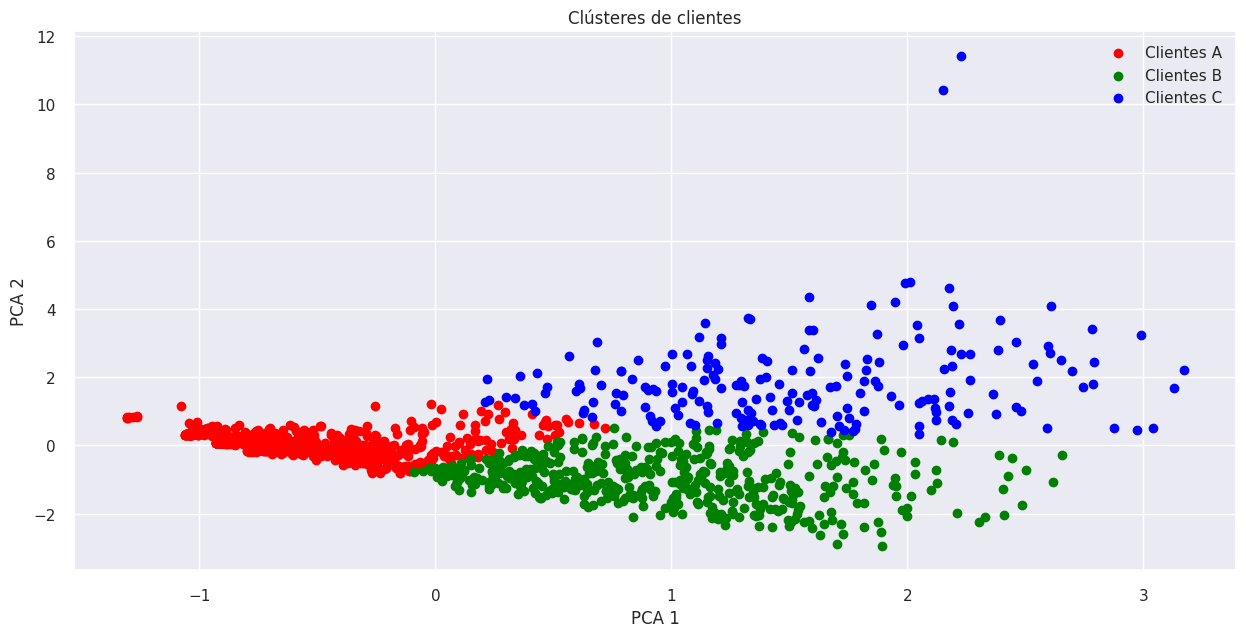

In [ ]:
plt.scatter(data_pca[clusters == 0,0], data_pca[clusters == 0,1], c = 'red', label = 'Clientes A')
plt.scatter(data_pca[clusters == 1,0], data_pca[clusters == 1,1], c = 'green', label = 'Clientes B')
plt.scatter(data_pca[clusters == 2,0], data_pca[clusters == 2,1], c = 'blue', label = 'Clientes C')
plt.title('Clústeres de clientes')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

**En este gráfico 2D, podemos observar los 3 clúster de clientes: Clientes A, B y C.**

###⚡<font color='cyan'>**DBSCAN (Density-based spatial clustering of applications with noise)**

Distancia definida (DBSCAN): utiliza una distancia especificada para separar los clústeres densos del ruido más disperso. El algoritmo DBSCAN es el método de clustering más rápido, pero solo es apropiado si se puede utilizar una Distancia de búsqueda muy clara, y funciona bien con todos los clústeres potenciales.

El algoritmo DBSCAN requiere básicamente 2 parámetros:

Épsilon (eps): especifica lo cerca que deben estar los puntos entre sí para ser considerados parte de un clúster. Esto significa que, si la distancia entre dos puntos es menor o igual a este valor de épsilon, estos puntos se consideran vecinos.

Puntos mínimos (minPts): el número mínimo de puntos para formar una región densa. Por ejemplo, si establecemos minPts como 5, entonces necesitamos al menos 5 puntos para formar una región densa.

<center>
<img src="https://live.staticflickr.com/65535/50489810617_dd98426ea1_c.jpg" height="300" />
</center>

In [ ]:
clustersD = DBSCAN(eps = 0.36, min_samples =15).fit((X_std))

In [ ]:
clustersD.labels_

array([ 0,  0,  0, ..., -1,  0,  0])

In [ ]:
set(clustersD.labels_) ## -1 representan puntos con ruido que no fueron asignados a ningun cluster

{-1, 0, 1, 2}

In [ ]:
Counter(clustersD.labels_)

Counter({0: 1465, 2: 36, 1: 88, -1: 245})

In [ ]:
df3D=df3[['Ingreso_Anual','Gastos_Totales']]

In [ ]:
df3D['clusterD']=clustersD.labels_
df3D.head()

Ingreso_Anual  Gastos_Totales  clusterD
0          55158             418         0
1          52203             939         0
2           7500              71         0
4           7500             100         0
5          73803            1528         2

In [ ]:
df3D[df3D.clusterD==-1].head() #los que selecciono como outliers

Ingreso_Anual  Gastos_Totales  clusterD
7           32632             576        -1
10          64176            1826        -1
11          62972             587        -1
24          68281            1655        -1
27          79930            1753        -1

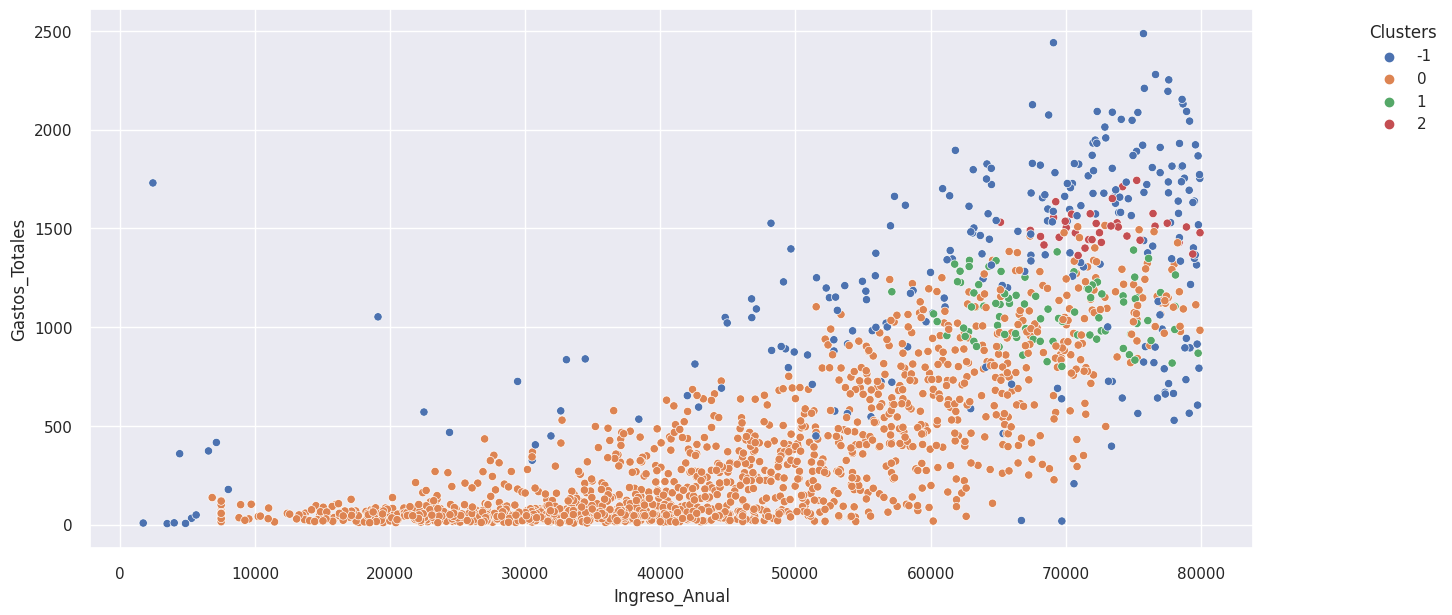

In [ ]:
p = sns.scatterplot(data = df3D, x = "Ingreso_Anual", y = "Gastos_Totales", hue = clustersD.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

 **En esta gráfica de DBSCAN podemos identificar que el grupo 2 (de color rojo) son clientes que tiene ingresos anuales altos de, 68000 a 80000 dólares anuales y que tiene gastos totales mayores a los 1400 dólares.
El grupo 1 (de color verde) tiene también altos ingresos y gastos como el grupo 2 pero un poco inferiores.**

###⚡<font color='cyan'>**HDBSCAN (Hierarchical Density-based spatial clustering of applications with noise)**

In [ ]:
#este algoritmo funciona variando bastantes niveles de epsilon (distancia desde el nucleo del cluster)

clusterer = hdbscan.HDBSCAN(min_cluster_size=27, #por default es 5, cual es la cantidad minima de puntos para que exista un cluster      
              )

In [ ]:
cluster_labels = clusterer.fit_predict(X_std)

In [ ]:
set(cluster_labels) #si tuvieramos el label -1 eso seria diagnosticado como ruido/outliers

{-1, 0, 1, 2, 3, 4}

In [ ]:
len(cluster_labels)

1834

In [ ]:
df3['clustersC']=cluster_labels

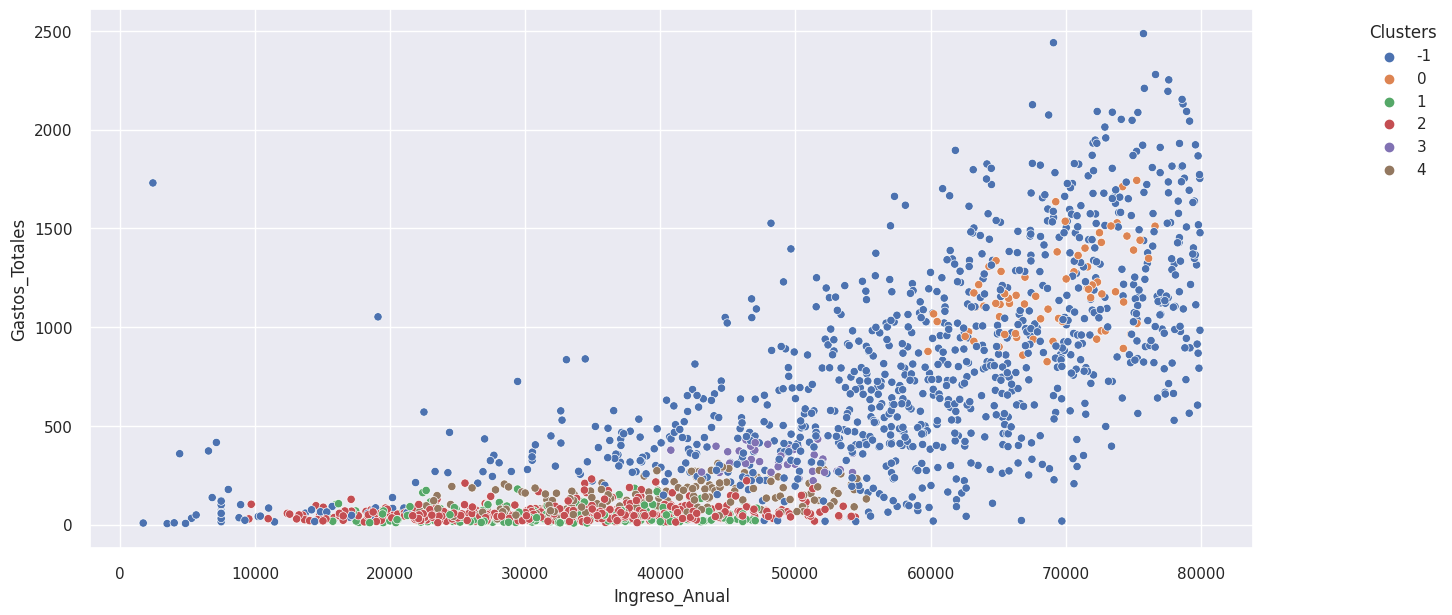

In [ ]:
#grafico para variables Ingreso_Anual y Gastos_Totales
p = sns.scatterplot(data = df3D, x ="Ingreso_Anual", y = "Gastos_Totales", hue =df3['clustersC'], legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

**En esta gráfica de HDBSCAN podemos identificar que el grupo 0 (de color naranja) son clientes que tiene ingresos anuales altos de 60000 a 75000 dólares anuales y que tiene gastos totales entre los 800 y los 1700 dólares.**

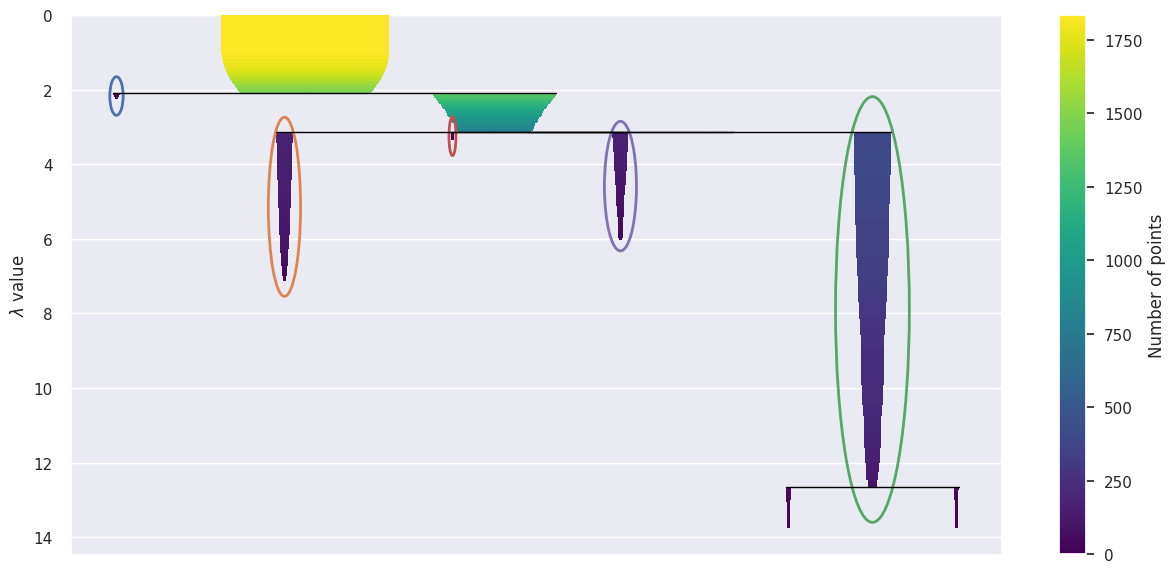

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

# <font color='cyan'><font color='cyan'> **Evaluación del algoritmo: Clustering** ⛵

##<font color='magenta'>**Coeficiente de Silhouette:**

Es una medida de cuánto se separan los clusters y cómo se superponen. Un coeficiente de silueta más cercano a 1 indica que los puntos están bien asignados a su cluster y que los clusters están bien separados. Un coeficiente de silueta más cercano a -1 indica que los puntos están mal asignados a su cluster y que los clusters se superponen.

Mide la calidad de la agrupación, es decir, cuánto se parecen los objetos en un cluster en comparación con los objetos en los otros clusters. Un valor alto de Silhouette indica que los objetos están bien agrupados, mientras que un valor bajo indica que los objetos podrían estar mejor agrupados en otro cluster.

###👽 **Vamos a evaluar el Modelo de Mezcla Gaussiana, que visualizamos anteriormente** 

In [ ]:
gmm=GaussianMixture(n_components=4, covariance_type='spherical',max_iter=2000, random_state=5).fit(X)
labels = gmm.predict(X)

In [ ]:
#from sklearn.cluster import KMeans					
#from sklearn.metrics import silhouette_score, calinski_harabasz_score					
# Carga los datos de clientes y haz el preprocesamiento necesario					
# Define el número de clusters que quieres crear					
# num_clusters = 3					
# Entrena el modelo KMeans		
# model = KMeans(n_clusters=num_clusters)					
# model.fit(X)					
# Evalúa el modelo utilizando el coeficiente de Silhouette					
silhouette_avg1 = silhouette_score(X, labels)					
print("Coeficiente de Silhouette:", silhouette_avg1)	

Coeficiente de Silhouette: 0.4353294179437556


Un valor de 0.435 para el Coeficiente de Silhouette sugiere que los datos están relativamente bien agrupados, pero con algunos problemas de separación entre los grupos. Si bien no es un valor ideal, aún puede considerarse aceptable dependiendo del contexto del análisis.

###👽 **Vamos a evaluar el modelo de k -means, que visualizamos anteriormente**

In [ ]:
kmeans2 = KMeans(n_clusters=3)

clusters = kmeans2.fit_predict(data_pca)
clusters

array([0, 1, 0, ..., 1, 1, 0], dtype=int32)

In [ ]:
# Evalúa el modelo utilizando el coeficiente de Silhouette					
silhouette_avg = silhouette_score(data_pca, clusters)					
print("Coeficiente de Silhouette:", silhouette_avg)					

Coeficiente de Silhouette: 0.6031180612274527


Un valor de 0.603 para el Coeficiente de Silhouette sugiere que los datos están razonablemente bien agrupados, pero aún hay margen de mejora en términos de separación de los grupos. Es un valor aceptable, pero puede ser mejorado.

###👽 **Vamos a evaluar el modelo de DBSCAN, que visualizamos anteriormente**

In [ ]:
clustersD = DBSCAN(eps = 0.36, min_samples =15).fit((X_std))

In [ ]:
clustersD.labels_

array([ 0,  0,  0, ..., -1,  0,  0])

In [ ]:
# Evalúa el modelo utilizando el coeficiente de Silhouette					
silhouette_avg2 = silhouette_score(X_std, clustersD.labels_)					
print("Coeficiente de Silhouette:", silhouette_avg2)	

Coeficiente de Silhouette: 0.15426081389807686


Un valor de 0.154 para el Coeficiente de Silhouette sugiere que los datos están mal agrupados y no se separan adecuadamente. Este valor indica que se necesita revisar y mejorar el análisis de clustering, ya que los grupos no están bien definidos.

###👽 **Vamos a evaluar el modelo de HDBSCAN, que visualizamos anteriormente**

In [ ]:
#este algoritmo funciona variando bastantes niveles de epsilon (distancia desde el nucleo del cluster)

clusterer = hdbscan.HDBSCAN(min_cluster_size=27, #por default es 5, cual es la cantidad minima de puntos para que exista un cluster      
              )

In [ ]:
cluster_labels = clusterer.fit_predict(X_std)

In [ ]:
# Evalúa el modelo utilizando el coeficiente de Silhouette					
silhouette_avg3 = silhouette_score(X_std, cluster_labels)					
print("Coeficiente de Silhouette:", silhouette_avg3)	

Coeficiente de Silhouette: -0.121757625084027


Un valor de -0.121 para el Coeficiente de Silhouette sugiere que los datos están muy mal agrupados y no se separan adecuadamente. Este valor indica que se necesita revisar y mejorar significativamente el análisis de clustering, ya que los grupos no están bien definidos.

###👽 **Resumen**

**Según el Coeficiente de Silhouette proporcionados por los distintos modelos evaluados, el mejor es 0.603 del modelo de k -means ya que este valor indica que los datos están bien agrupados y separados. Este valor sugiere que el análisis de clustering ha identificado grupos distintos y cohesivos en los datos.**

El segundo mejor valor es 0.435 modelo de Mezcla Gaussiana, que indica que los datos están relativamente bien agrupados, pero con algunos problemas de separación entre los grupos.

El tercer valor, 0.154 modelo de DBSCAN, sugiere que los datos están mal agrupados y no se separan adecuadamente.

El último valor, -0.121 modelo de HDBSCAN, indica que los datos están muy mal agrupados, y el análisis de clustering no está funcionando adecuadamente.

##<font color='magenta'>**Calinski-Harabasz Index:**

El índice Calinski-Harabasz (también conocido como índice de varianza entre grupos) es una métrica comúnmente utilizada en el análisis de clustering para evaluar la calidad de un modelo de clustering. Cuanto mayor sea el valor del índice Calinski-Harabasz, mejor será el modelo de clustering.

Mide la relación entre la dispersión inter-cluster y la dispersión intra-cluster. Un índice de Calinski-Harabasz más alto indica que los clusters están bien separados y que los puntos dentro de cada cluster están más cerca entre sí.

Podemos calcular el índice Calinski-Harabasz para evaluar la calidad del clustering:

###👽 **Vamos a evaluar el Modelo de Mezcla Gaussiana, que visualizamos anteriormente** 

In [ ]:
# Calculamos el índice Calinski-Harabasz
ch_score = calinski_harabasz_score(X, labels)
print(f"El índice Calinski-Harabasz es: {ch_score}")

El índice Calinski-Harabasz es: 2163.830539463057


Un valor de 2163.830539463057 indica que los grupos en el modelo de clustering están bien definidos y separados entre sí, lo que sugiere que el modelo es bastante bueno. Sin embargo, es importante tener en cuenta que la interpretación del valor del índice Calinski-Harabasz depende en gran medida del conjunto de datos específico y del contexto en el que se está trabajando. Por lo tanto, es importante considerar otras métricas y realizar un análisis más detallado del modelo para confirmar su calidad.

En resumen, un valor de 2163.830539463057 para el índice Calinski-Harabasz indica que el modelo de clustering es prometedor, pero se deben realizar más análisis antes de sacar conclusiones definitivas.

###👽 **Vamos a evaluar el modelo de k -means, que visualizamos anteriormente**

In [ ]:
# Calculamos el índice Calinski-Harabasz
ch_score1 = calinski_harabasz_score(data_pca, clusters)
print(f"El índice Calinski-Harabasz es: {ch_score1}")

El índice Calinski-Harabasz es: 2246.6877243200292


Un valor de 2246.70385784523 indica que el modelo de clustering tiene una buena calidad, ya que los grupos en el modelo están bien definidos y separados entre sí.

###👽 **Vamos a evaluar el modelo de DBSCAN, que visualizamos anteriormente**

In [ ]:
# Calculamos el índice Calinski-Harabasz
ch_score2 = calinski_harabasz_score(X_std, clustersD.labels_)
print(f"El índice Calinski-Harabasz es: {ch_score2}")

El índice Calinski-Harabasz es: 223.84764325359248


Un valor de 223.84764325359248 para el índice Calinski-Harabasz indica que el modelo de clustering tiene una calidad baja o deficiente

###👽 **Vamos a evaluar el modelo de HDBSCAN, que visualizamos anteriormente**

In [ ]:
# Calculamos el índice Calinski-Harabasz
ch_score3 = calinski_harabasz_score(X_std, cluster_labels)
print(f"El índice Calinski-Harabasz es: {ch_score3}")

El índice Calinski-Harabasz es: 352.9465343810435


Un valor de 352.9465343810435 para el índice Calinski-Harabasz indica que el modelo de clustering tiene una calidad aceptable

###👽 **Resumen**

El valor más alto de los cuatro índices de Calinski-Harabasz evaluados es: 2246.70385784523, que es el modelo de k -means, por lo tanto este índice indica que el modelo de agrupamiento correspondiente tiene una mejor calidad en comparación con los otros tres modelos evaluados.

# <font color='cyan'>**Conexión API Generador de datos** ⚾


**Consultamos la API**

In [ ]:

url='https://api.generadordni.es/v2/profiles/person?results=100' # Devuelve una lista de perfiles de usuario, con ?results=100 me devuelve su valor máximo de 100 resultados
respuesta= requests.get(url)    # Connect to an API
respuesta                       # Si la respuesta es 200 significa que la conexion fue exitosa'


<Response [200]>

**api1 es un diccionario que contiene los datos**

In [ ]:
api = respuesta.text  # extrae los datos de la API
api1=json.loads(api) # convertir y decodificar los datos en el formato JSON adecuado

**La función pd.DataFrame.from_dict() se utiliza para crear un DataFrame a partir de un diccionario.**

In [ ]:
dfapi1=pd.DataFrame.from_dict(api1)
dfapi1.head()

nif        nie          name   surname surnname2  gender  \
0  91713201B  Y9800650L         DAVID  AGUILERA   BELTRAN  female   
1  02314113Z  X3784648K  JUAN VICENTE   ESTRADA      DIEZ  female   
2  01914697Q  Z6950554M   MARIA JULIA   BORREGO      LUNA    male   
3  21020709C  Y6624331T  ANTONIO JOSE   JIMENEZ   ROSALES  female   
4  34930710N  Y6553742K  JOSE ALBERTO    ROSADO   PERALTA  female   

                       fullname   birthdate  age phonenumber  ...  \
0        DAVID AGUILERA BELTRAN  04/02/1938   85   748972585  ...   
1     JUAN VICENTE ESTRADA DIEZ  30/12/2005   17   712047356  ...   
2      MARIA JULIA BORREGO LUNA  21/10/1988   34   644019275  ...   
3  ANTONIO JOSE JIMENEZ ROSALES  27/06/1958   64   639080683  ...   
4   JOSE ALBERTO ROSADO PERALTA  24/06/1999   23   736268205  ...   

                  address address_number address_zipcode  \
0             Ronda Horno             84           24490   
1          Carrera Fuente             54           37064   
2          Paseo San José              1           05996   
3         Pasaje San José             19           17330   
4  Cuesta Clara Campoamor             17           44516   

                       iban          bic       card_number  \
0  ES1320807061801407767326  CAGLES2M580  4173117043539696   
1  ES7600498156298984862555  BSABESBB479  4399237285948609   
2  ES2120384456258748089835  CAHMES2B802  4909883599783241   
3  ES6720380234468407267157  CAHMES2M582  4127376934540216   
4  ES7421005449130544631418  CAIXESMM059  4253350030884113   

  card_expiration_date card_cvc           ssn    passport  
0                11/25      078  287234283679  DEE657000G  
1                07/25      353  150827933974  WRQ983045F  
2                08/27      495  120256215839  OQW269460F  
3                08/23      938  270841331131  WEX337901O  
4                06/26      426  290288500807  NXL812985N  

[5 rows x 27 columns]

DataFrame tiene 100 filas y 27 columnas

In [ ]:
dfapi1.shape

(100, 27)

Tipos de datos del dataframe

In [ ]:
dfapi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   nif                   100 non-null    object
 1   nie                   100 non-null    object
 2   name                  100 non-null    object
 3   surname               100 non-null    object
 4   surnname2             100 non-null    object
 5   gender                100 non-null    object
 6   fullname              100 non-null    object
 7   birthdate             100 non-null    object
 8   age                   100 non-null    int64 
 9   phonenumber           100 non-null    object
 10  username              100 non-null    object
 11  email                 100 non-null    object
 12  password              100 non-null    object
 13  municipality          100 non-null    object
 14  municipality_inecode  100 non-null    object
 15  province              100 non-null    obj

Vemos si hay datos nulos

In [ ]:
dfapi1.isnull().sum()

nif                     0
nie                     0
name                    0
surname                 0
surnname2               0
gender                  0
fullname                0
birthdate               0
age                     0
phonenumber             0
username                0
email                   0
password                0
municipality            0
municipality_inecode    0
province                0
province_inecode        0
address                 0
address_number          0
address_zipcode         0
iban                    0
bic                     0
card_number             0
card_expiration_date    0
card_cvc                0
ssn                     0
passport                0
dtype: int64

No hay datos nulos

In [ ]:
dfapi1.duplicated().value_counts()

False    100
dtype: int64

No hay datos duplicados


---



Se eliminan las columnas que no se utilizaran

In [ ]:
dfapi1 = dfapi1.drop(['nif','nie','name','surname','surnname2','phonenumber','username','email','password','iban'], axis=1)

In [ ]:
dfapi1.head()

gender                      fullname   birthdate  age  \
0  female        DAVID AGUILERA BELTRAN  04/02/1938   85   
1  female     JUAN VICENTE ESTRADA DIEZ  30/12/2005   17   
2    male      MARIA JULIA BORREGO LUNA  21/10/1988   34   
3  female  ANTONIO JOSE JIMENEZ ROSALES  27/06/1958   64   
4  female   JOSE ALBERTO ROSADO PERALTA  24/06/1999   23   

             municipality municipality_inecode   province province_inecode  \
0    Villaornate y Castro                24902       León               24   
1                  Santiz                37299  Salamanca               37   
2  Navarredonda de Gredos                05165      Ávila               05   
3                    Sils                17193     Girona               17   
4        Mora de Rubielos                44158     Teruel               44   

                  address address_number address_zipcode          bic  \
0             Ronda Horno             84           24490  CAGLES2M580   
1          Carrera Fuente             54           37064  BSABESBB479   
2          Paseo San José              1           05996  CAHMES2B802   
3         Pasaje San José             19           17330  CAHMES2M582   
4  Cuesta Clara Campoamor             17           44516  CAIXESMM059   

        card_number card_expiration_date card_cvc           ssn    passport  
0  4173117043539696                11/25      078  287234283679  DEE657000G  
1  4399237285948609                07/25      353  150827933974  WRQ983045F  
2  4909883599783241                08/27      495  120256215839  OQW269460F  
3  4127376934540216                08/23      938  270841331131  WEX337901O  
4  4253350030884113                06/26      426  290288500807  NXL812985N

Se renombran las columnas

In [ ]:
dfapi1.rename(columns={'gender':'Genero','fullname':'Nombre','birthdate':'Nacimiento','municipality':'Municipalidad','address':'Direccion','passport':'Pasaporte','age':'Edad','address_number':'N_Direccion'},	
               inplace=True)	
dfapi1.columns	

Index(['Genero', 'Nombre', 'Nacimiento', 'Edad', 'Municipalidad',
       'municipality_inecode', 'province', 'province_inecode', 'Direccion',
       'N_Direccion', 'address_zipcode', 'bic', 'card_number',
       'card_expiration_date', 'card_cvc', 'ssn', 'Pasaporte'],
      dtype='object')

Ordeno y Selecciono las columnas para tener una mejor visión de los datos.

In [ ]:
dfapi1=dfapi1[['Nombre','Genero','Nacimiento','Edad','Municipalidad','Direccion','N_Direccion','Pasaporte']]

Se genera un conjunto de números aleatorios para simular gastos de los clientes y hacer un estudio de los mismos

In [ ]:
from random import randint
n_aleatorios = [randint(50000,250000) for _ in range(100)]
print(n_aleatorios)

[150618, 222777, 171722, 187448, 93200, 206143, 105869, 75969, 205858, 177350, 129678, 181381, 102943, 218324, 201339, 152456, 167486, 97191, 176800, 141994, 84173, 245600, 133964, 58897, 189751, 173359, 71088, 223330, 216810, 144889, 175856, 50633, 83904, 194037, 224639, 127181, 243763, 75594, 88414, 149142, 126157, 89972, 183347, 67303, 167029, 144230, 188653, 136695, 118223, 107190, 187829, 161206, 209317, 216211, 227293, 70509, 129008, 140630, 223809, 185985, 83964, 128114, 125070, 127421, 95373, 135226, 152853, 82114, 154816, 196464, 114775, 173967, 96778, 178243, 113200, 237199, 146557, 162503, 103447, 121386, 117838, 128924, 59378, 69338, 222044, 248747, 228932, 84637, 132330, 76110, 105409, 101091, 218049, 123923, 228423, 110483, 216453, 97650, 109663, 246937]


Se crea una columna llamada Gastos con números aleatoris creados anteriormente.

In [ ]:

dfapi1= dfapi1.assign(Gastos = n_aleatorios)
dfapi1.head()

Nombre  Genero  Nacimiento  Edad  \
0        DAVID AGUILERA BELTRAN  female  04/02/1938    85   
1     JUAN VICENTE ESTRADA DIEZ  female  30/12/2005    17   
2      MARIA JULIA BORREGO LUNA    male  21/10/1988    34   
3  ANTONIO JOSE JIMENEZ ROSALES  female  27/06/1958    64   
4   JOSE ALBERTO ROSADO PERALTA  female  24/06/1999    23   

            Municipalidad               Direccion N_Direccion   Pasaporte  \
0    Villaornate y Castro             Ronda Horno          84  DEE657000G   
1                  Santiz          Carrera Fuente          54  WRQ983045F   
2  Navarredonda de Gredos          Paseo San José           1  OQW269460F   
3                    Sils         Pasaje San José          19  WEX337901O   
4        Mora de Rubielos  Cuesta Clara Campoamor          17  NXL812985N   

   Gastos  
0  150618  
1  222777  
2  171722  
3  187448  
4   93200

 **Verificamos que tenemos presentes 2 categorias**

In [ ]:
dfapi1['Genero'].nunique() 

2

**Devuelve una serie de Pandas que contiene los valores únicos en la columna 'Genero' y la cantidad de veces que aparece cada uno.**

In [ ]:
dfapi1['Genero'].value_counts()


female    53
male      47
Name: Genero, dtype: int64

In [ ]:
import plotly.graph_objects as go 
colors=['blue','red']
fig= go.Figure(data=[go.Pie(labels=['Hombres','Mujeres'],
                            values=[52,48])])
fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                  textinfo= 'label+percent',pull=[0.1, 0.1],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF',
                                                       width=2)))


In [ ]:
dfapi1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nombre         100 non-null    object
 1   Genero         100 non-null    object
 2   Nacimiento     100 non-null    object
 3   Edad           100 non-null    int64 
 4   Municipalidad  100 non-null    object
 5   Direccion      100 non-null    object
 6   N_Direccion    100 non-null    object
 7   Pasaporte      100 non-null    object
 8   Gastos         100 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [ ]:
dfapi1.describe().T

count   mean   std   min    25%    50%    75%    max
Edad      100     68    28    17     42     72     86    116
Gastos    100 148580 53491 50633 104918 143112 188928 248747

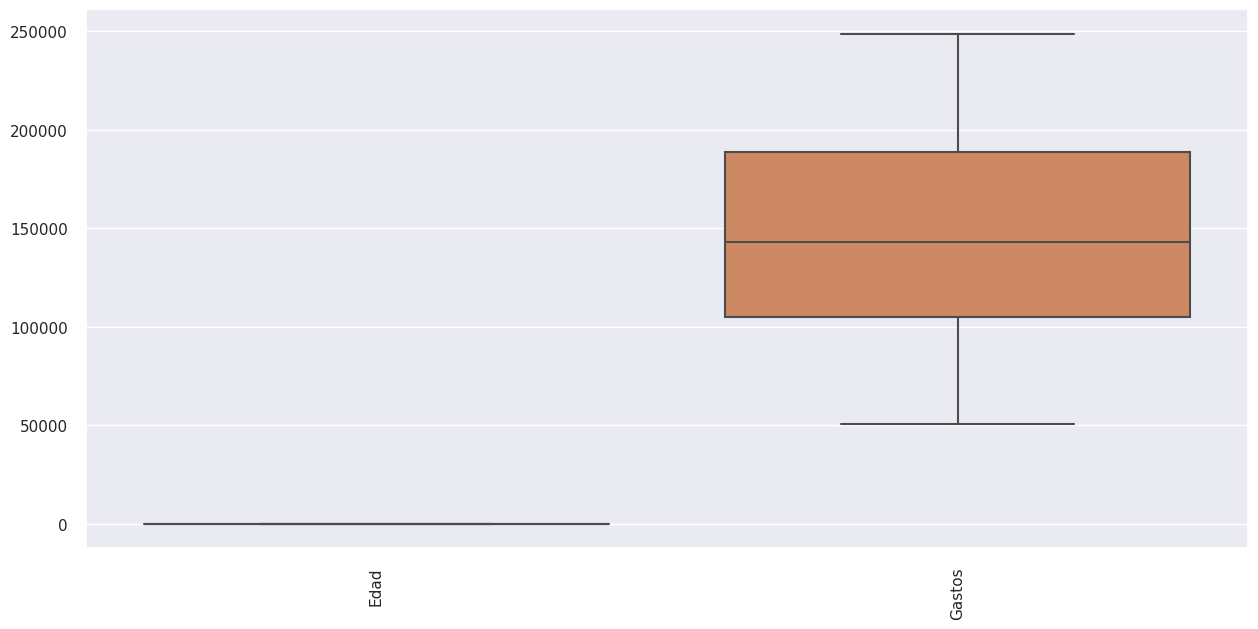

In [ ]:
ax=sns.boxplot(data=dfapi1.loc[:,dfapi1.dtypes!='object'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# <font color='cyan'>**Conclusión** ⭐

<center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQ6lM-WhNq2wLaH11nHeR2qGjMjgb3y1cEkEfZbfX8uNkyESku-NDY09yR-gQxfjYCt5U&usqp=CAU" height="300" />
</center>

<font color='green'>**Aprovecha el poder de los datos para tomar decisiones más inteligentes y obtener una ventaja competitiva en tu mercado**




🔷 La mayoría de los clientes en nuestro conjunto de datos son graduados universitarios, casados y no tienen hijos, tienen ingresos entre 0 y 100,000 dólares anuales, el promedio es de alrededor de 50,000 dólares anuales, estos son los que más compras hacen en el almacén.


 🔷 El vino es el producto más comprado con el 50% del total de compras y la carne lo sigue con el 28% de las compras.


🔷 Notamos que en año 2012, se puede ver una suba muy interesante de nuevos clientes en los meses de julio y agosto, el año 2013 fue muy bueno y constante la cantidad de nuevos clientes.


🔷 El 53 % de mis clientes tiene entre 36 y 55 años y el 38.9 % tiene entre 56 y 100 años, no hay clientes menores de 18 años.


🔷 Los canales de ventas son almacén, web, catálogo y ofertas.


🔷 La mayoría de los clientes compran en el almacén, luego sigue las compras web, después por catálogo y por último las compras de ofertas.


🔷 Los clientes en función de su antigüedad aumentan sus compras, pero al llegar al rango de los 13 a 15 meses de antigüedad, disminuyen las cantidades de compras.-


🔷 Los clientes del cluster Excelente, son los que más compras hacen en el Almacén (Gaussiana (GMM))

🔷 Según los Coeficiente de Silhouette y Calinski-Harabasz, el mejor modelo evaluado es el de k - means, los datos están bien agrupados y separados.


<font color='magenta'>**No esperes a que tus competidores se adelanten.**